<a href="https://colab.research.google.com/github/wesha-904/Corizo-Major-project/blob/main/Major_project_corizo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CORIZO - MAJOR CAPSTONE PROJECT**

###**Domain:** Semiconductor Manufacturing Process

###**Context:**
Modern semiconductor manufacturing involves constant monitoring using hundreds of sensor signals. However, many signals are irrelevant or noisy. Feature selection helps identify the most relevant signals for process monitoring.

By selecting the right signals (features), engineers can:
- Detect yield drops earlier
- Improve throughput
- Reduce production costs

These selected signals can be used to **predict yield type** (Pass/Fail) and understand which features truly impact production quality.

###**Data Description:**
- File: `sensor-data.csv`
- Shape: (1567 rows, 592 columns)
- Features: 591 measured signals per unit
- Target column:
  - `-1` = Pass
  - `1` = Fail

Each row = one production unit with a test result.

###**Project Objective:**
Build a **classifier** to predict Pass/Fail outcomes, and analyze:
- Which features are essential?
- Can we reduce dimensionality without sacrificing performance?


# 👥 Team Members
- Anwesha Singh  
- Divvela Chetan Swaroop  
- Sabhyatha CB
- Varun Adithya  
- Mohammad Nayeem  
- Kunal  
- Monish  

---

| Question Step                     | Person Responsible | Time Given | Deadline |
| --------------------------------- | ------------------ | ---------- | -------- |
| Step 1                            | Sabhyatha CB       | 2 days     | 23 July  |
| Step 2                            | CHETAN SWAROOP D      | 2 days     | 25 July  |
| Step 3                            | Anwesha Singh      | 2 days     | 27 July  |
| Step 4                            | Varun Adithya      | 2 days     | 29 July  |
| Step 5 (Model 1)                  | Mohammad Nayeem    | 2 days     | 31 July  |
| Step 5 (Model 2 & 3)              | Kunal              | 2 days     | 2 August |
| Step 5 (Model Comparison), Step 6 | Monish + Anwesha Singh             | 2 days     | 4 August |


| **Assigned Questions**                                                   | **Detailed Tasks**                                                                                                                                                                                                                                                                                                                           |
| --------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Step 1: Import and Explore the Data**                                     | - Import `sensor-data.csv`<br>- Check shape, column types, nulls<br>- Display a few rows<br>- Understand and describe the structure: 1567 rows × 592 columns<br>- Briefly explain what “-1” and “1” in target mean                                                                                                                              |
| **Step 2: Data Cleansing**                                                  | - **Step 2.1**: Missing value treatment<br>- **Step 2.2**: Drop attributes if irrelevant using domain logic<br>- **Step 2.3**: Other functional/logical data cleaning (e.g., remove duplicates, invalid values)<br>- Add comments on every assumption or fix                                                                                    |
| **Step 3: Data Analysis & Visualisation**                                   | - **3.1**: Detailed statistical analysis of features (mean, std, skew, etc.)<br>- **3.2**: Univariate analysis – histograms, boxplots<br>- **3.3**: Bivariate analysis – scatterplots, correlation matrix<br>- **3.4**: Multivariate analysis – pairplots, PCA visualizations<br>- Add comments after each type of analysis                     |
| **Step 4: Data Pre-processing** *(Assigned to Varun Adithya Salunke)*       | - **4.1**: Split predictors vs target<br>- **4.2**: Check for class imbalance; if imbalanced, apply **SMOTE**<br>- **4.3**: Train-test split (with stratify)<br>- **4.4**: Normalize or Standardize the data<br>- **4.5**: Ensure train/test sets have similar statistical characteristics                                                      |
| **Step 5: Model Training – Random Forest**                                  | - Choose **Random Forest** as 1st supervised model<br>- Apply cross-validation<br>- Use **GridSearchCV** for tuning hyperparameters (max\_depth, n\_estimators, etc.)<br>- Print **classification report**, **confusion matrix**<br>- Add comments on precision, recall, F1, accuracy<br>- Note: Apply preprocessing from Step 4 where required |
| **Step 5: Model Training – SVM + Naive Bayes**                              | - Train **SVM** (try both linear & RBF kernels)<br>- Use cross-validation + GridSearch (tune C, gamma, kernel)<br>- Train **Naive Bayes** (Gaussian or Bernoulli)<br>- For both models: classification report, confusion matrix<br>- Add comments on accuracy, overfitting, strengths                                                           |
| **Step 5 (end): Model Comparison** + **Step 6: Conclusion & Improvisation** | - Compare all 3 models: accuracy, F1-score, confusion matrix<br>- Select **best model** and justify why<br>- Save best model (`joblib` or `pickle`)<br>- **Step 6**: Write final conclusion and suggestions for future work/improvements                                                            |


# 1. Import and explore the data.

In [ ]:
import pandas as pd

# Loading the dataset directly from the raw GitHub URL
# This allows accessing the CSV file online without needing to download it manually.
signal_data = "https://raw.githubusercontent.com/wesha-904/Corizo-Major-project/main/signal-data.csv"

# 1. Read the CSV
df = pd.read_csv(signal_data)

# 2. Check column types and null values
print("\nData Types and Nulls:")
print(df.info())

# 3. Check the shape
print("Shape of dataset:", df.shape)

# 4. Display the first few rows
print("\nFirst 5 rows:")
print(df.head())

# 5. Check null values more clearly
print("\nNull values per column:")
print(df.isnull().sum())

# 6. Check unique values in target column (if present)
if 'target' in df.columns:
    print("\nTarget column value counts:")
    print(df['target'].value_counts())

# To confirm, check class distribution
    print("\nTarget Distribution:\n", df['target'].value_counts())


Data Types and Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
Shape of dataset: (1567, 592)

First 5 rows:
                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.44

In [ ]:
"""
1)Understanding the Structure of the Dataset (1567 × 592)

The dataset sensor-data.csv has:
1567 rows: Each row likely represents one observation, such as a machine reading at a specific time or condition.

592 columns:
591 feature columns: Most of these are probably sensor measurements, such as temperature, vibration, pressure, etc.

1 target column: This column is likely named target and represents the classification label for each observation.
This is a high-dimensional dataset, commonly found in sensor-based predictive maintenance, fault detection, or anomaly detection tasks.


2)Explanation of target values: -1 and 1
The target column contains two distinct values: 1 and -1, indicating a binary classification task. These values typically represent:
Target Value    Meaning Interpretation
 1  Normal class    The system is operating normally
-1  Anomalous or faulty class   The system shows signs of failure or abnormal behavior
This setup is especially common in anomaly detection or fault diagnosis, where the goal is to distinguish between normal and faulty system states using sensor readings.
"""

'\n1)Understanding the Structure of the Dataset (1567 × 592)\n\nThe dataset sensor-data.csv has:\n1567 rows: Each row likely represents one observation, such as a machine reading at a specific time or condition.\n\n592 columns:\n591 feature columns: Most of these are probably sensor measurements, such as temperature, vibration, pressure, etc.\n\n1 target column: This column is likely named target and represents the classification label for each observation.\nThis is a high-dimensional dataset, commonly found in sensor-based predictive maintenance, fault detection, or anomaly detection tasks.\n\n\n2)Explanation of target values: -1 and 1\nThe target column contains two distinct values: 1 and -1, indicating a binary classification task. These values typically represent:\nTarget Value    Meaning Interpretation\n 1  Normal class    The system is operating normally\n-1  Anomalous or faulty class   The system shows signs of failure or abnormal behavior\nThis setup is especially common in ano

# 2. Data cleansing:
• Missing value treatment.

• Drop attribute/s if required using relevant functional knowledge.

• Make all relevant modifications on the data using both functional/logical
reasoning/assumptions.

In [ ]:
# 1. Drop columns with >50% missing
threshold = 0.5 * df.shape[0]
cols_to_drop = df.columns[df.isnull().sum() > threshold]
df = df.drop(columns=cols_to_drop)

# 2. Impute numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 3. If not needed for modeling, drop 'Time'
df = df.drop(columns=['Time'])

# 4. Keep only rows where Pass/Fail is -1 or 1 and drop if missing
df = df[df['Pass/Fail'].isin([-1,1])]
df = df.dropna(subset=['Pass/Fail'])

# 5. Final check
print('Nulls remaining:', df.isnull().sum().sum())
print('Shape:', df.shape)
df.head()

Nulls remaining: 0
Shape: (1567, 563)


0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...      577     582     583     584      585     586  \
0  1.5005  0.0162  ...  14.9509  0.5005  0.0118  0.0035   2.3630  0.0205   
1  1.4966 -0.0005  ...  10.9003  0.5019  0.0223  0.0055   4.4447  0.0096   
2  1.4436  0.0041  ...   9.2721  0.4958  0.0157  0.0039   3.1745  0.0584   
3  1.4882 -0.0124  ...   8.5831  0.4990  0.0103  0.0025   2.0544  0.0202   
4  1.5031 -0.0031  ...  10.9698  0.4800  0.4766  0.1045  99.3032  0.0202   

      587     588       589  Pass/Fail  
0  0.0148  0.0046   71.9005         -1  
1  0.0201  0.0060  208.2045         -1  
2  0.0484  0.0148   82.8602          1  
3  0.0149  0.0044   73.8432         -1  
4  0.0149  0.0044   73.8432         -1  

[5 rows x 563 columns]

# 3. Data analysis & visualisation:

• Perform detailed relevant statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [ ]:
# 3.1: Detailed statistical analysis of features (mean, std, skew, etc.)
# Show basic stats like mean, min, max, etc. for all numeric columns
print("Summary statistics:")
print(df.describe())

Summary statistics:
                 0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.441551  2495.866110  2200.551958  1395.383474     4.171281   
std      73.480841    80.228143    29.380973   439.837330    56.103721   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    100.0   101.116476     0.121825     1.462860    -0.000842  ...   
std       0.0     6.209385     0.008936     0.073849     0.015107  ...   
min     100.0    

In [ ]:
# Skewness tells us if the data is not evenly spread
print("\nSkewness of numeric columns:")
print(df[numeric_cols].skew())


Skewness of numeric columns:
0             0.515100
1            -0.043756
2            -0.307609
3             1.724488
4            19.734128
               ...    
586           1.438623
587           1.948321
588           2.030356
589           2.715663
Pass/Fail     3.487359
Length: 563, dtype: float64


In [ ]:
# Kurtosis tells us about the shape of the data — specifically, how heavy or light the tails are.
# High kurtosis = more outliers (pointy distribution)
# Low kurtosis = fewer outliers (flatter distribution)

print("\nKurtosis of numeric columns:")
print(df[numeric_cols].kurtosis())


Kurtosis of numeric columns:
0              1.488088
1              2.264880
2              2.352893
3              4.670210
4            387.952445
                ...    
586            6.982523
587            7.099841
588            8.246423
589            9.818780
Pass/Fail     10.174657
Length: 563, dtype: float64


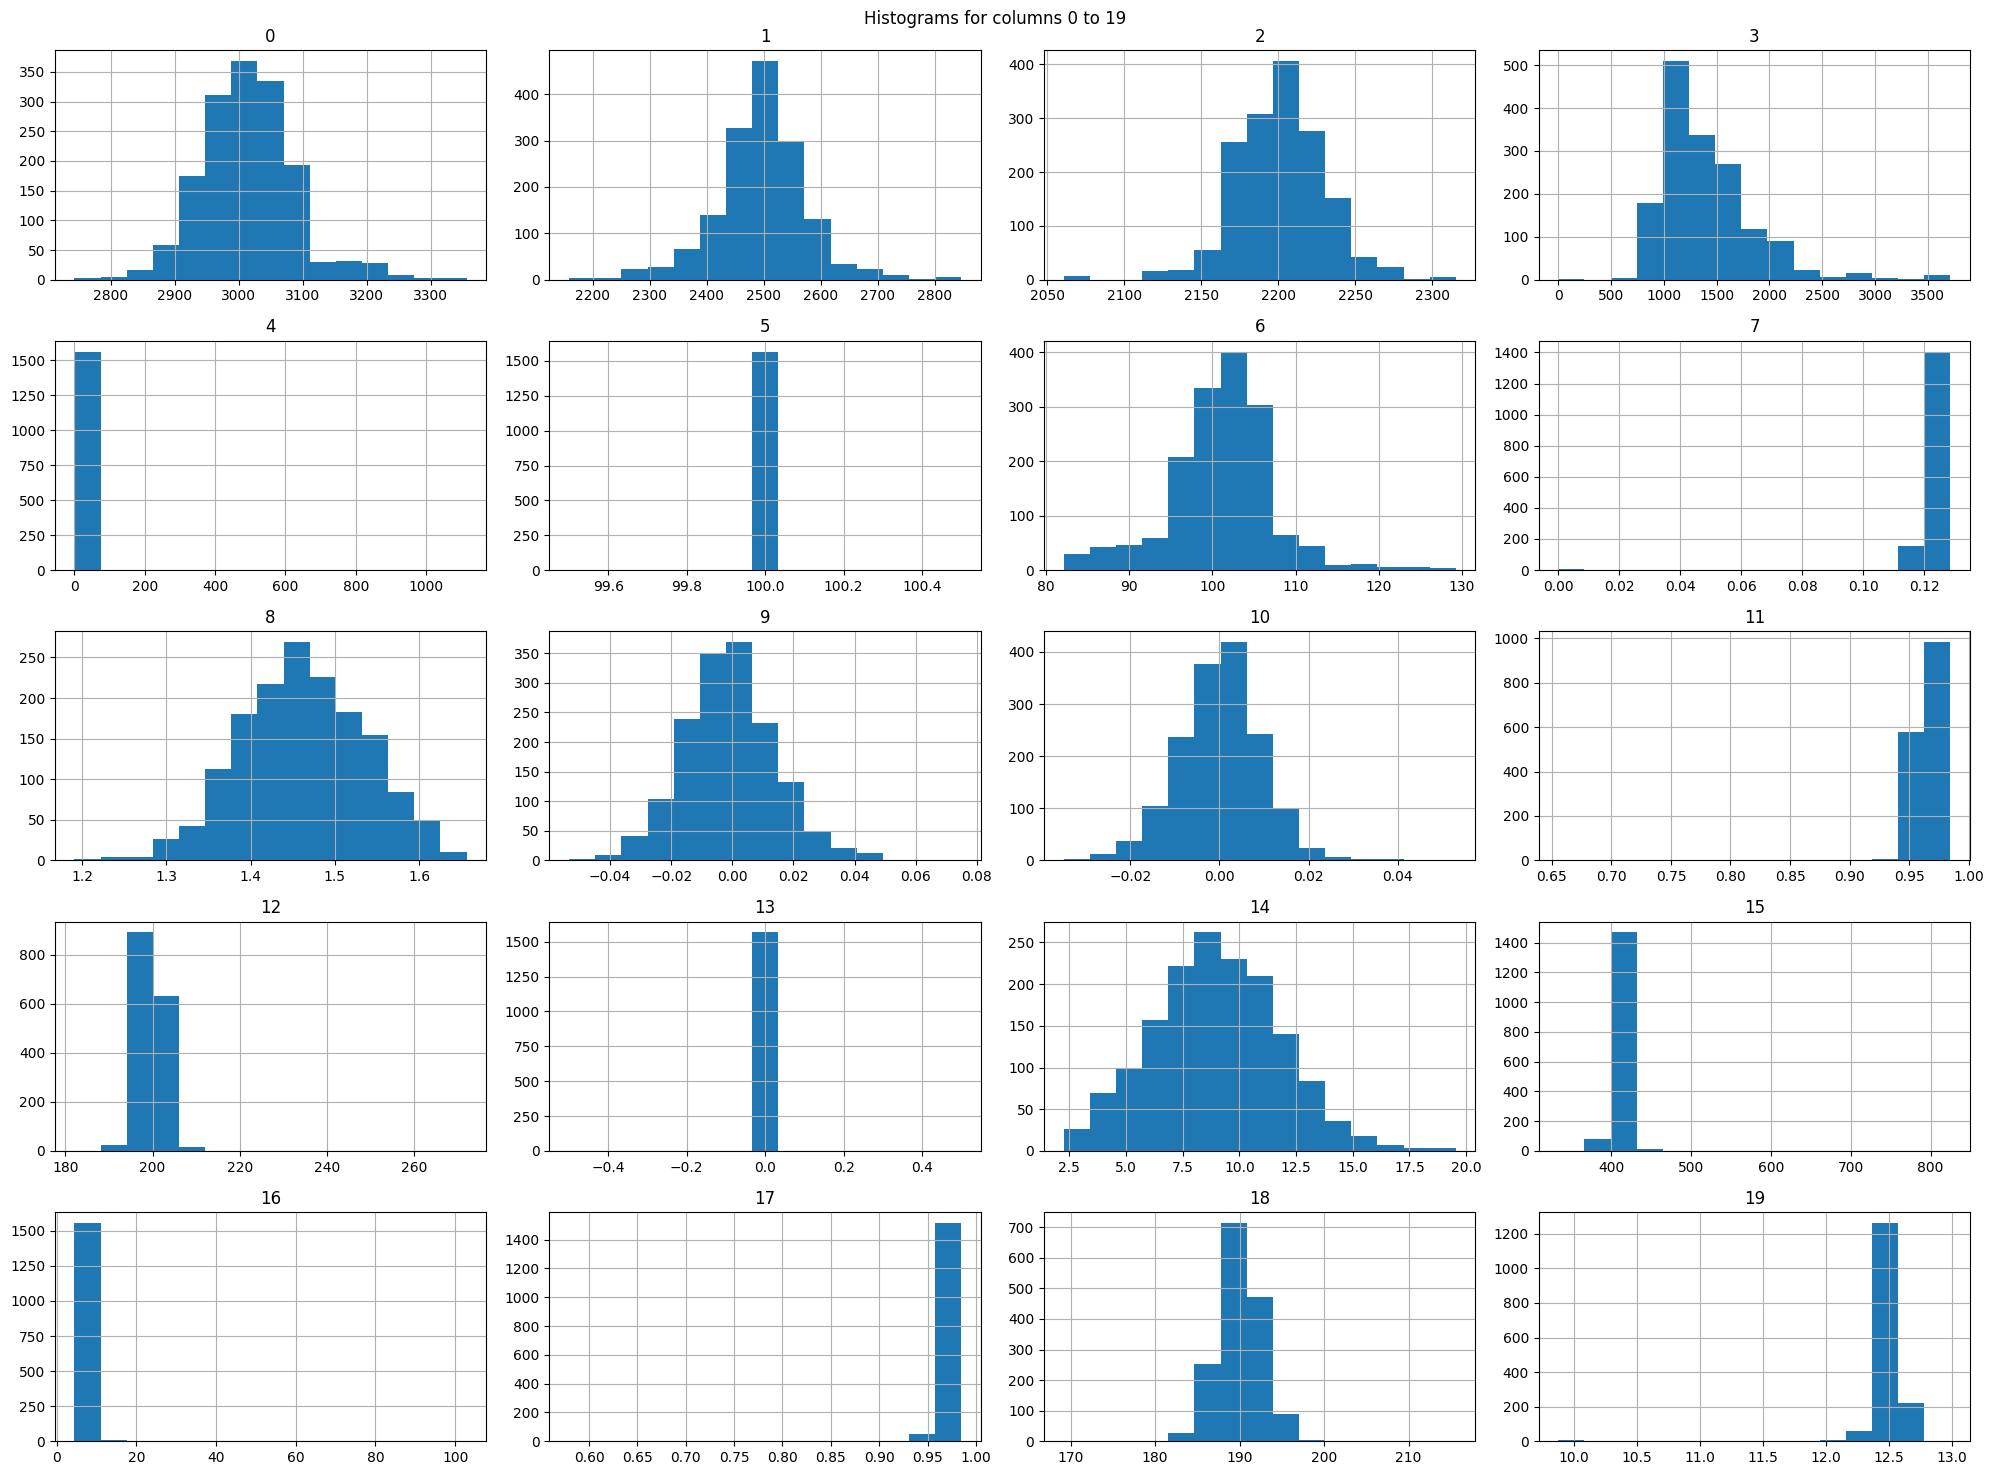

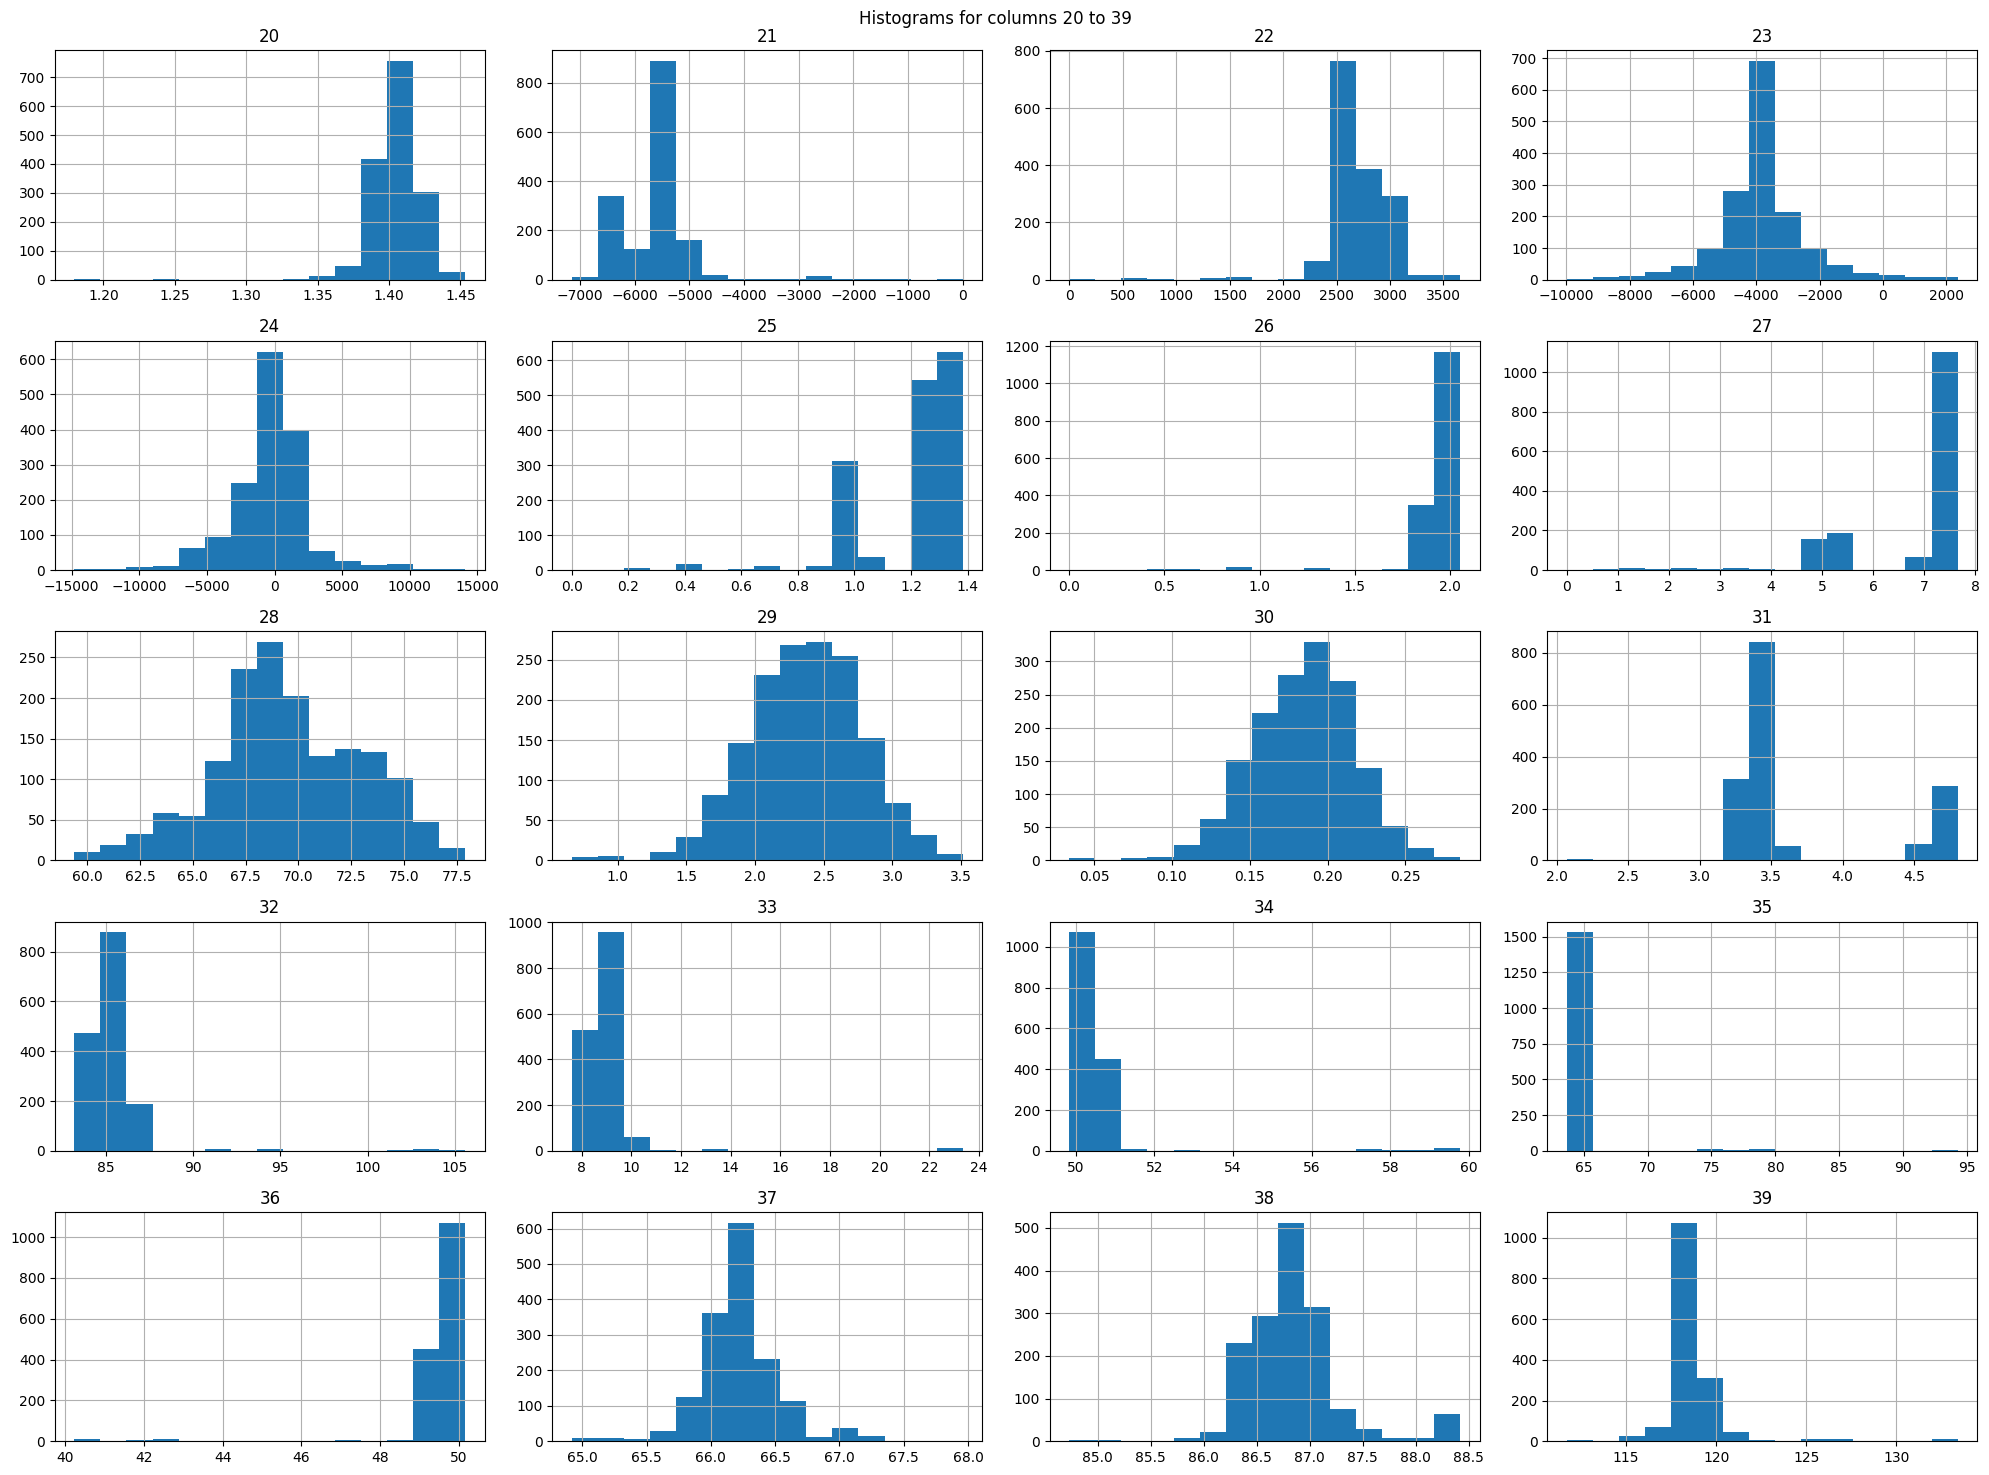

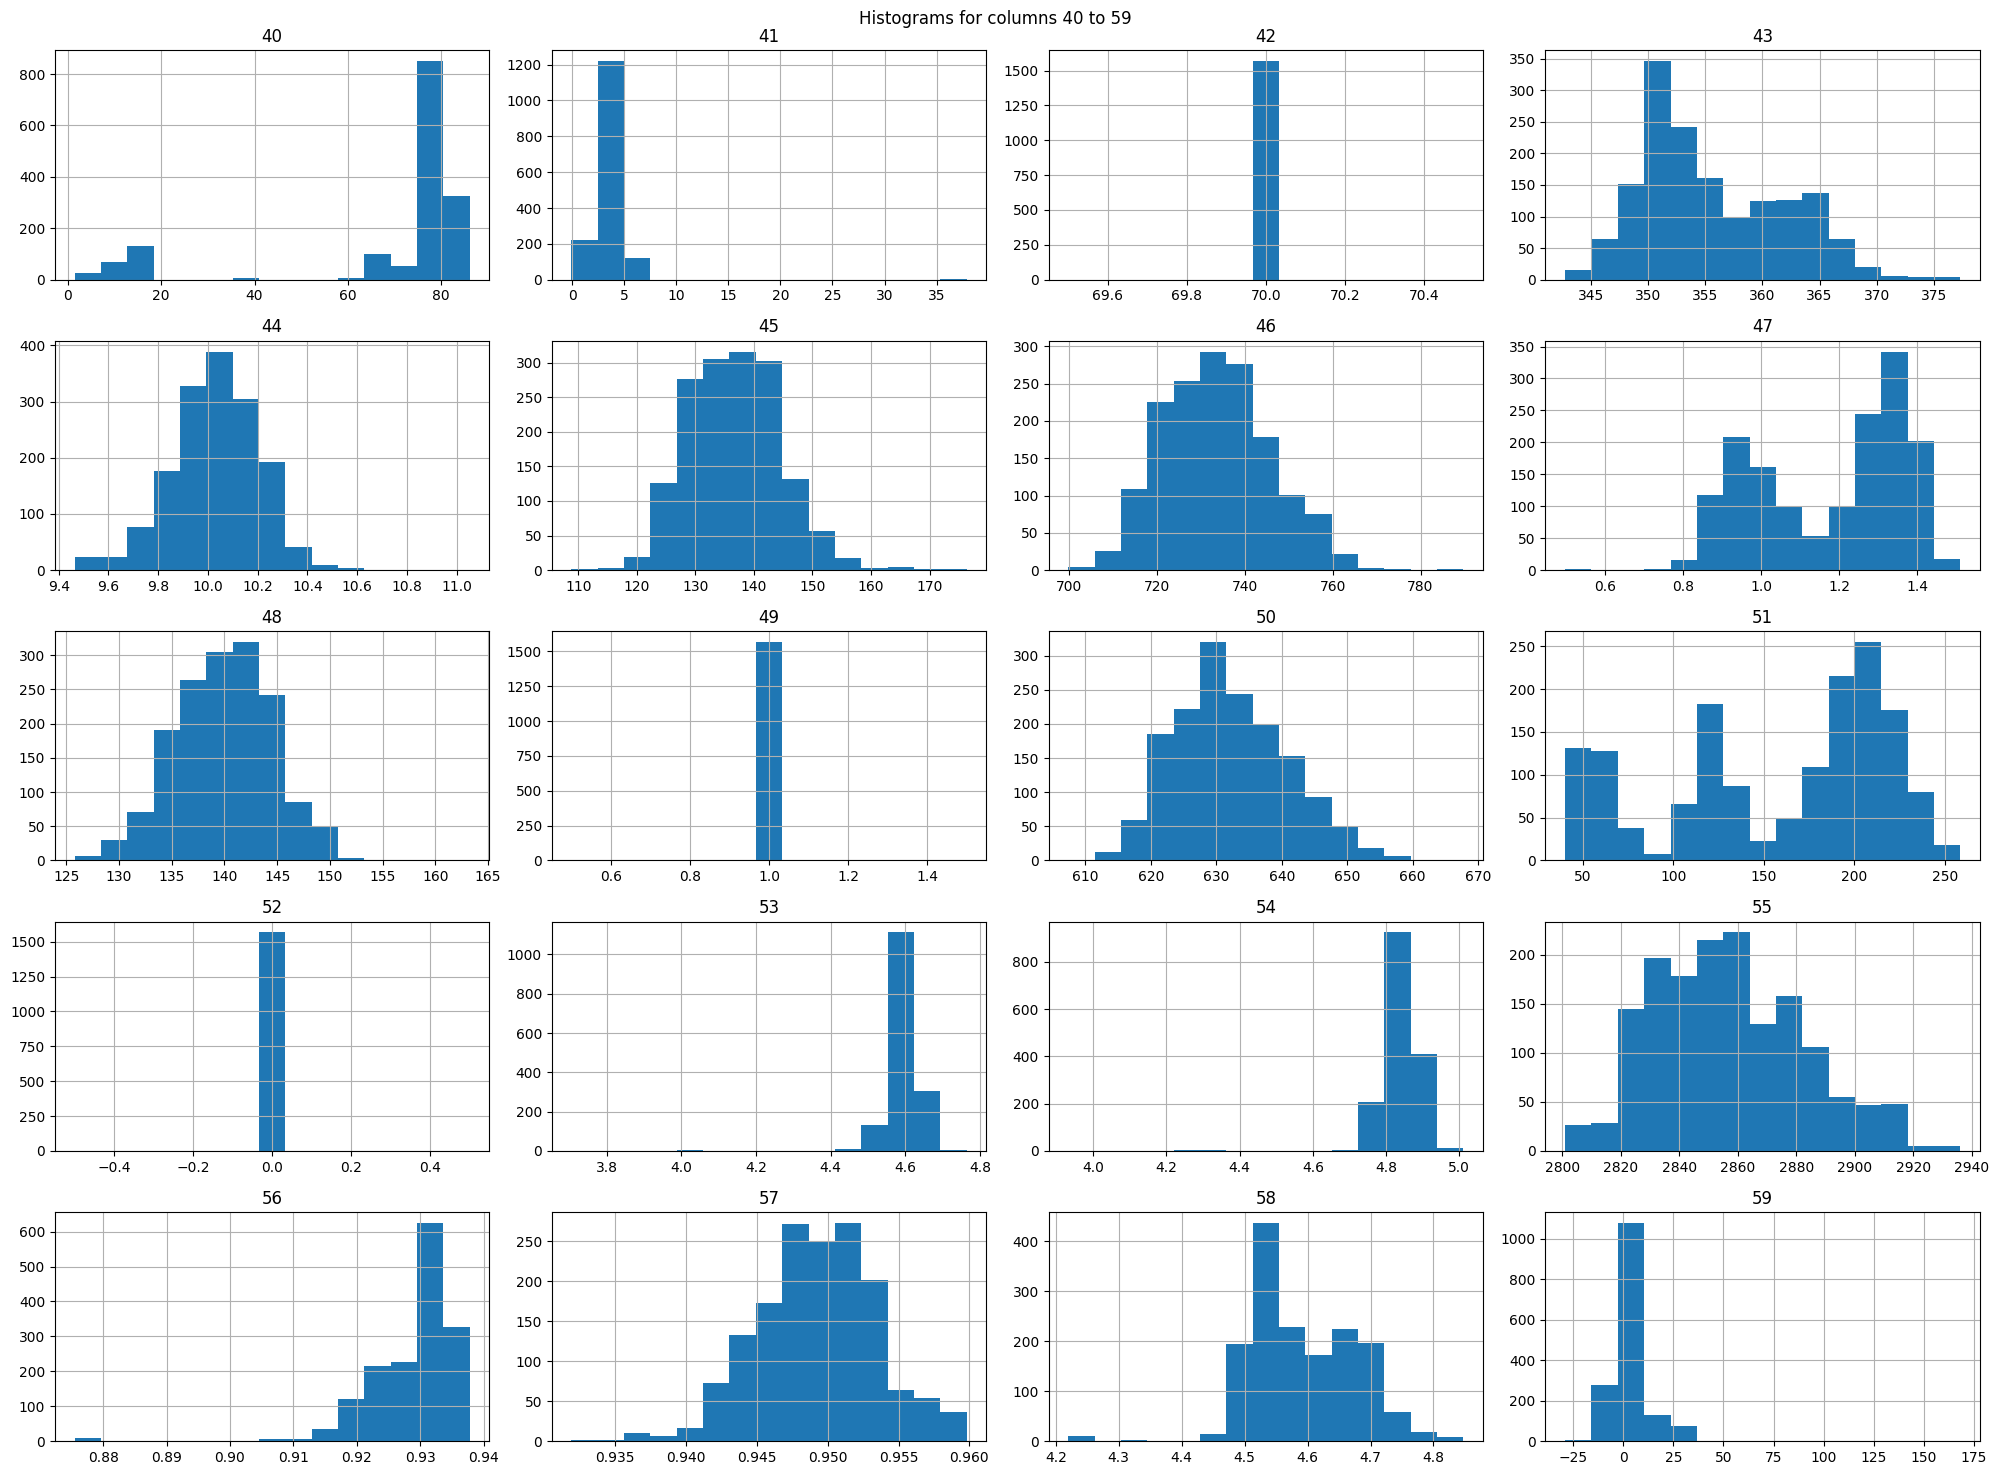

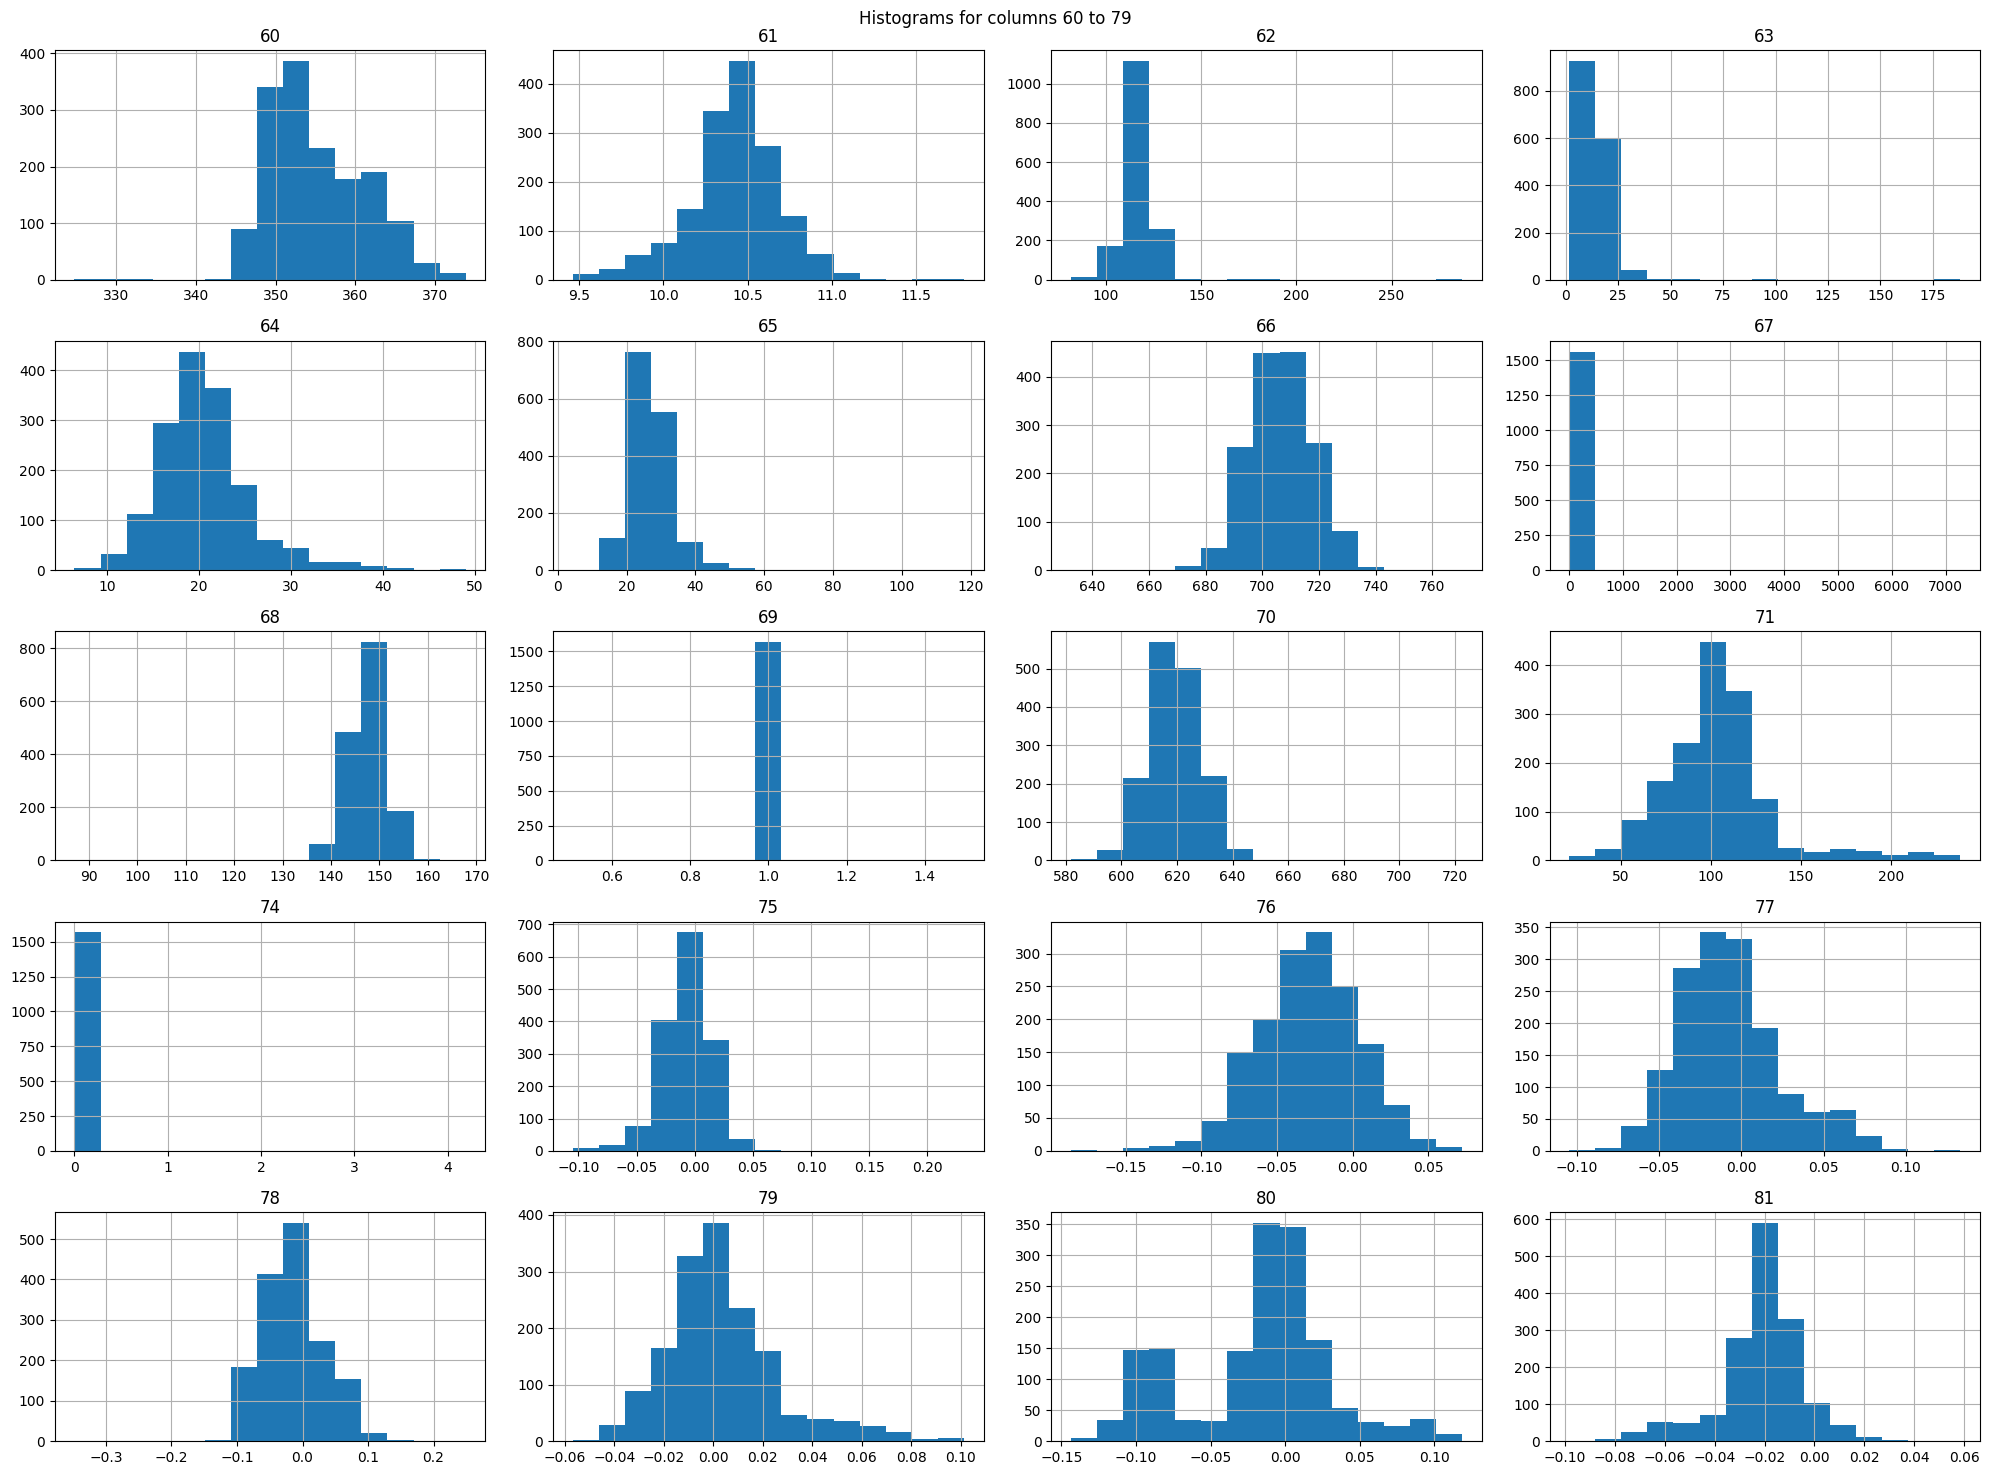

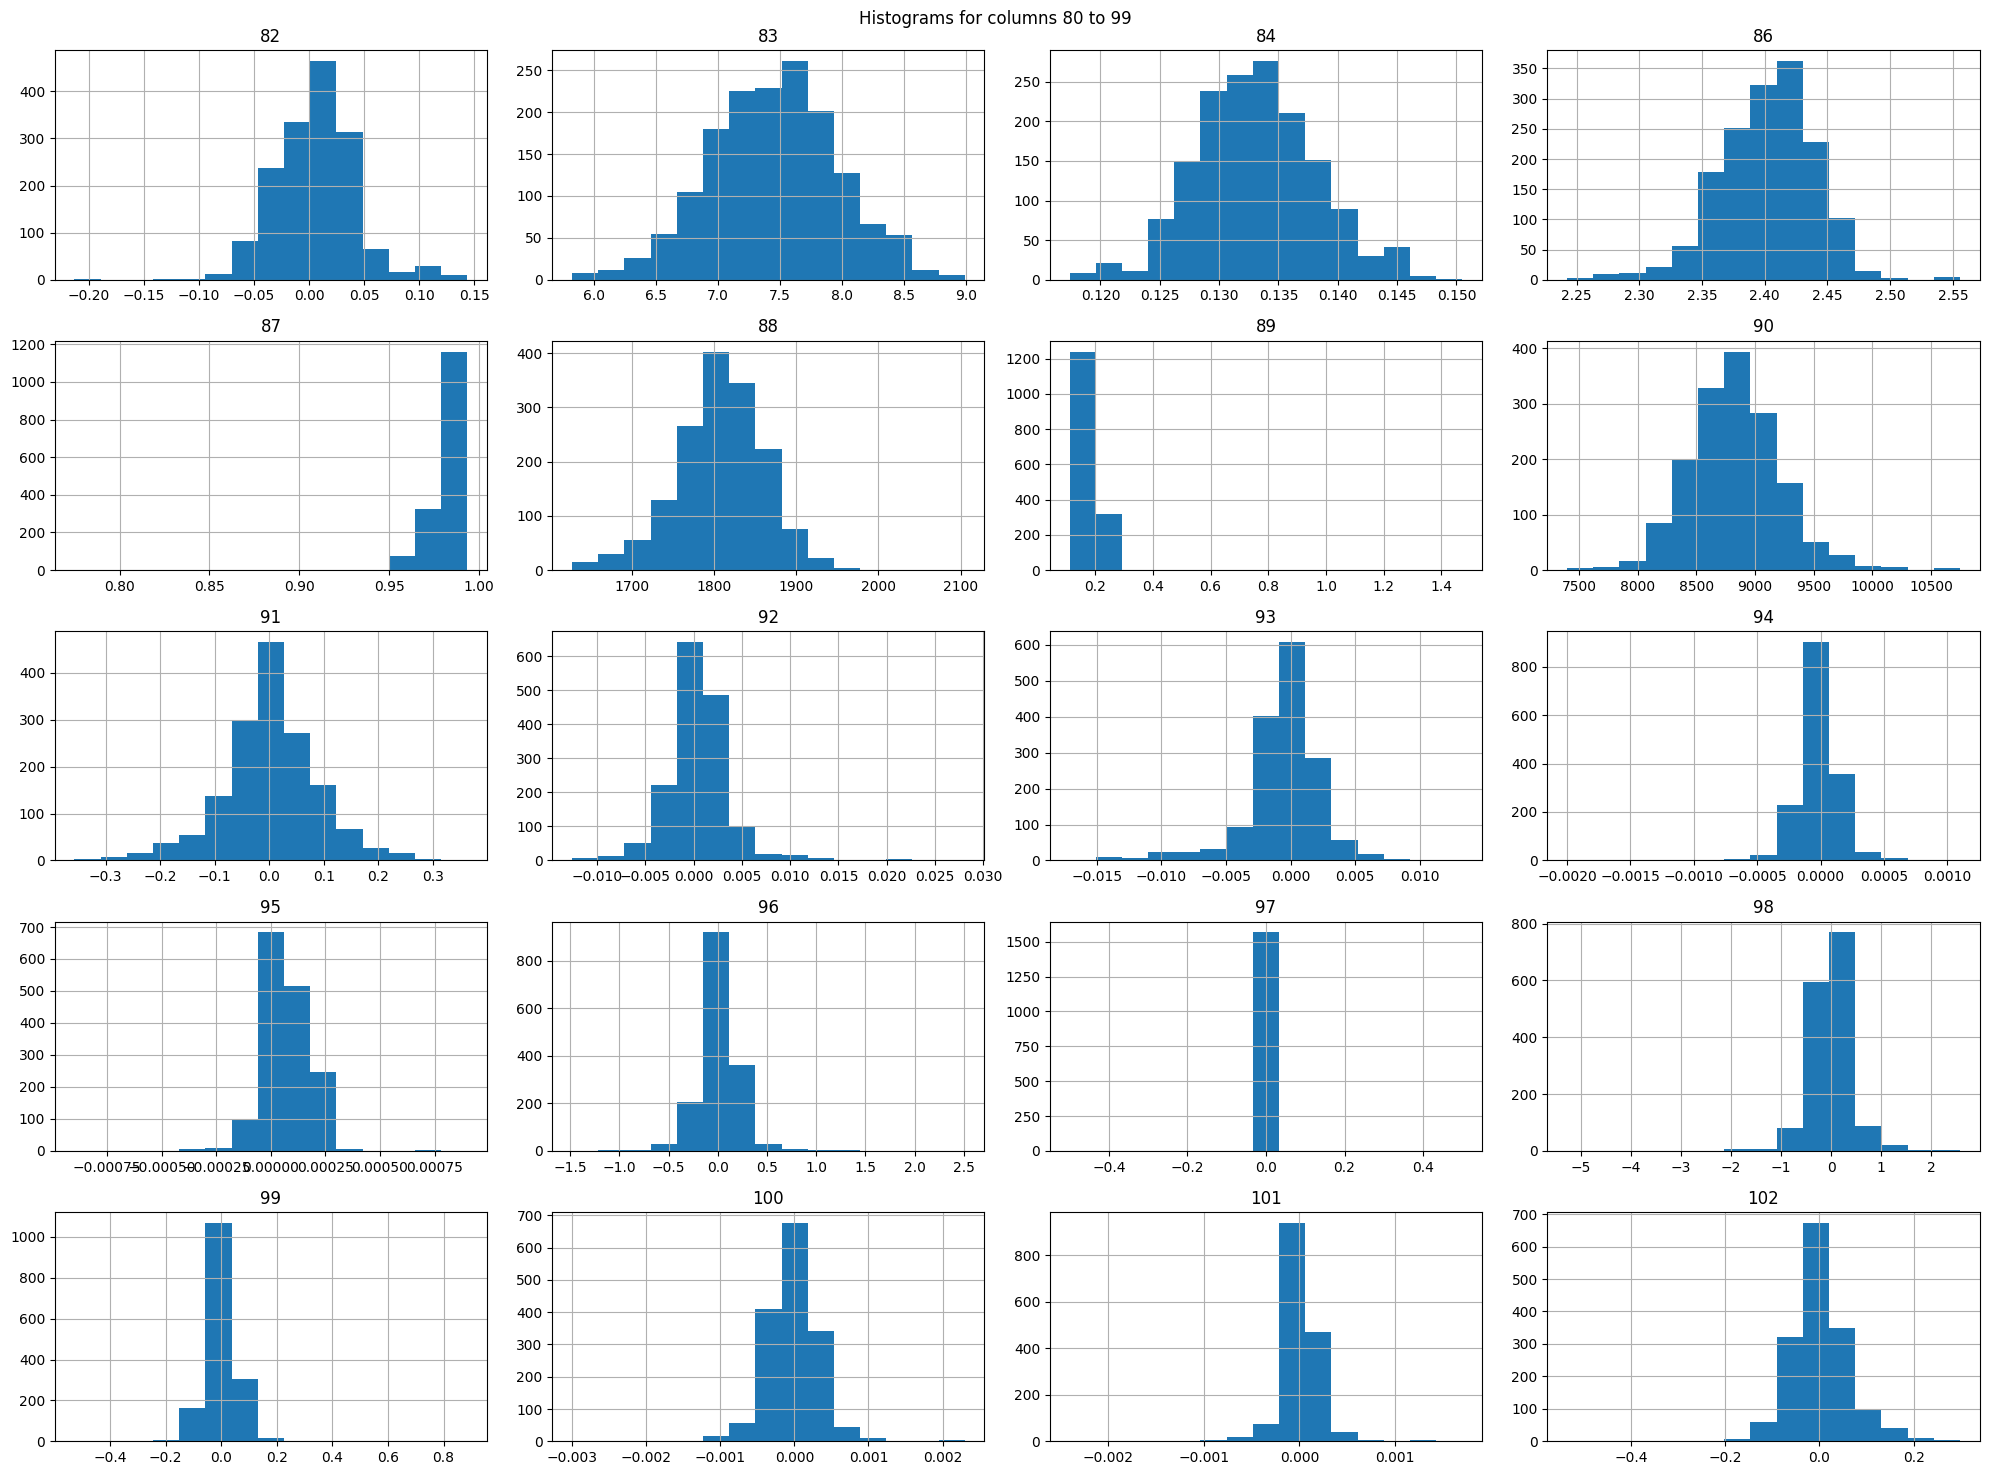

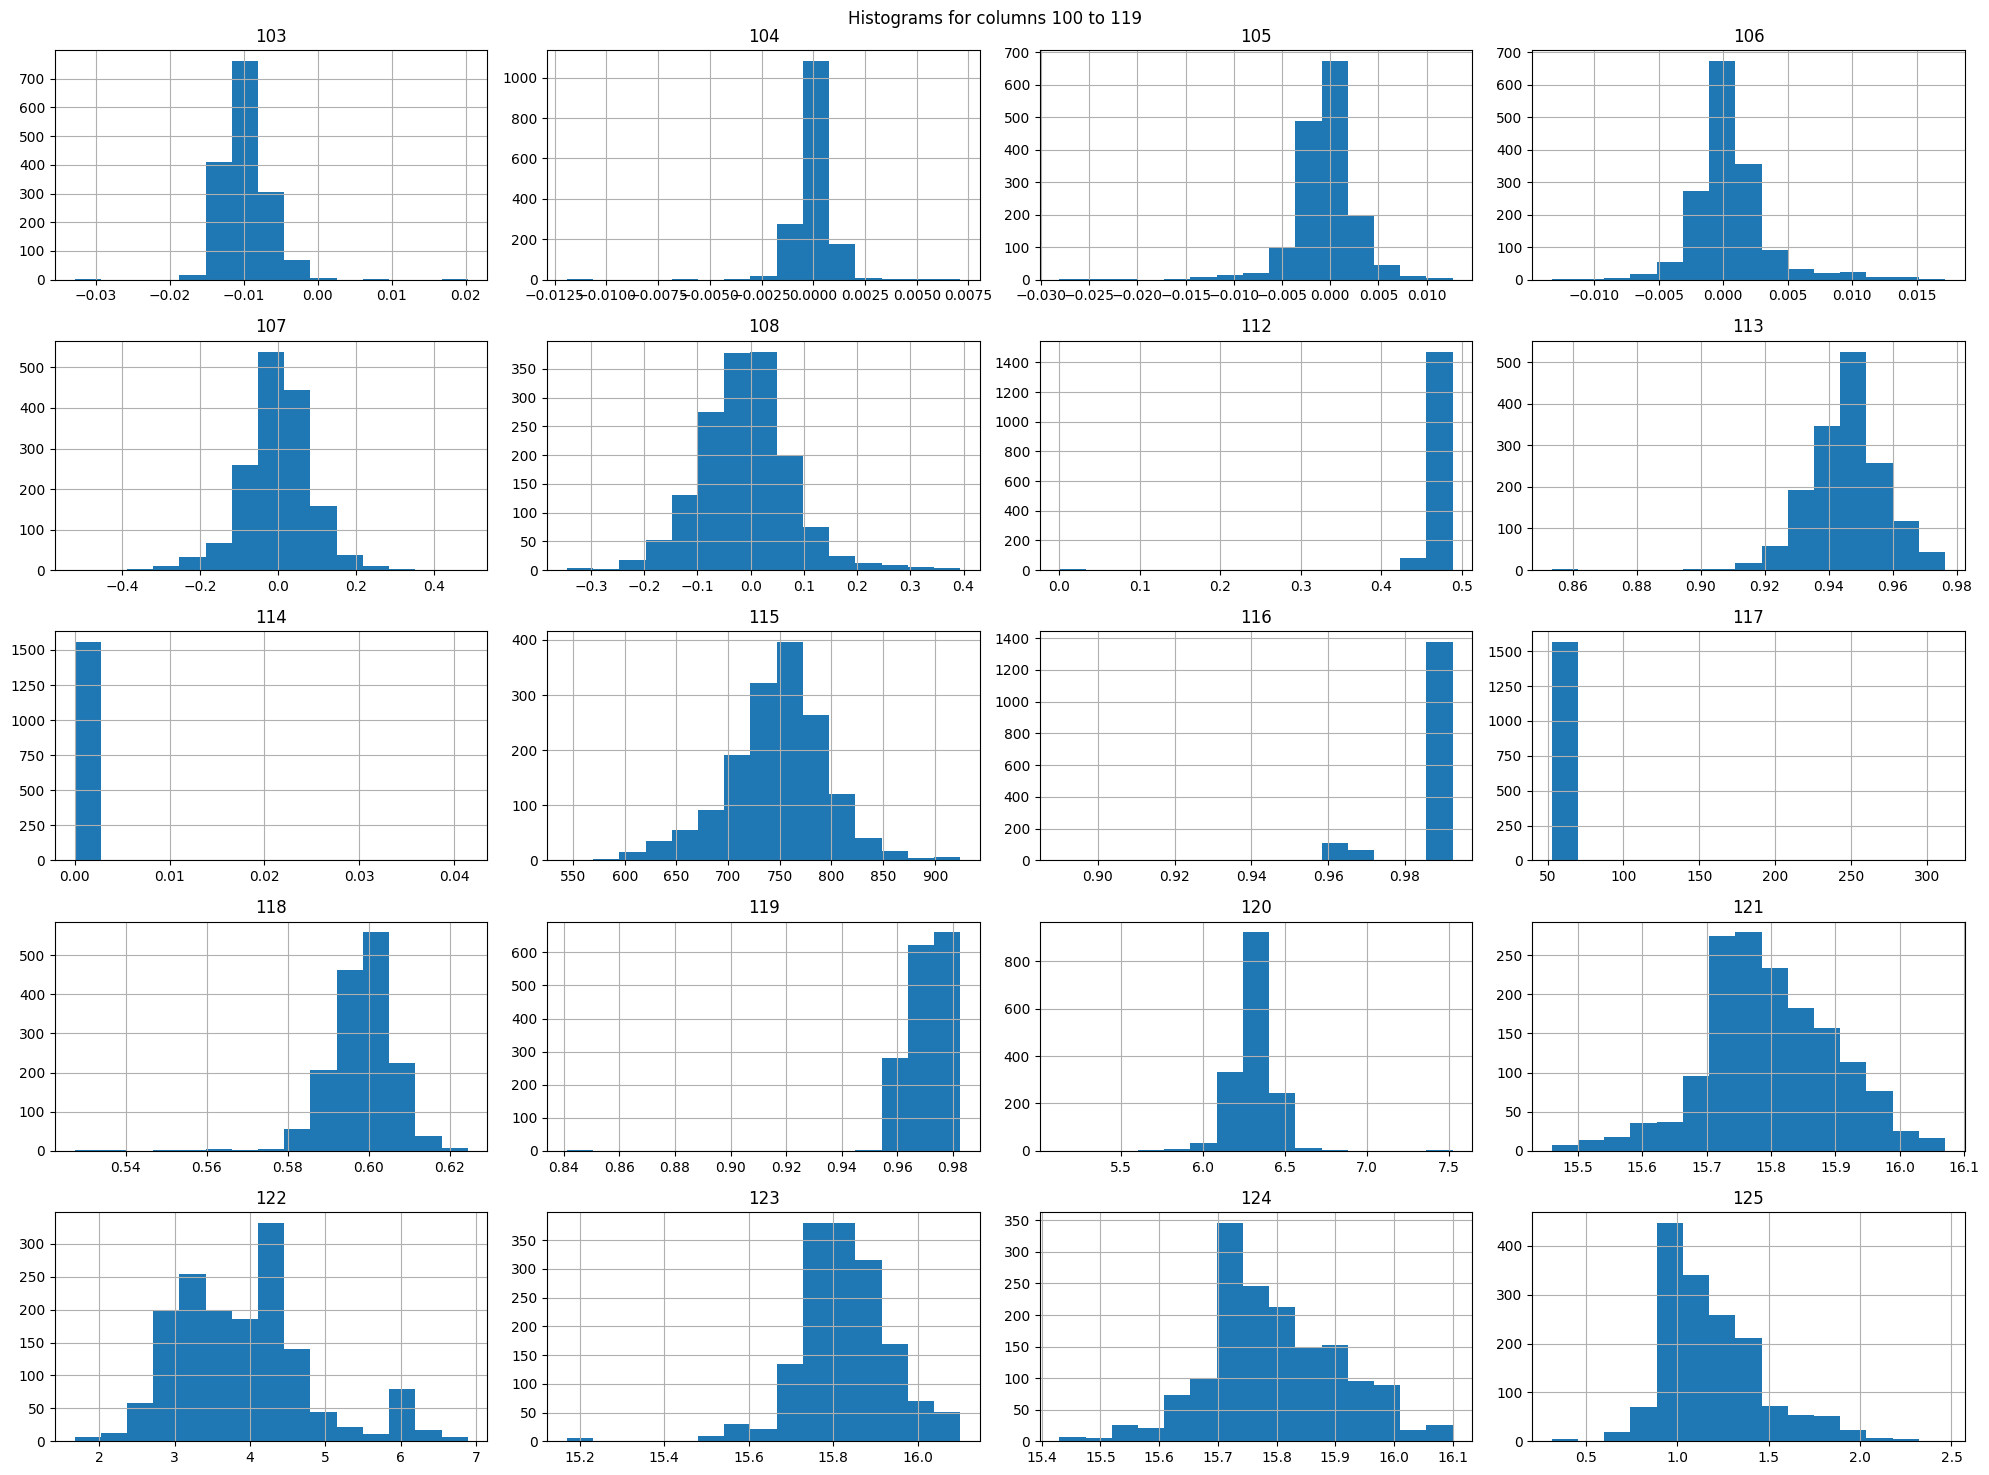

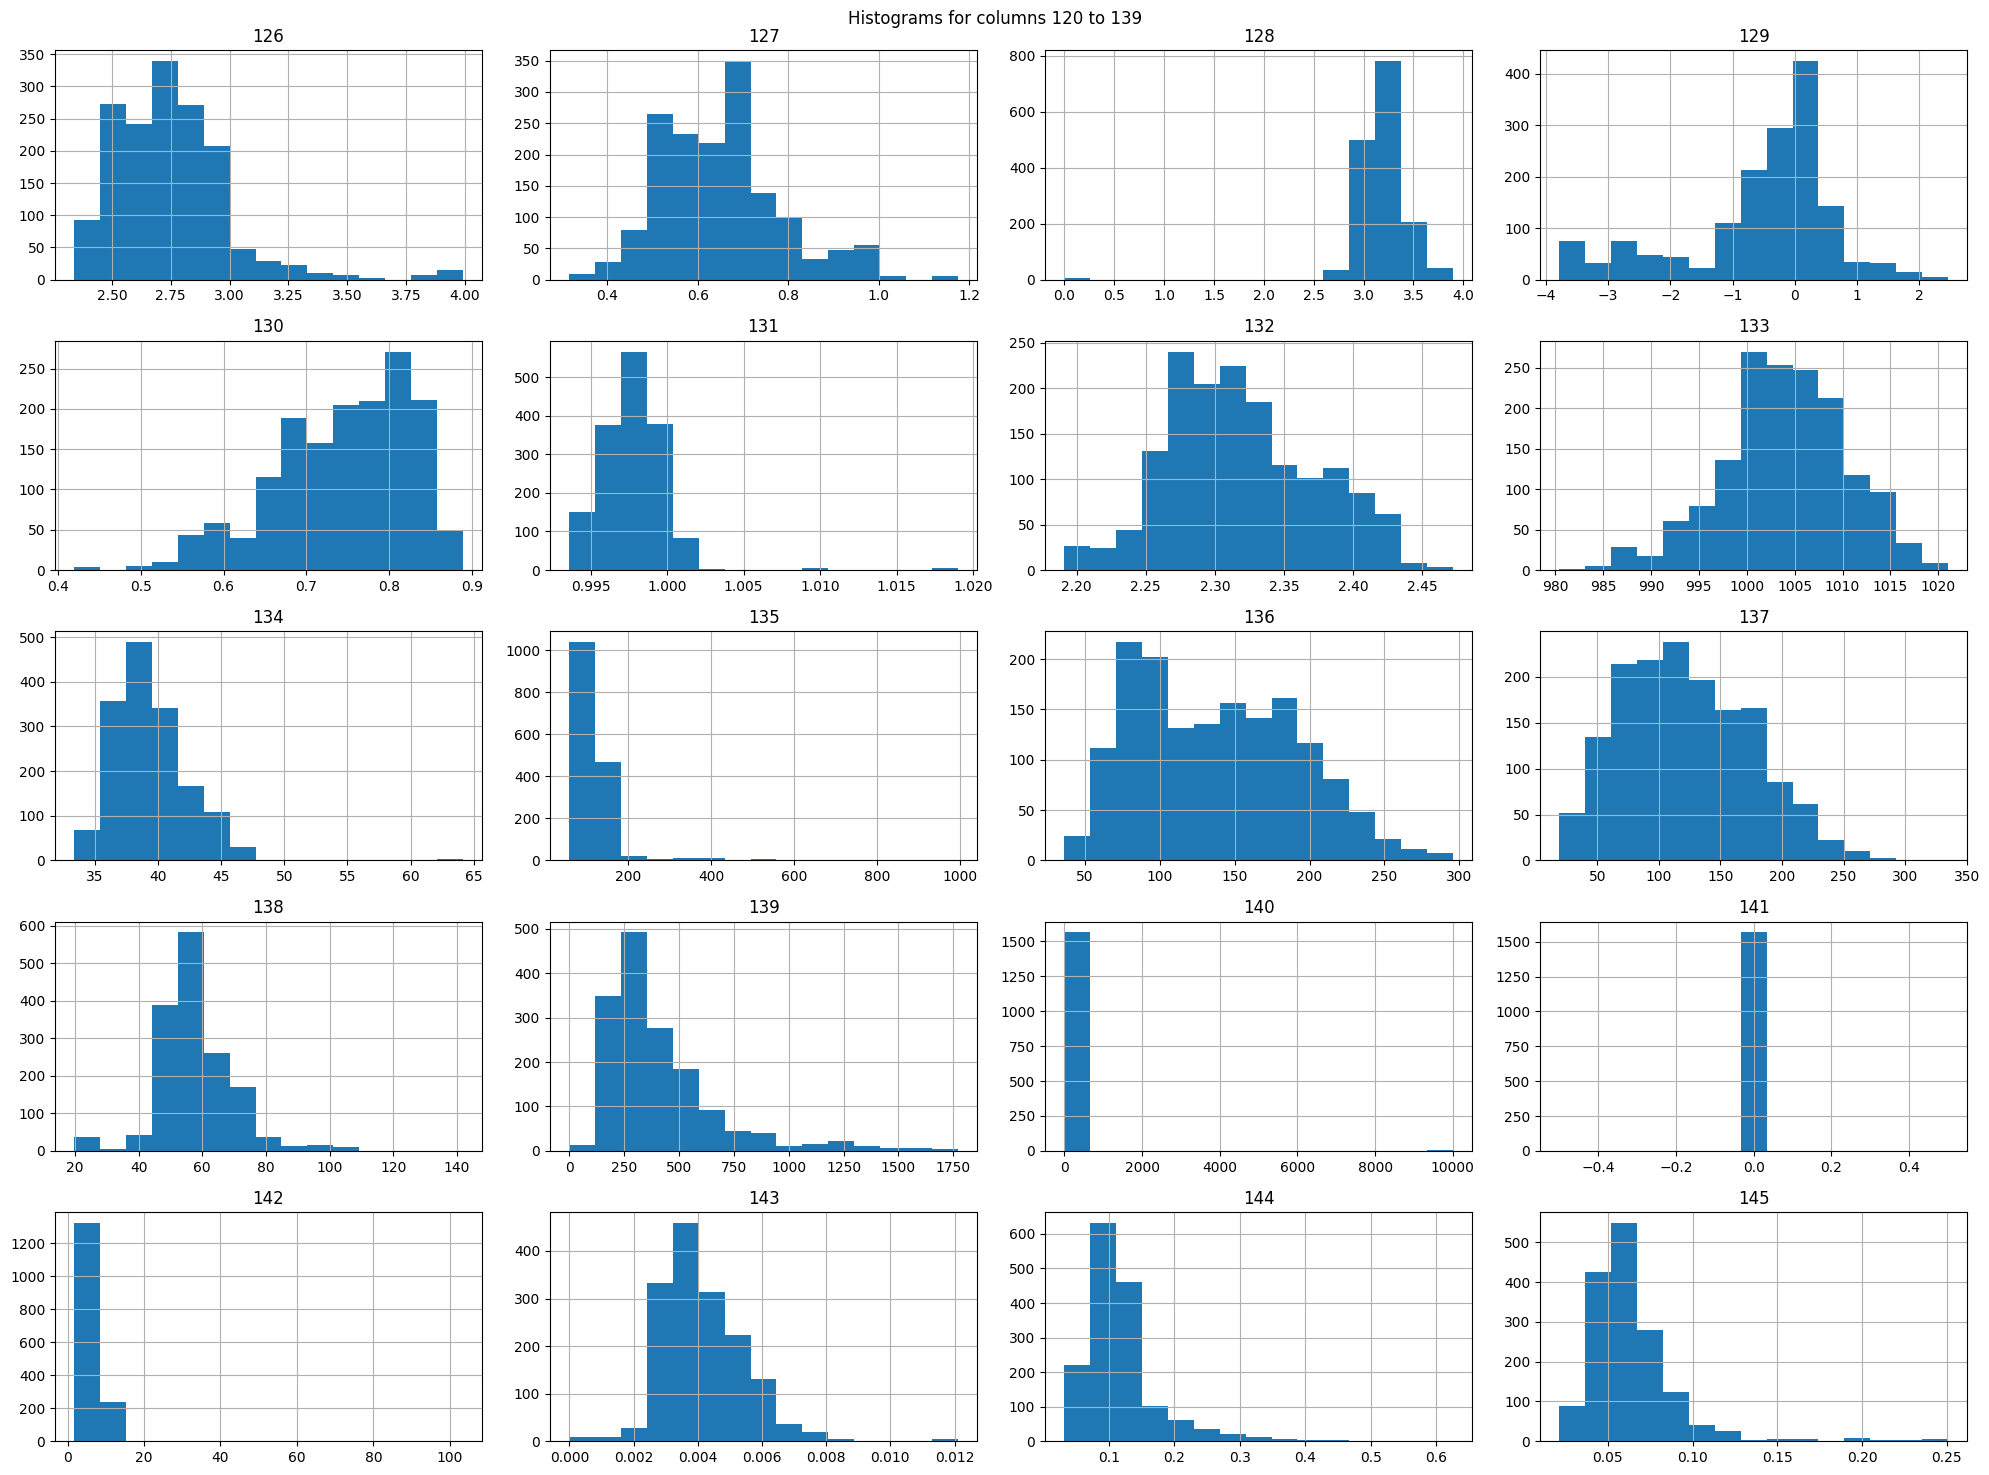

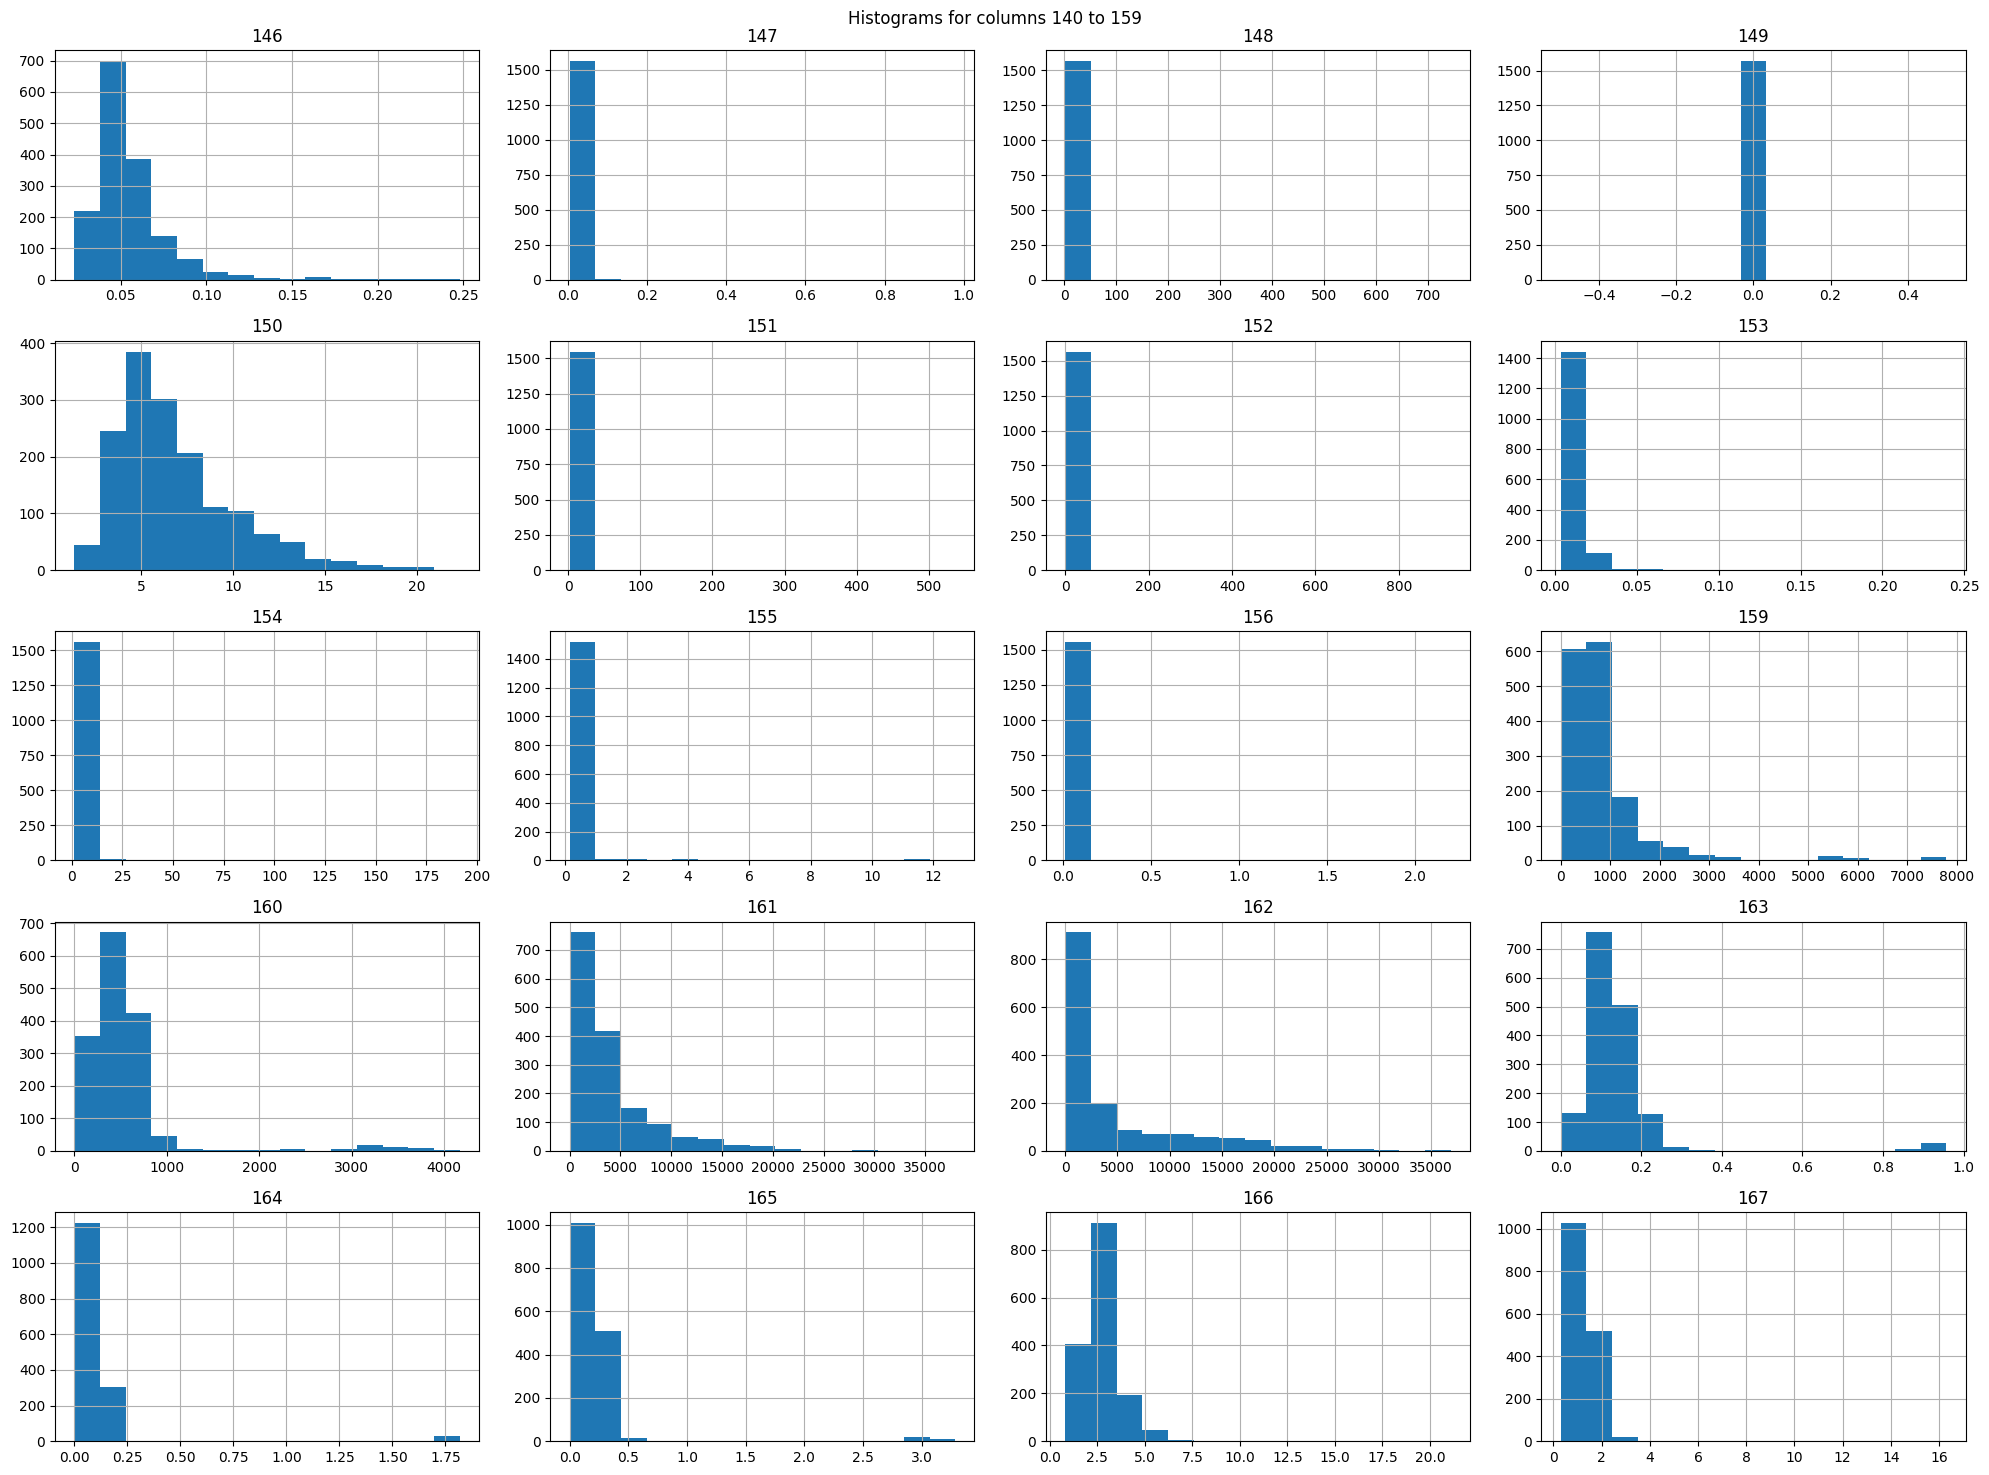

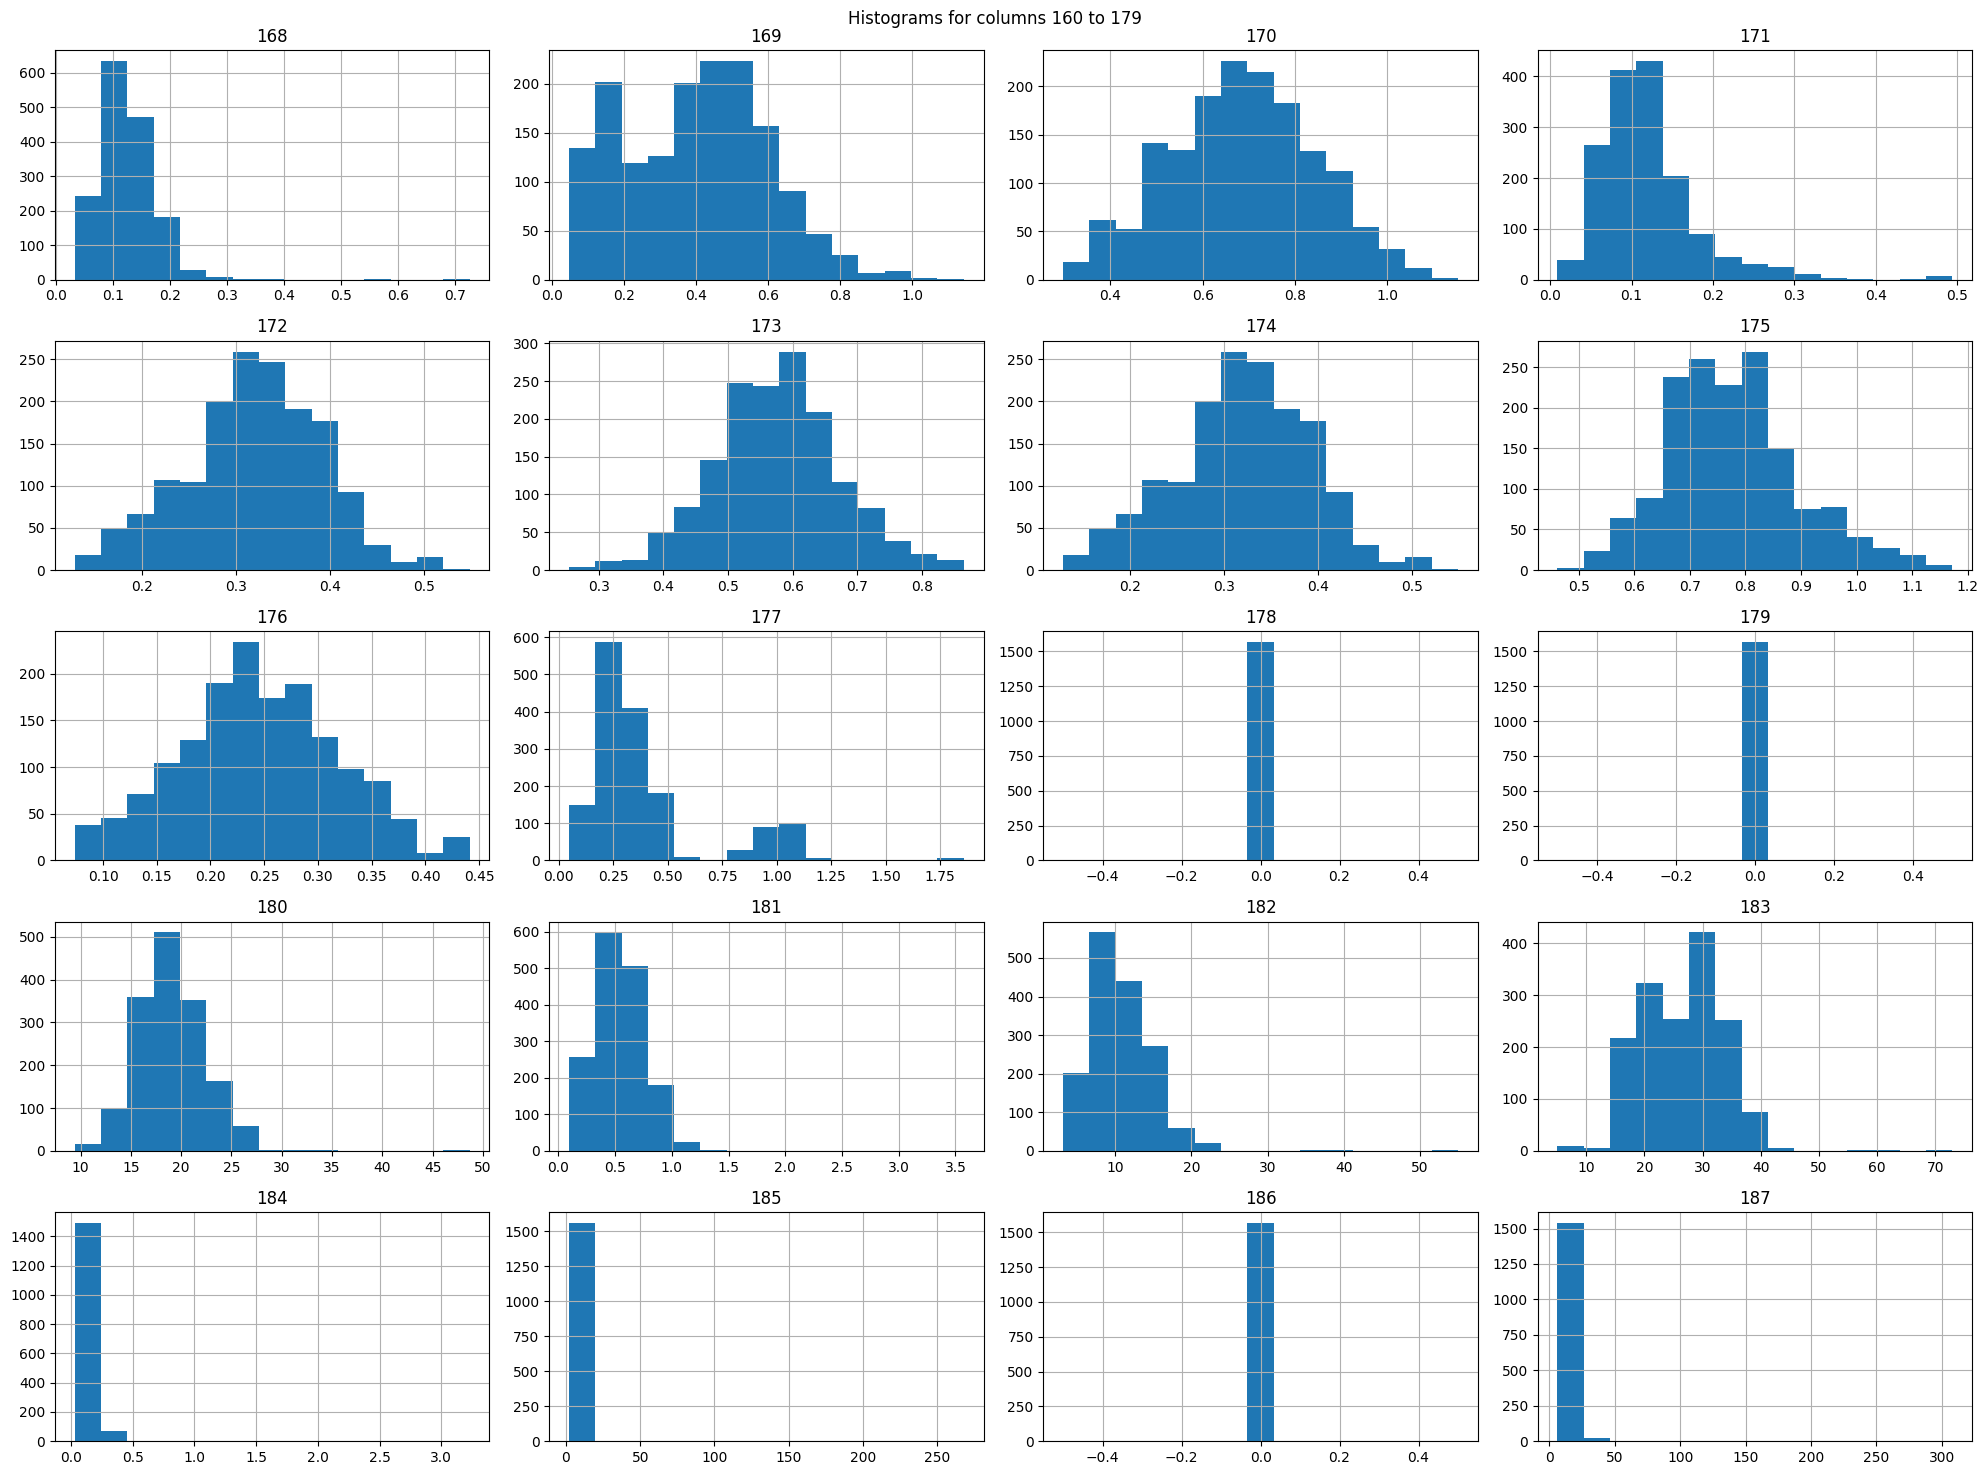

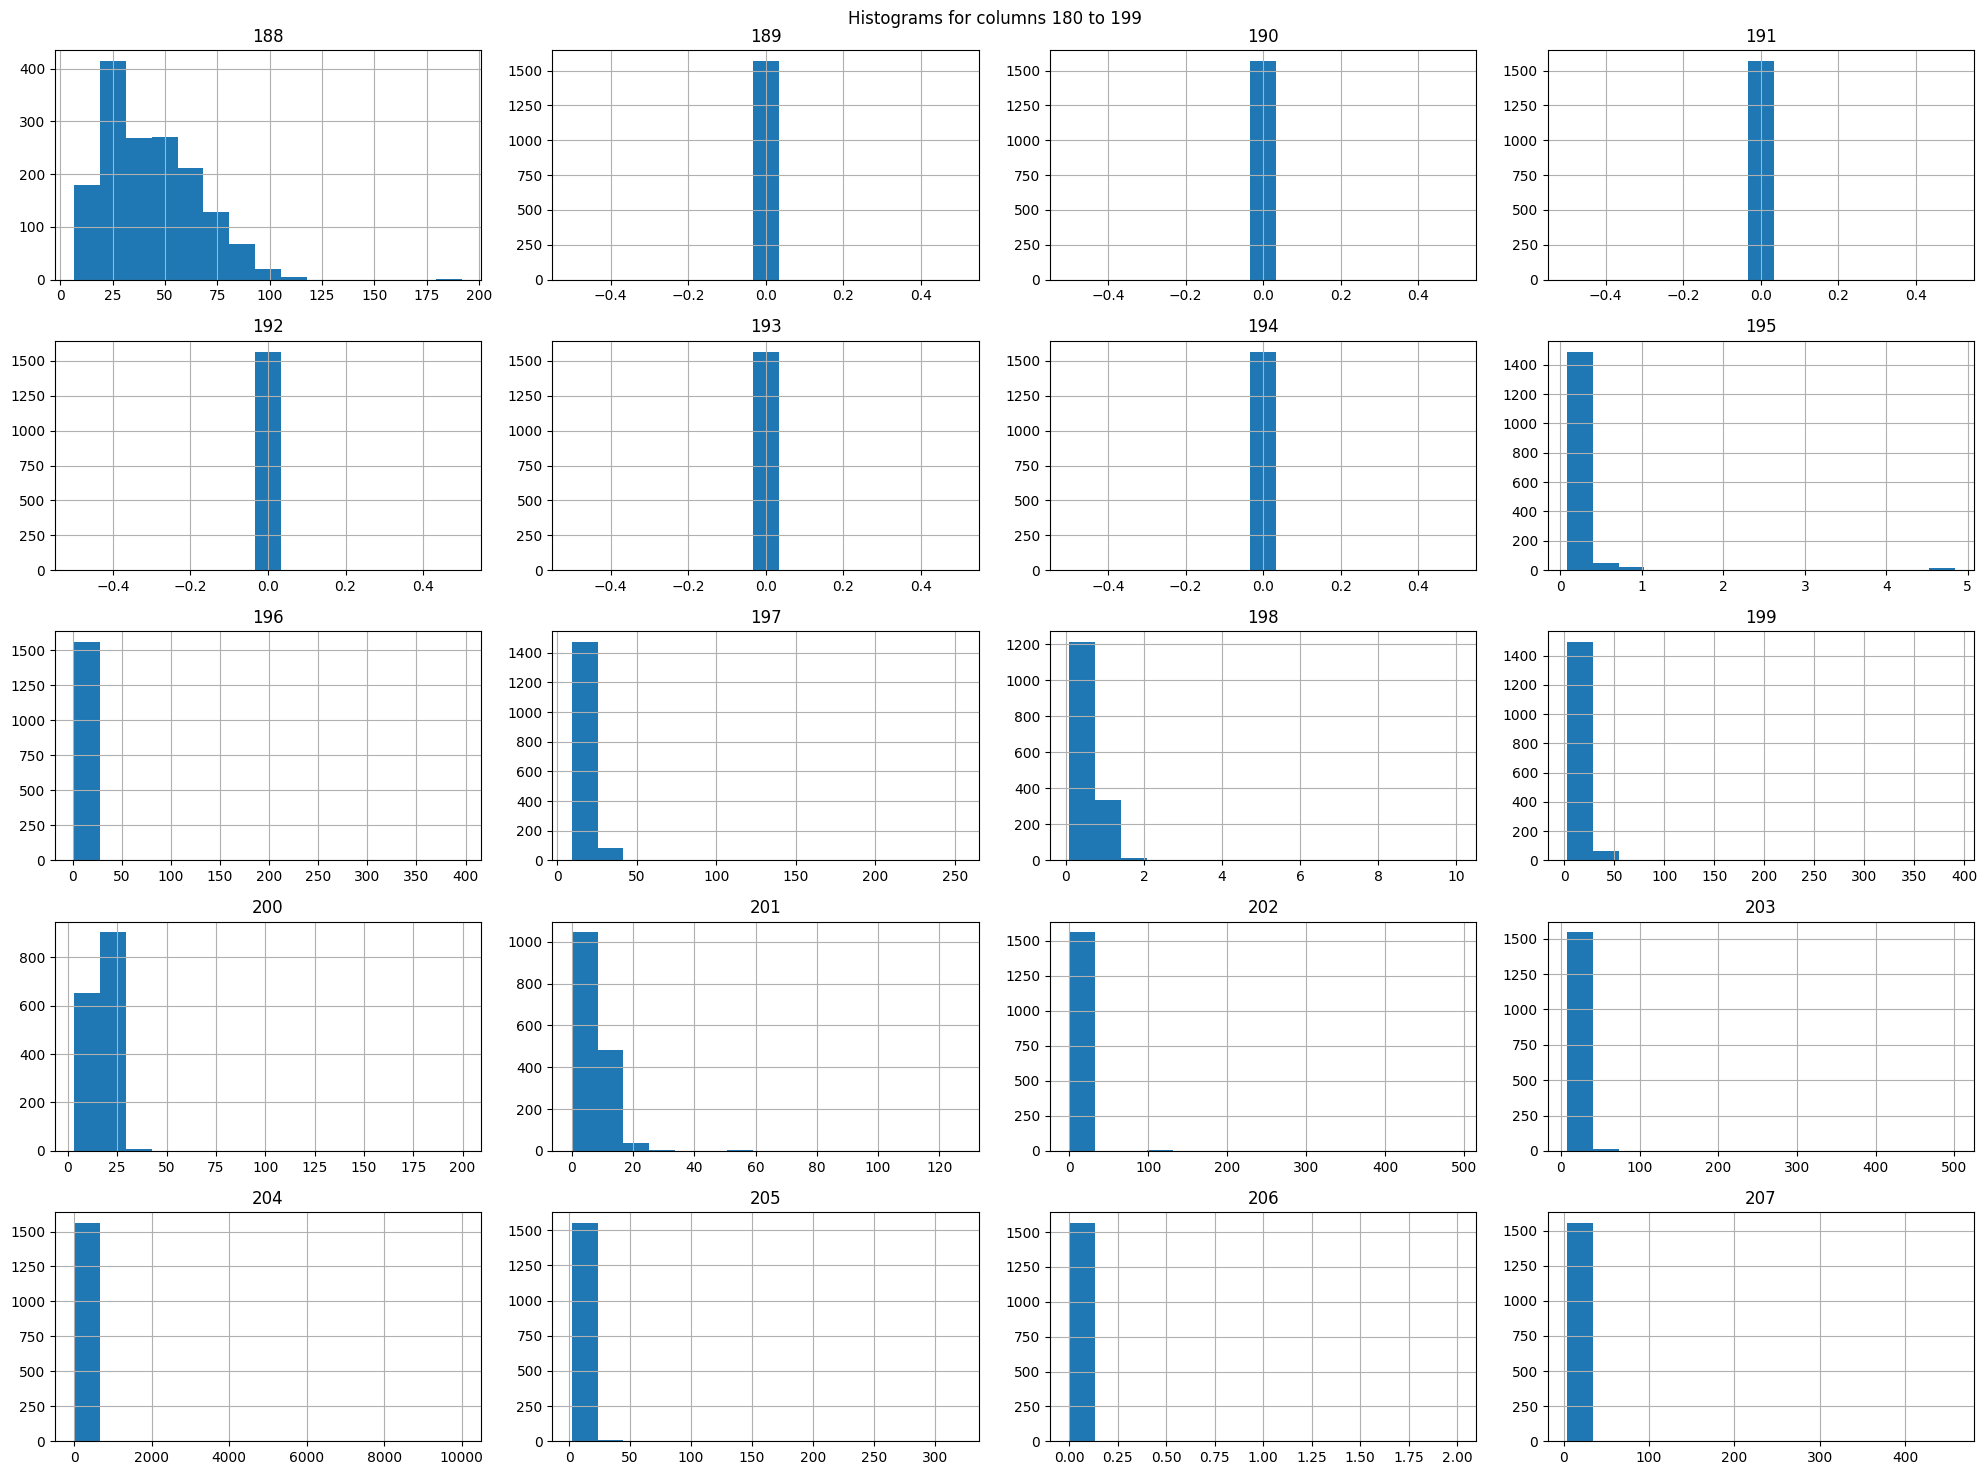

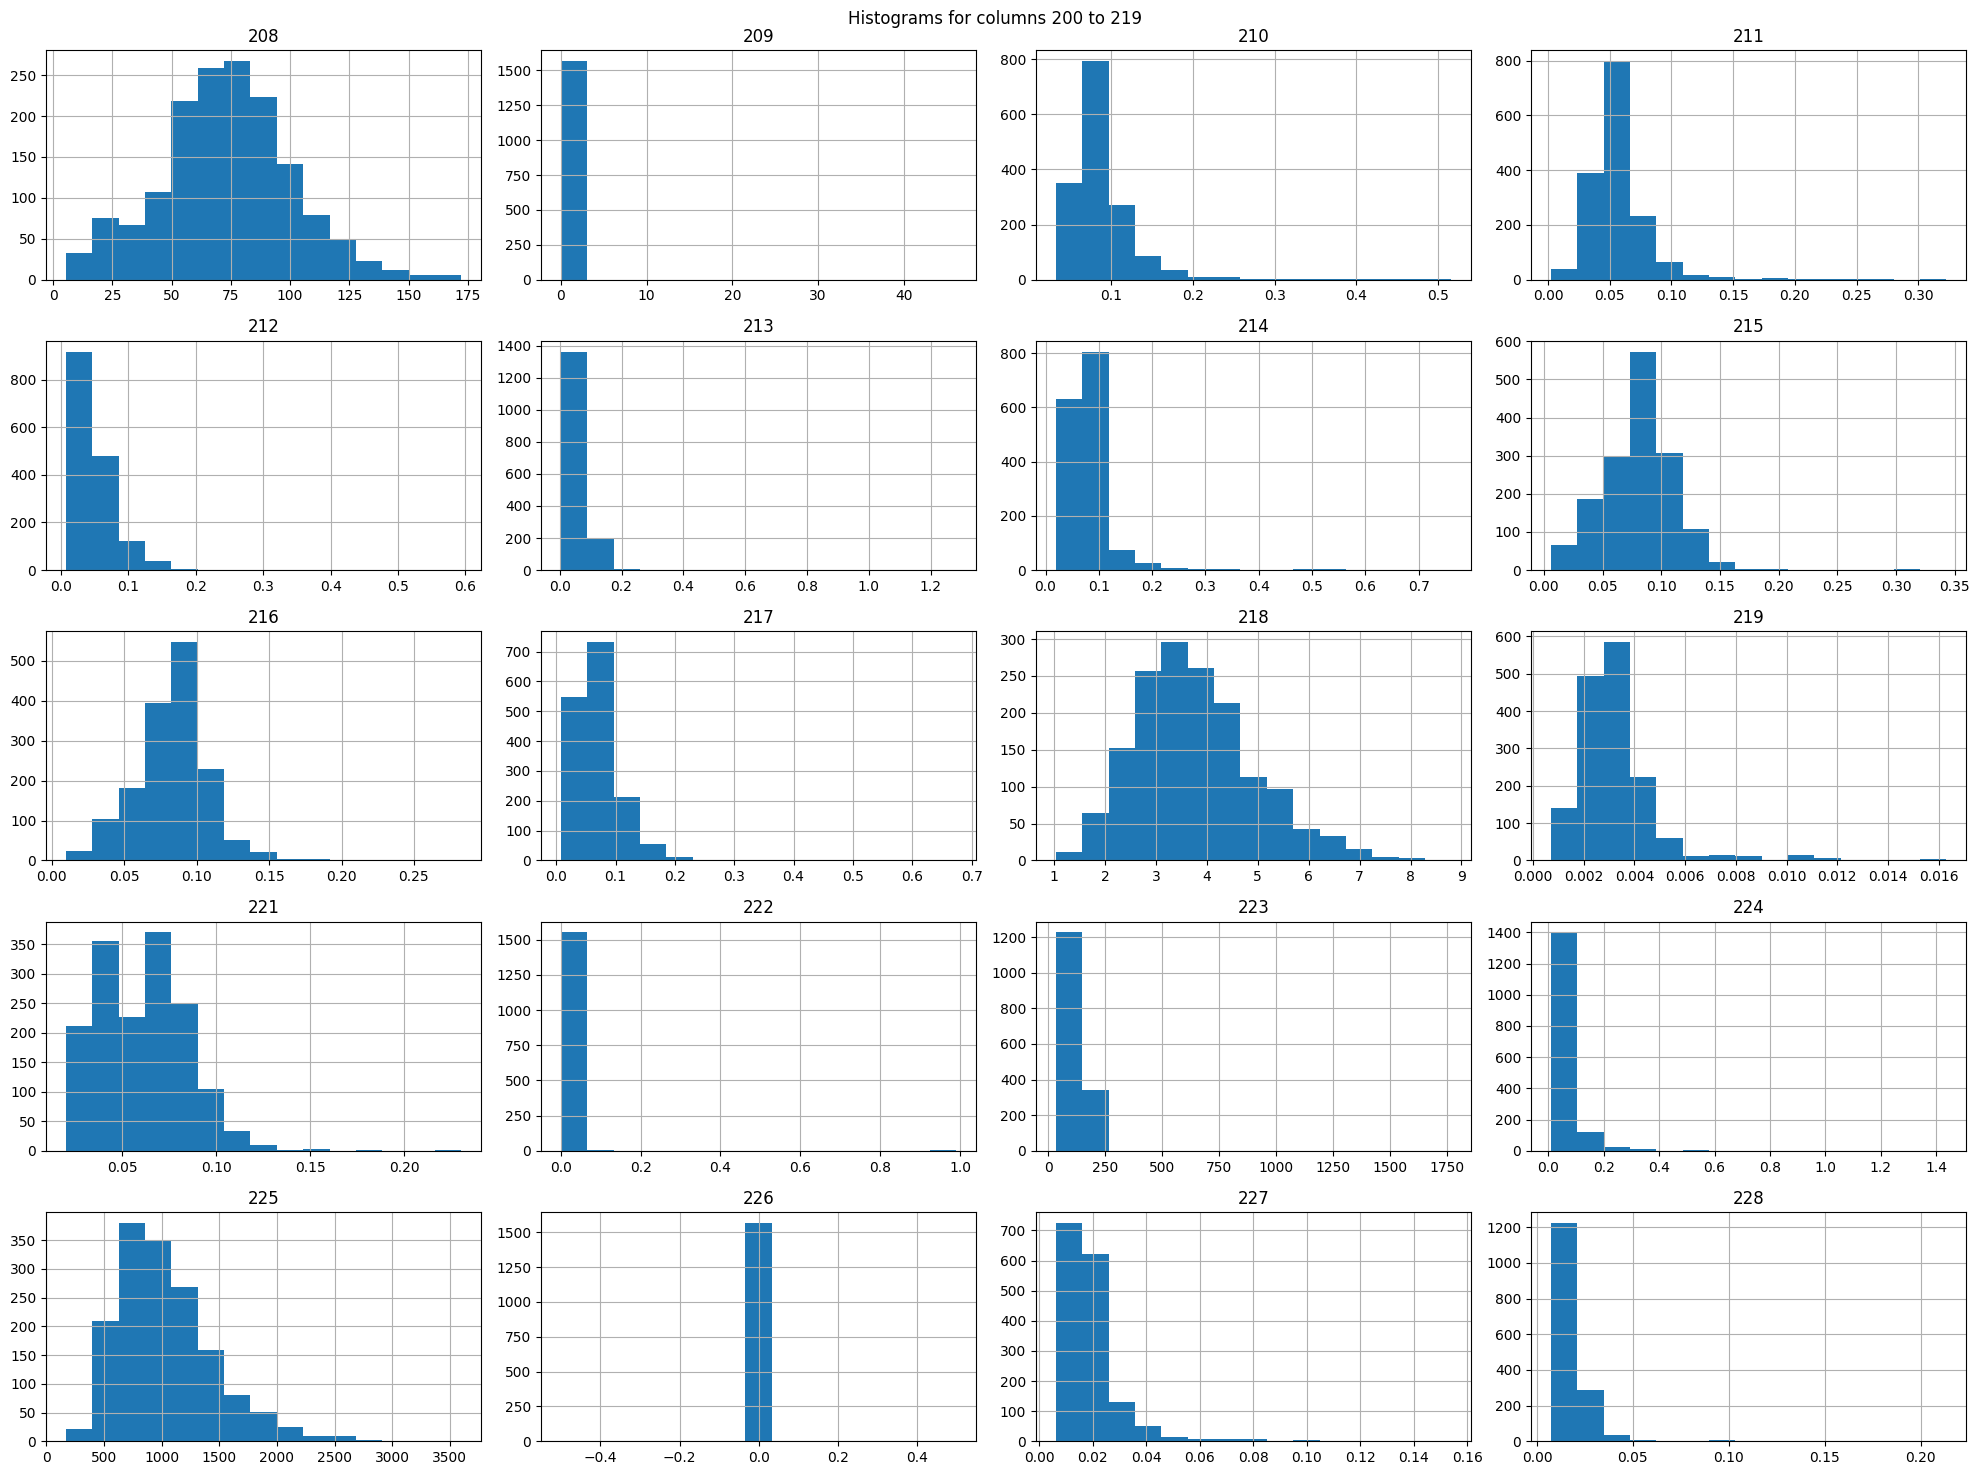

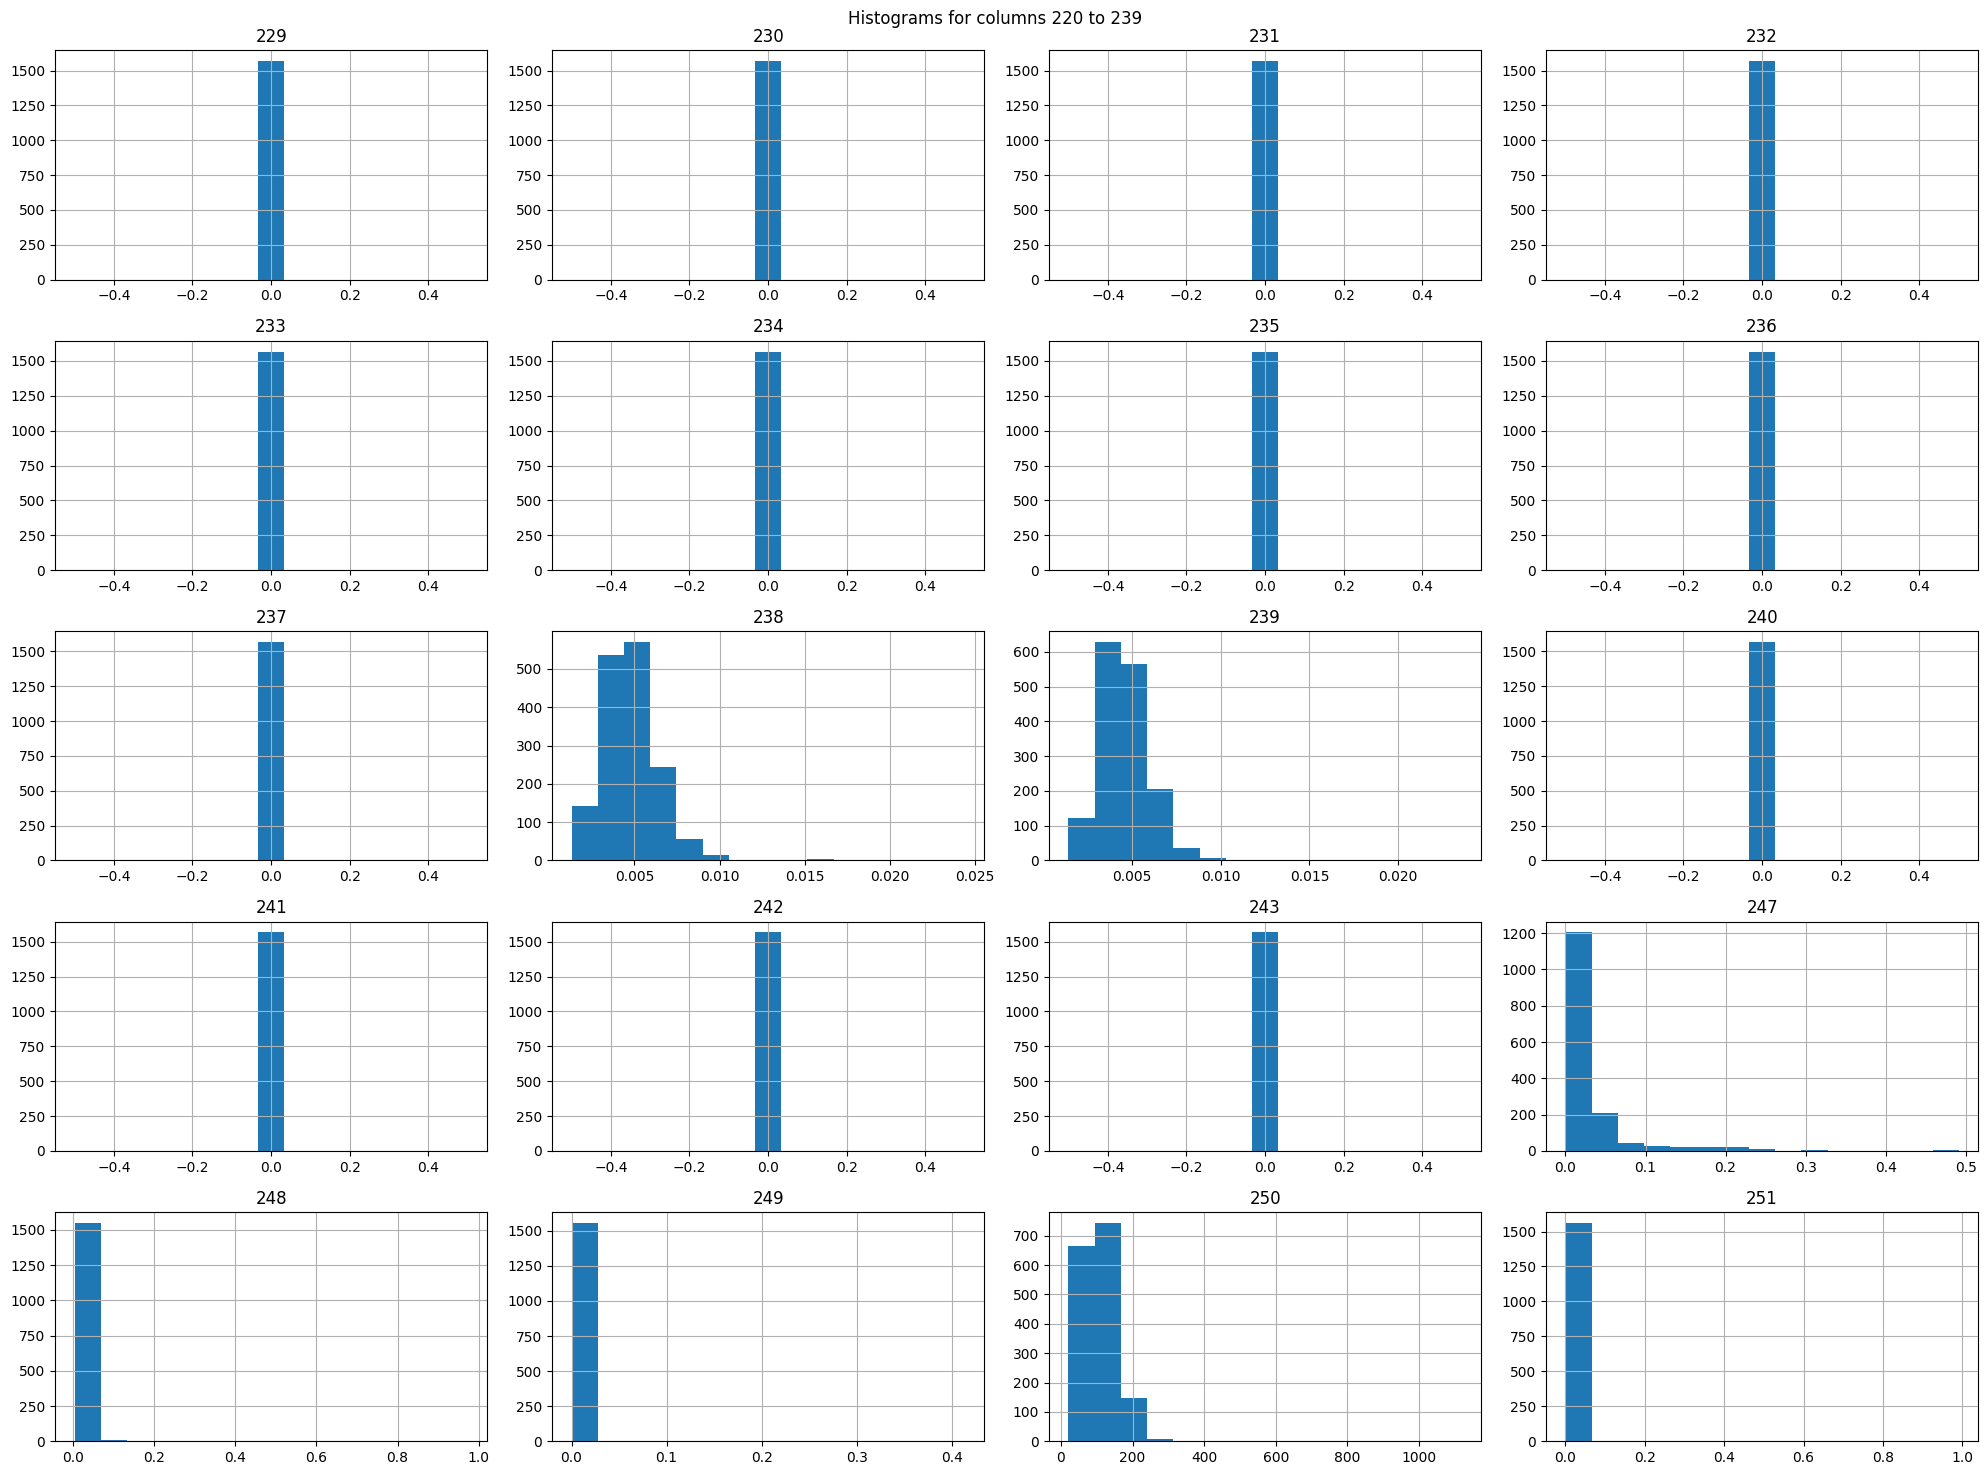

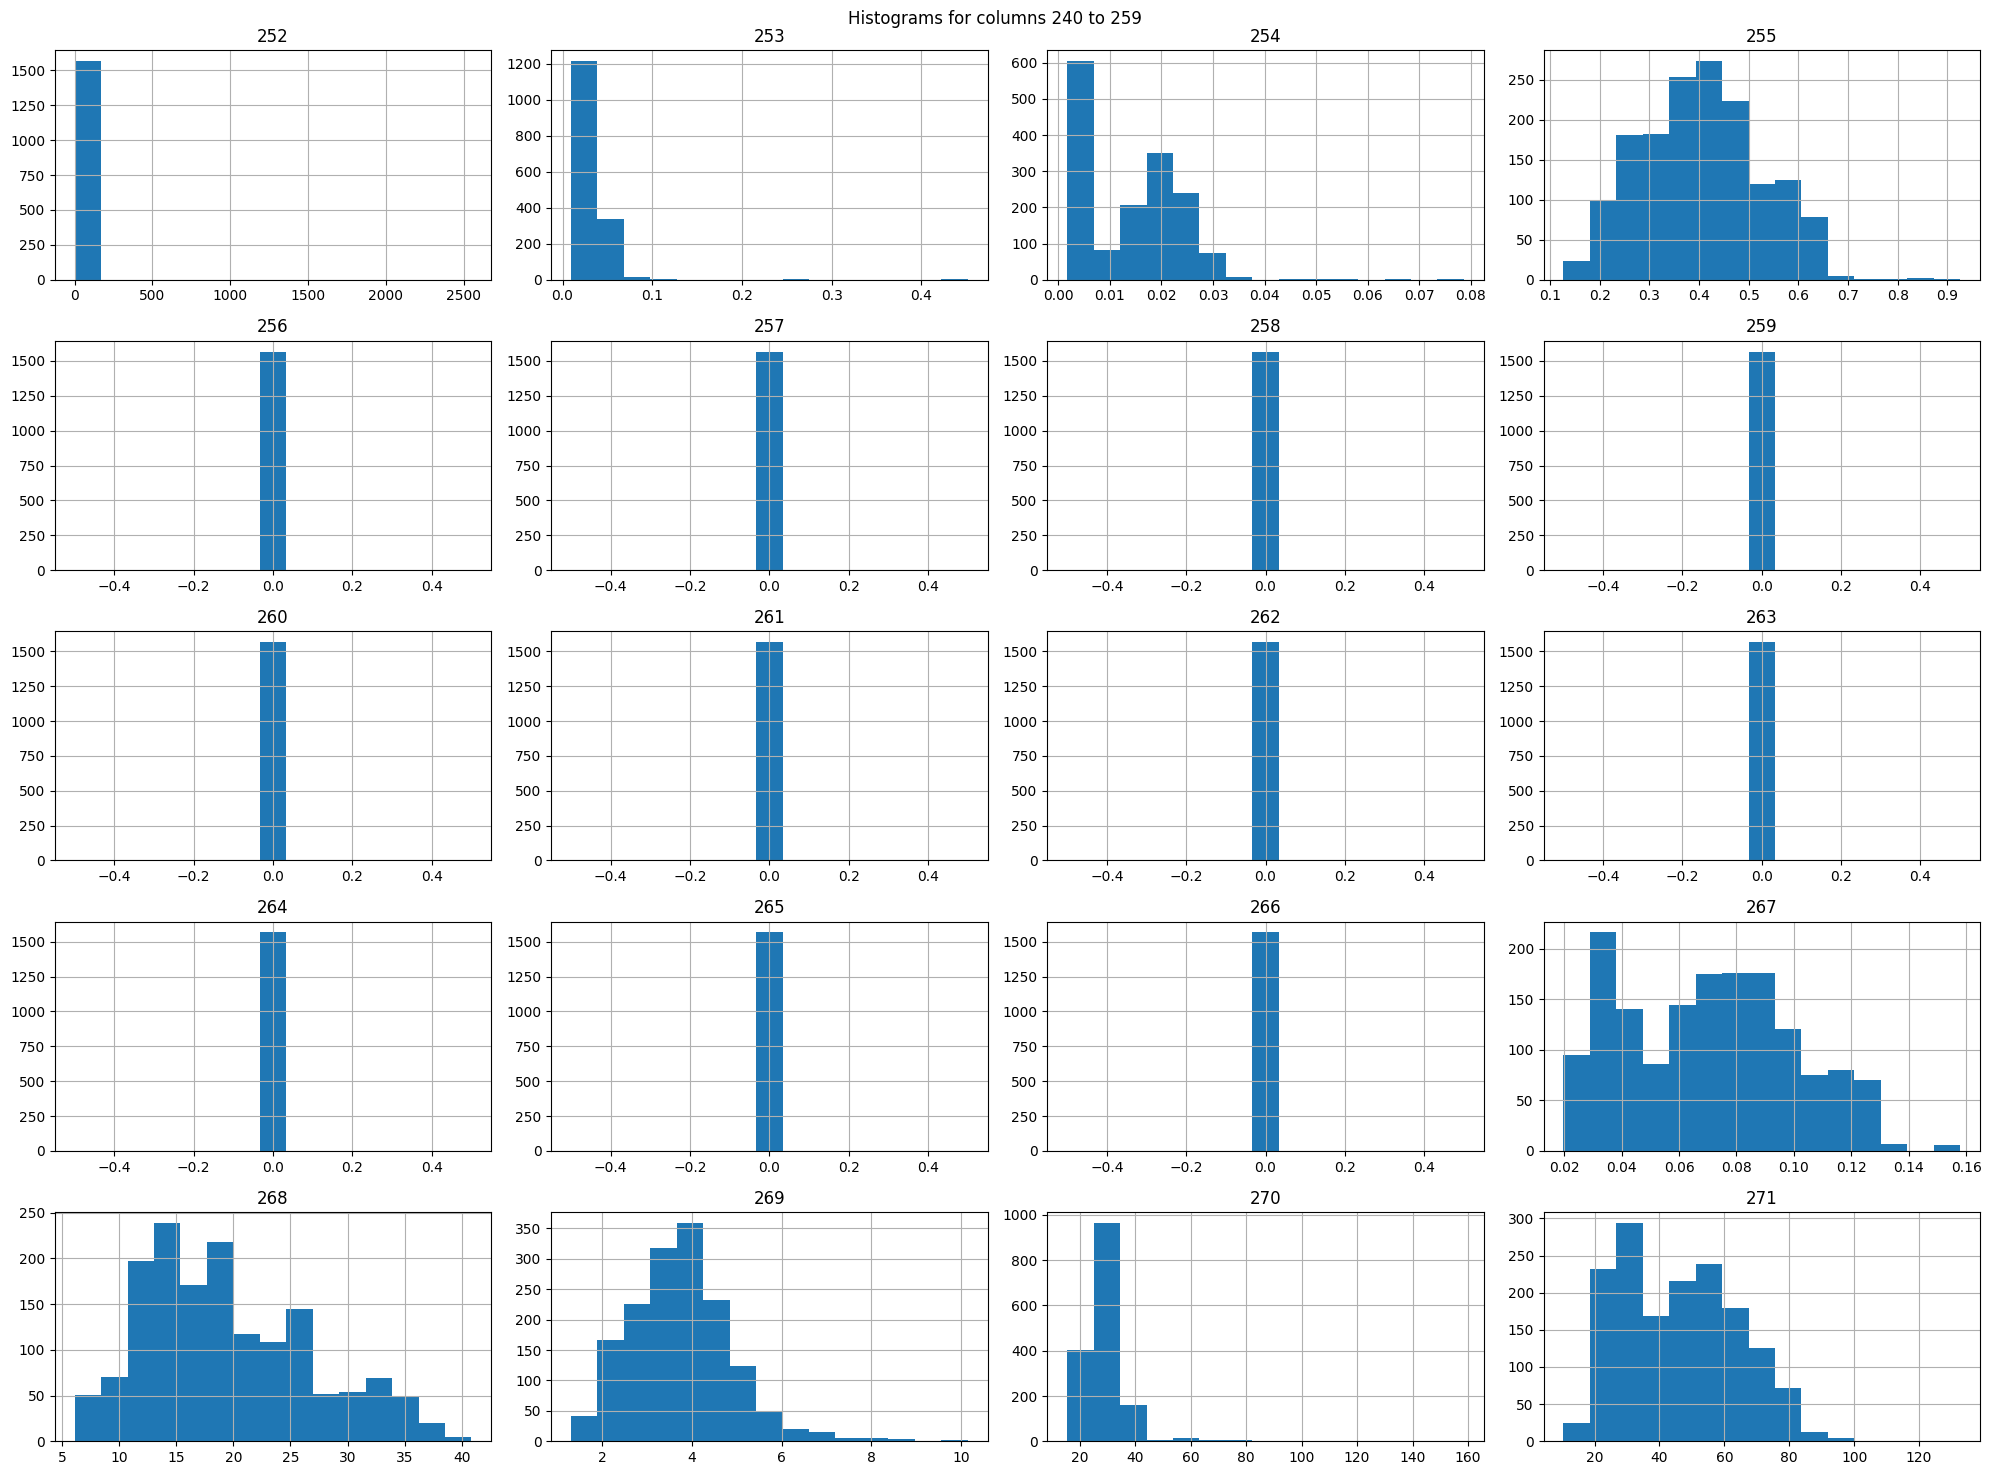

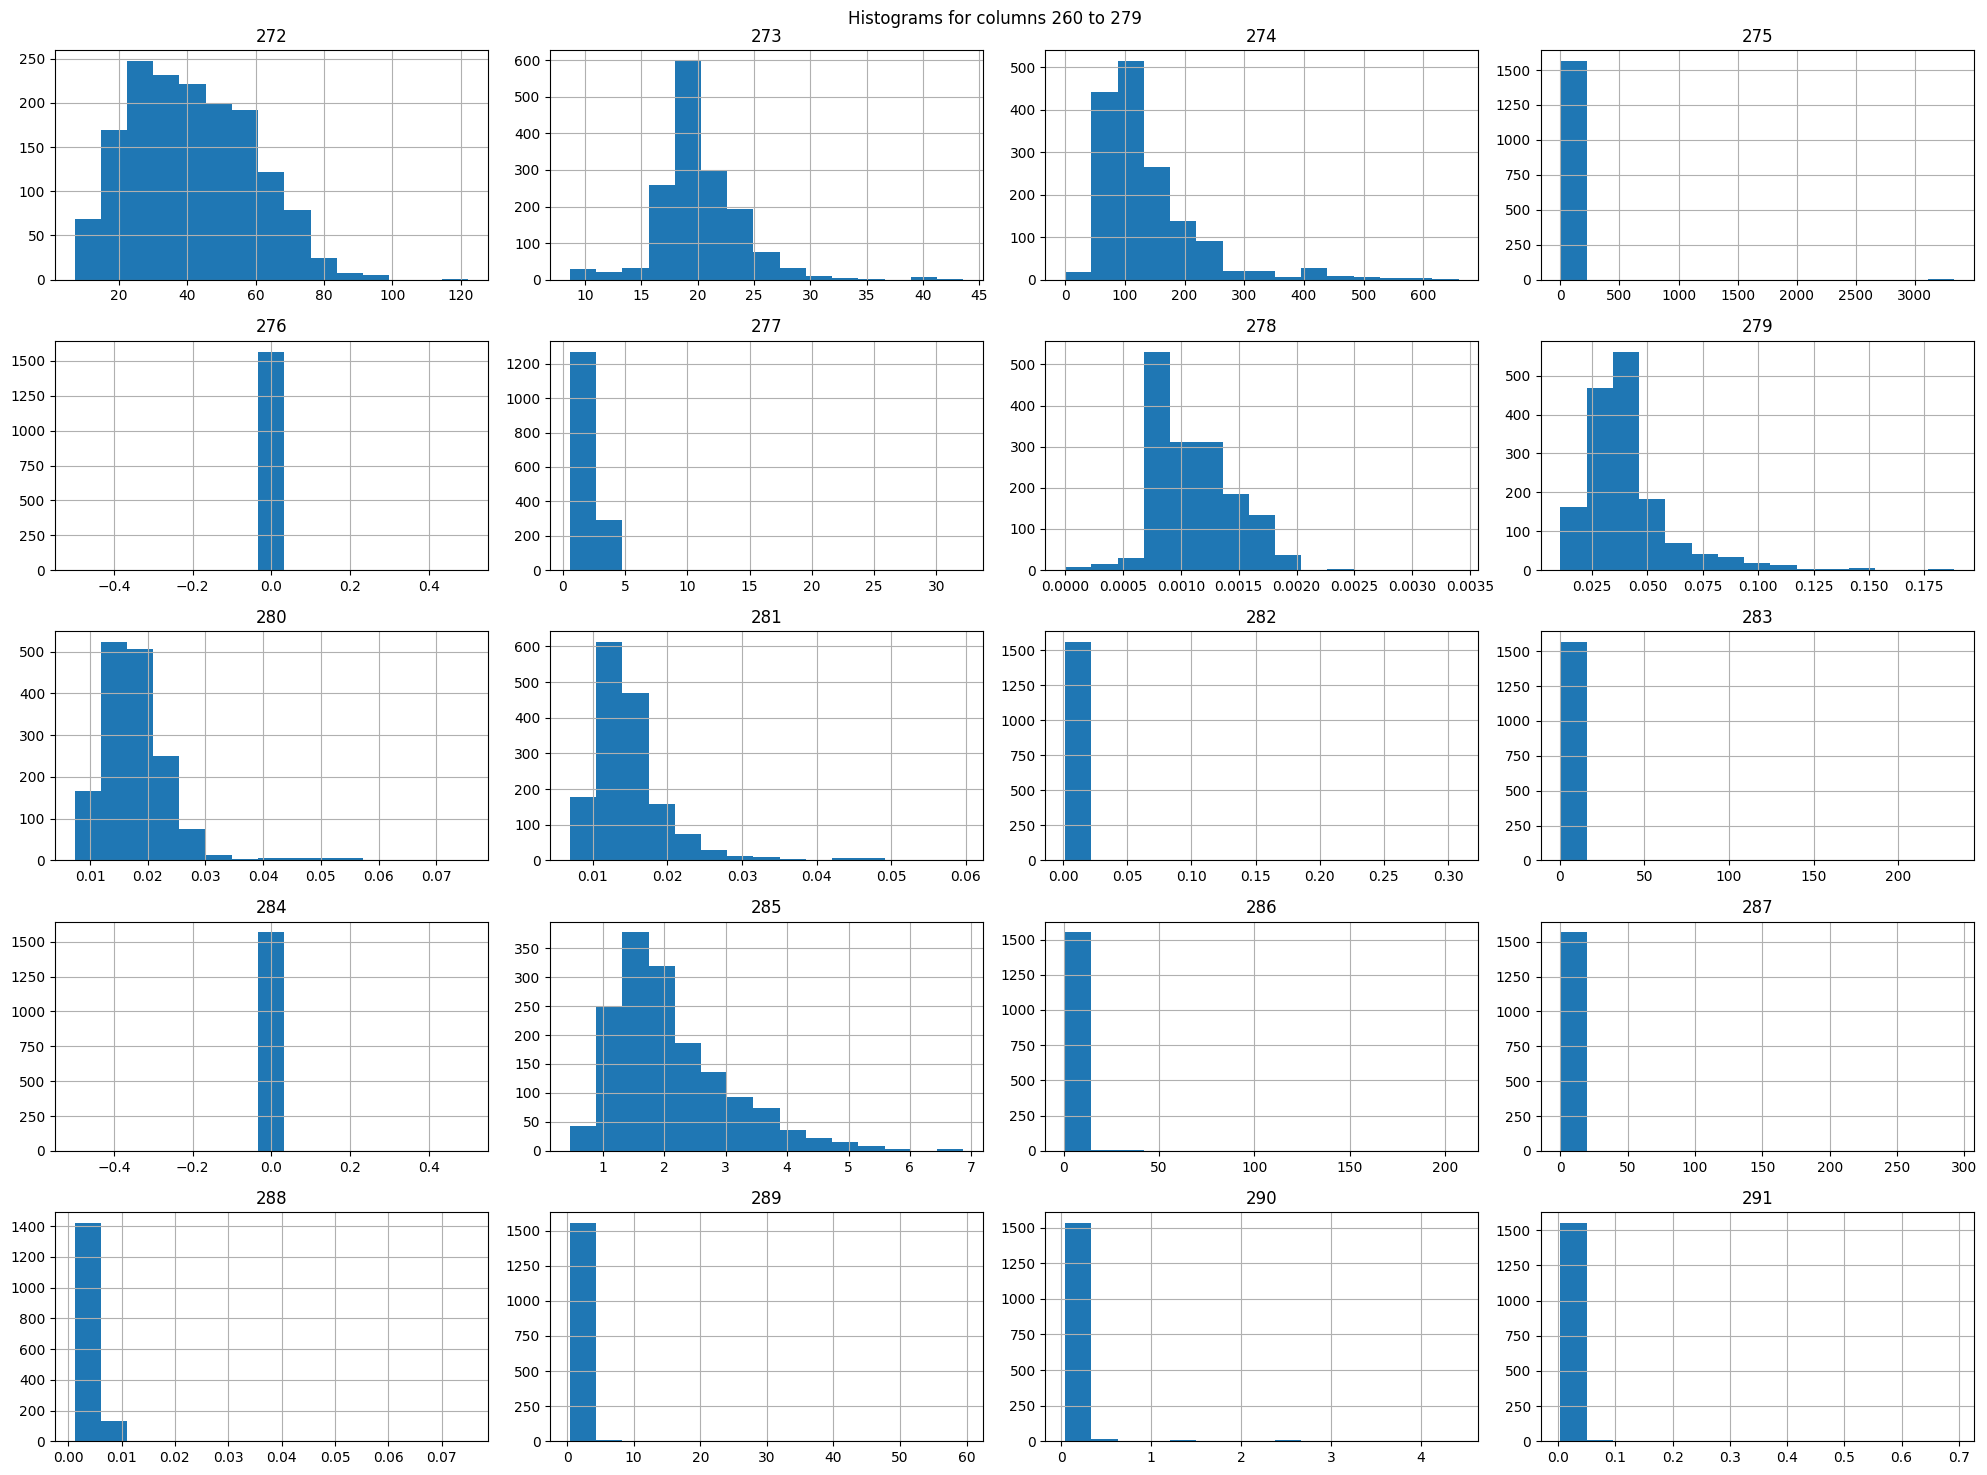

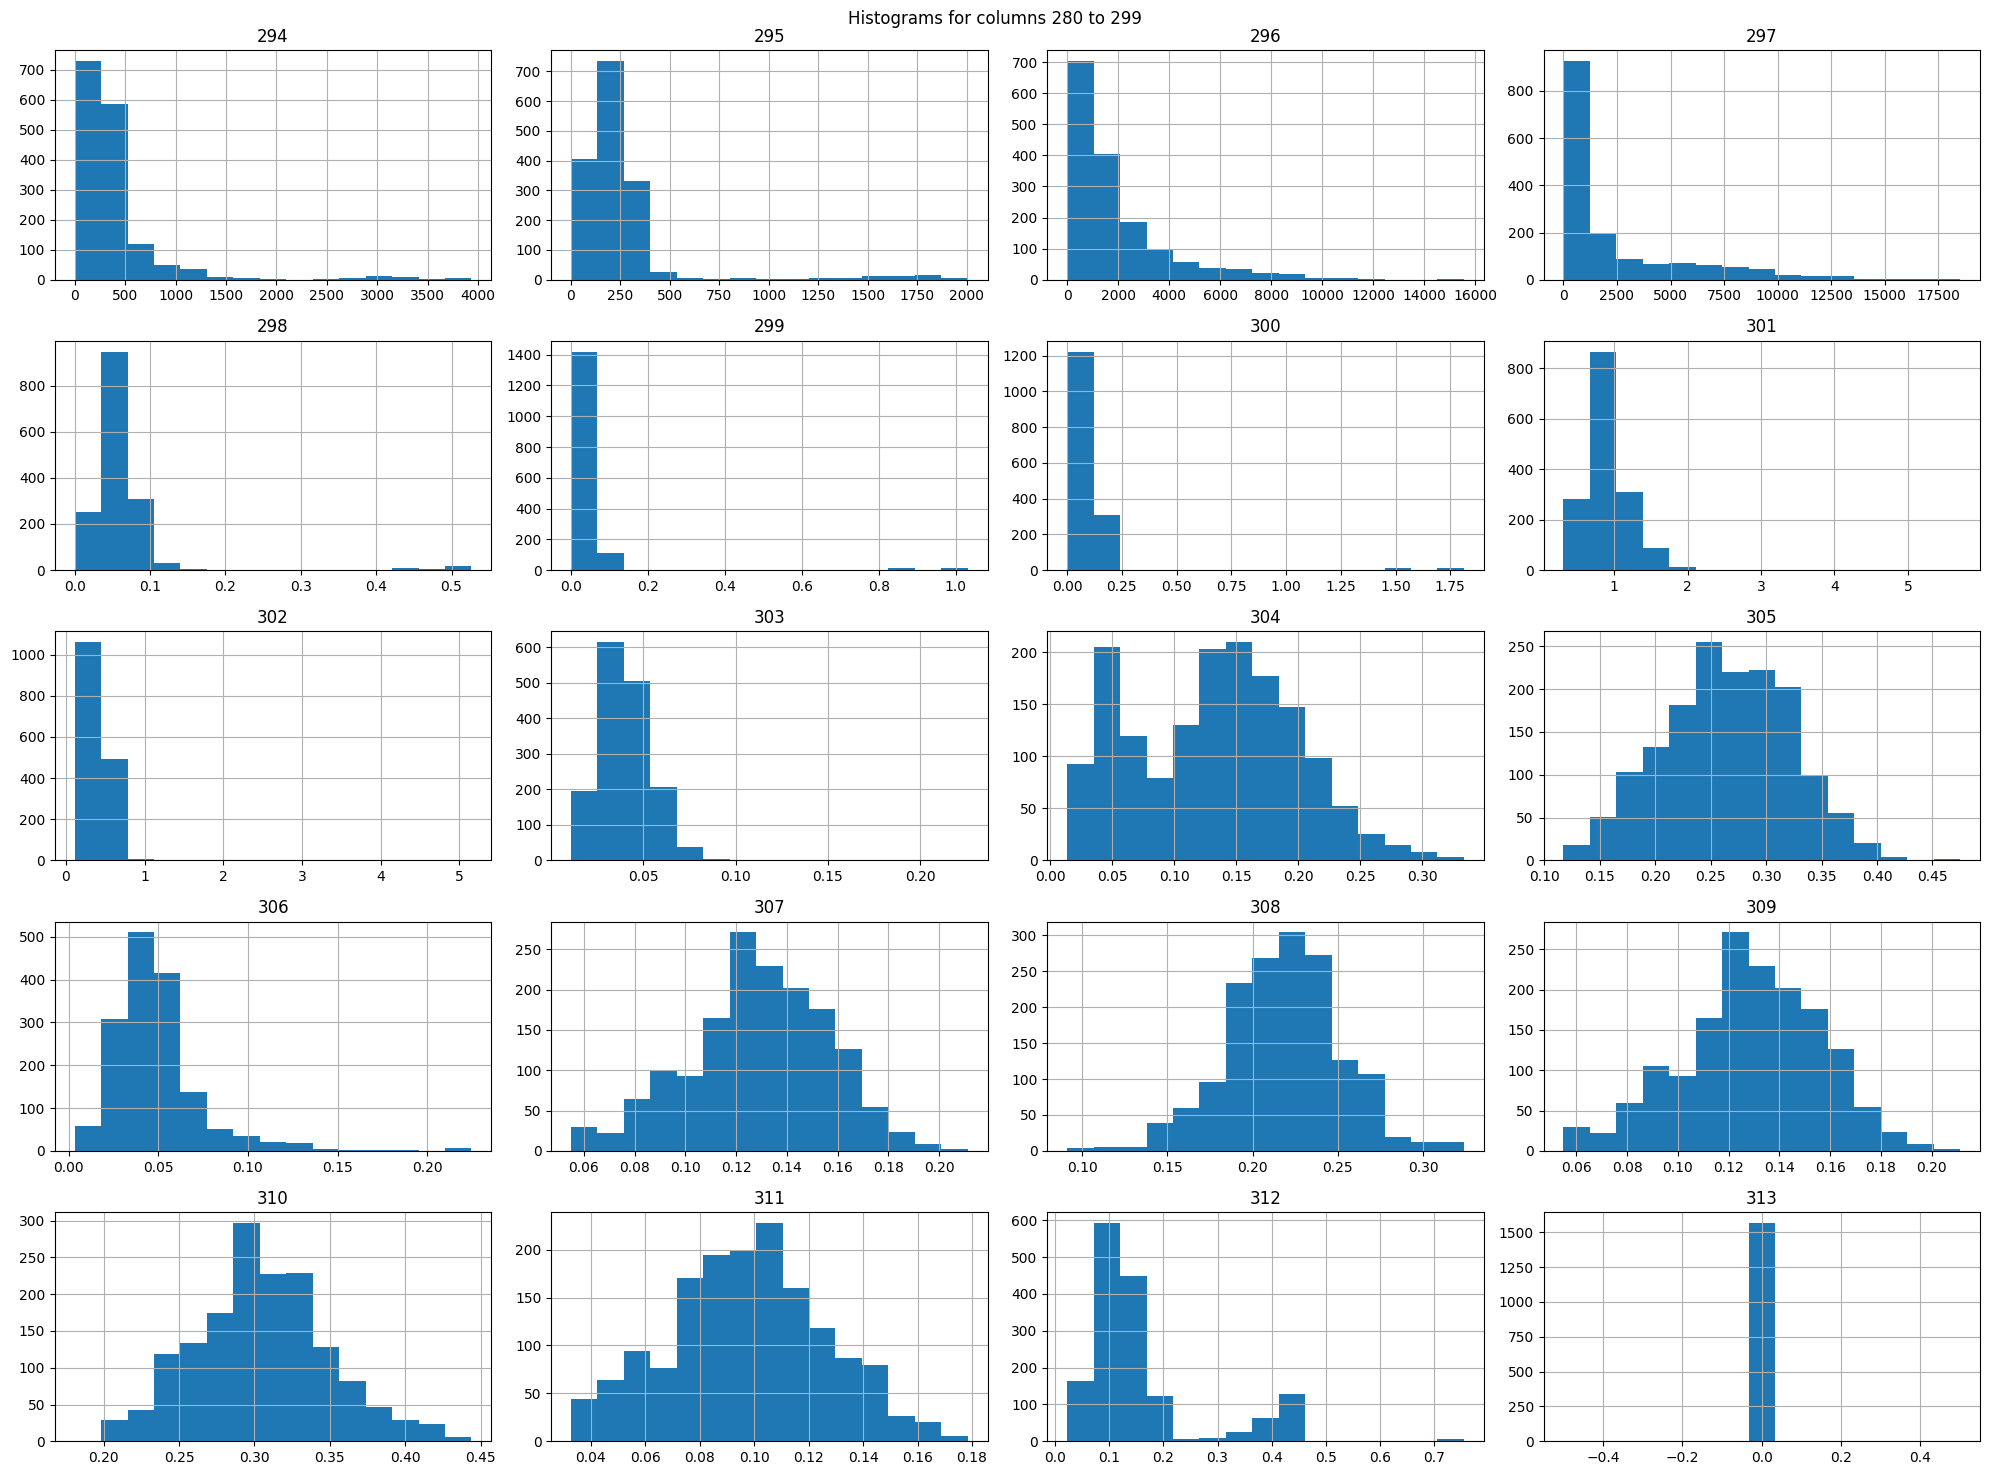

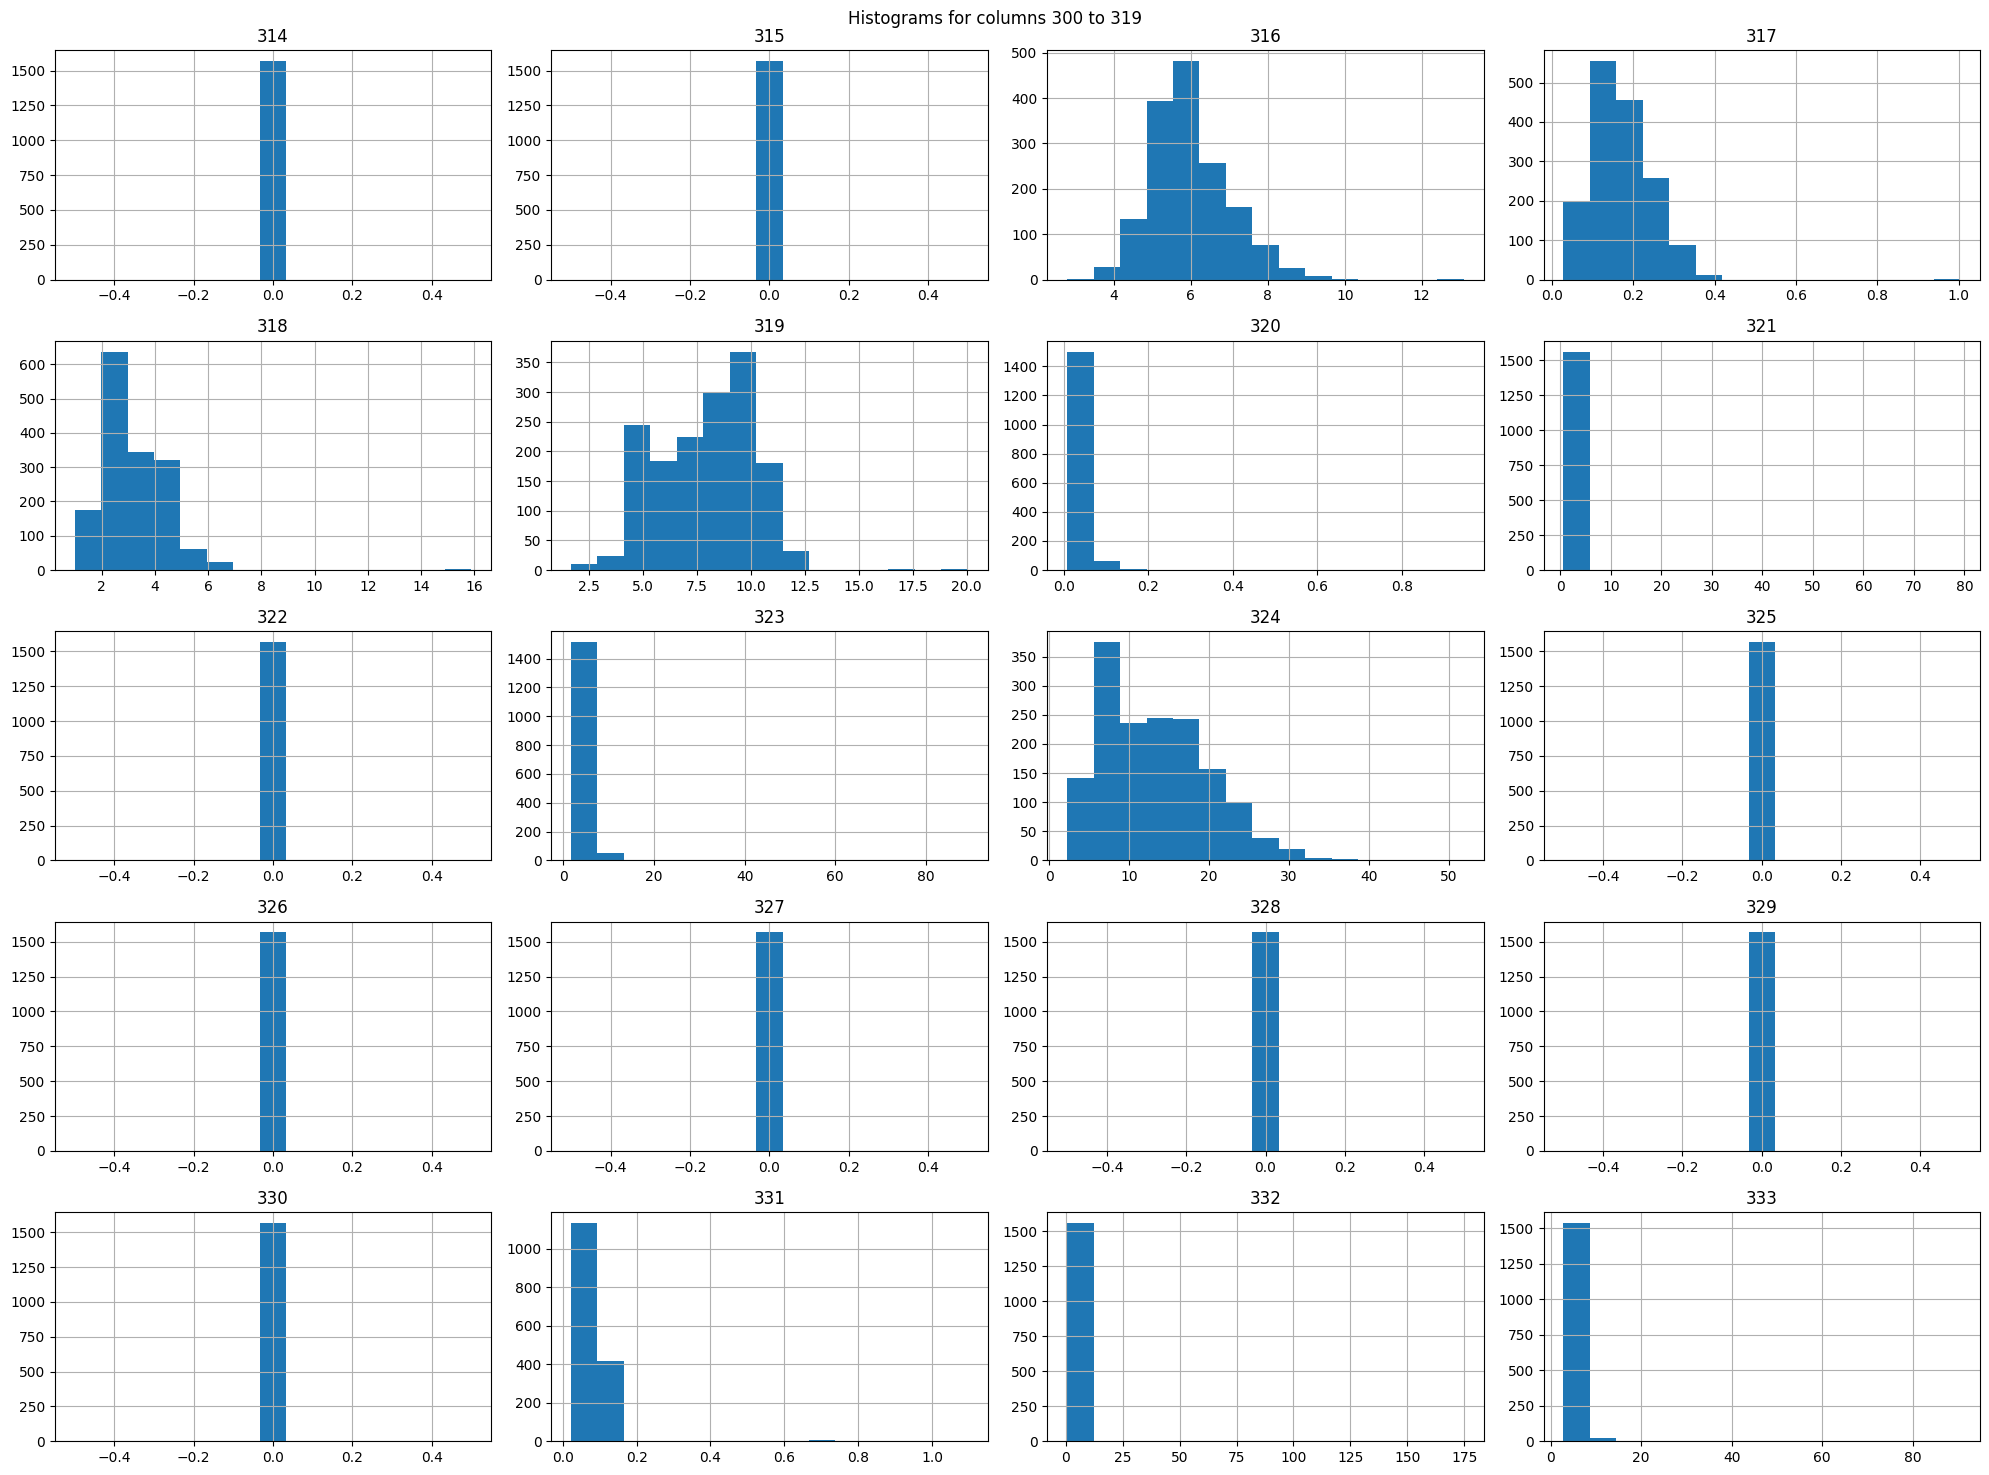

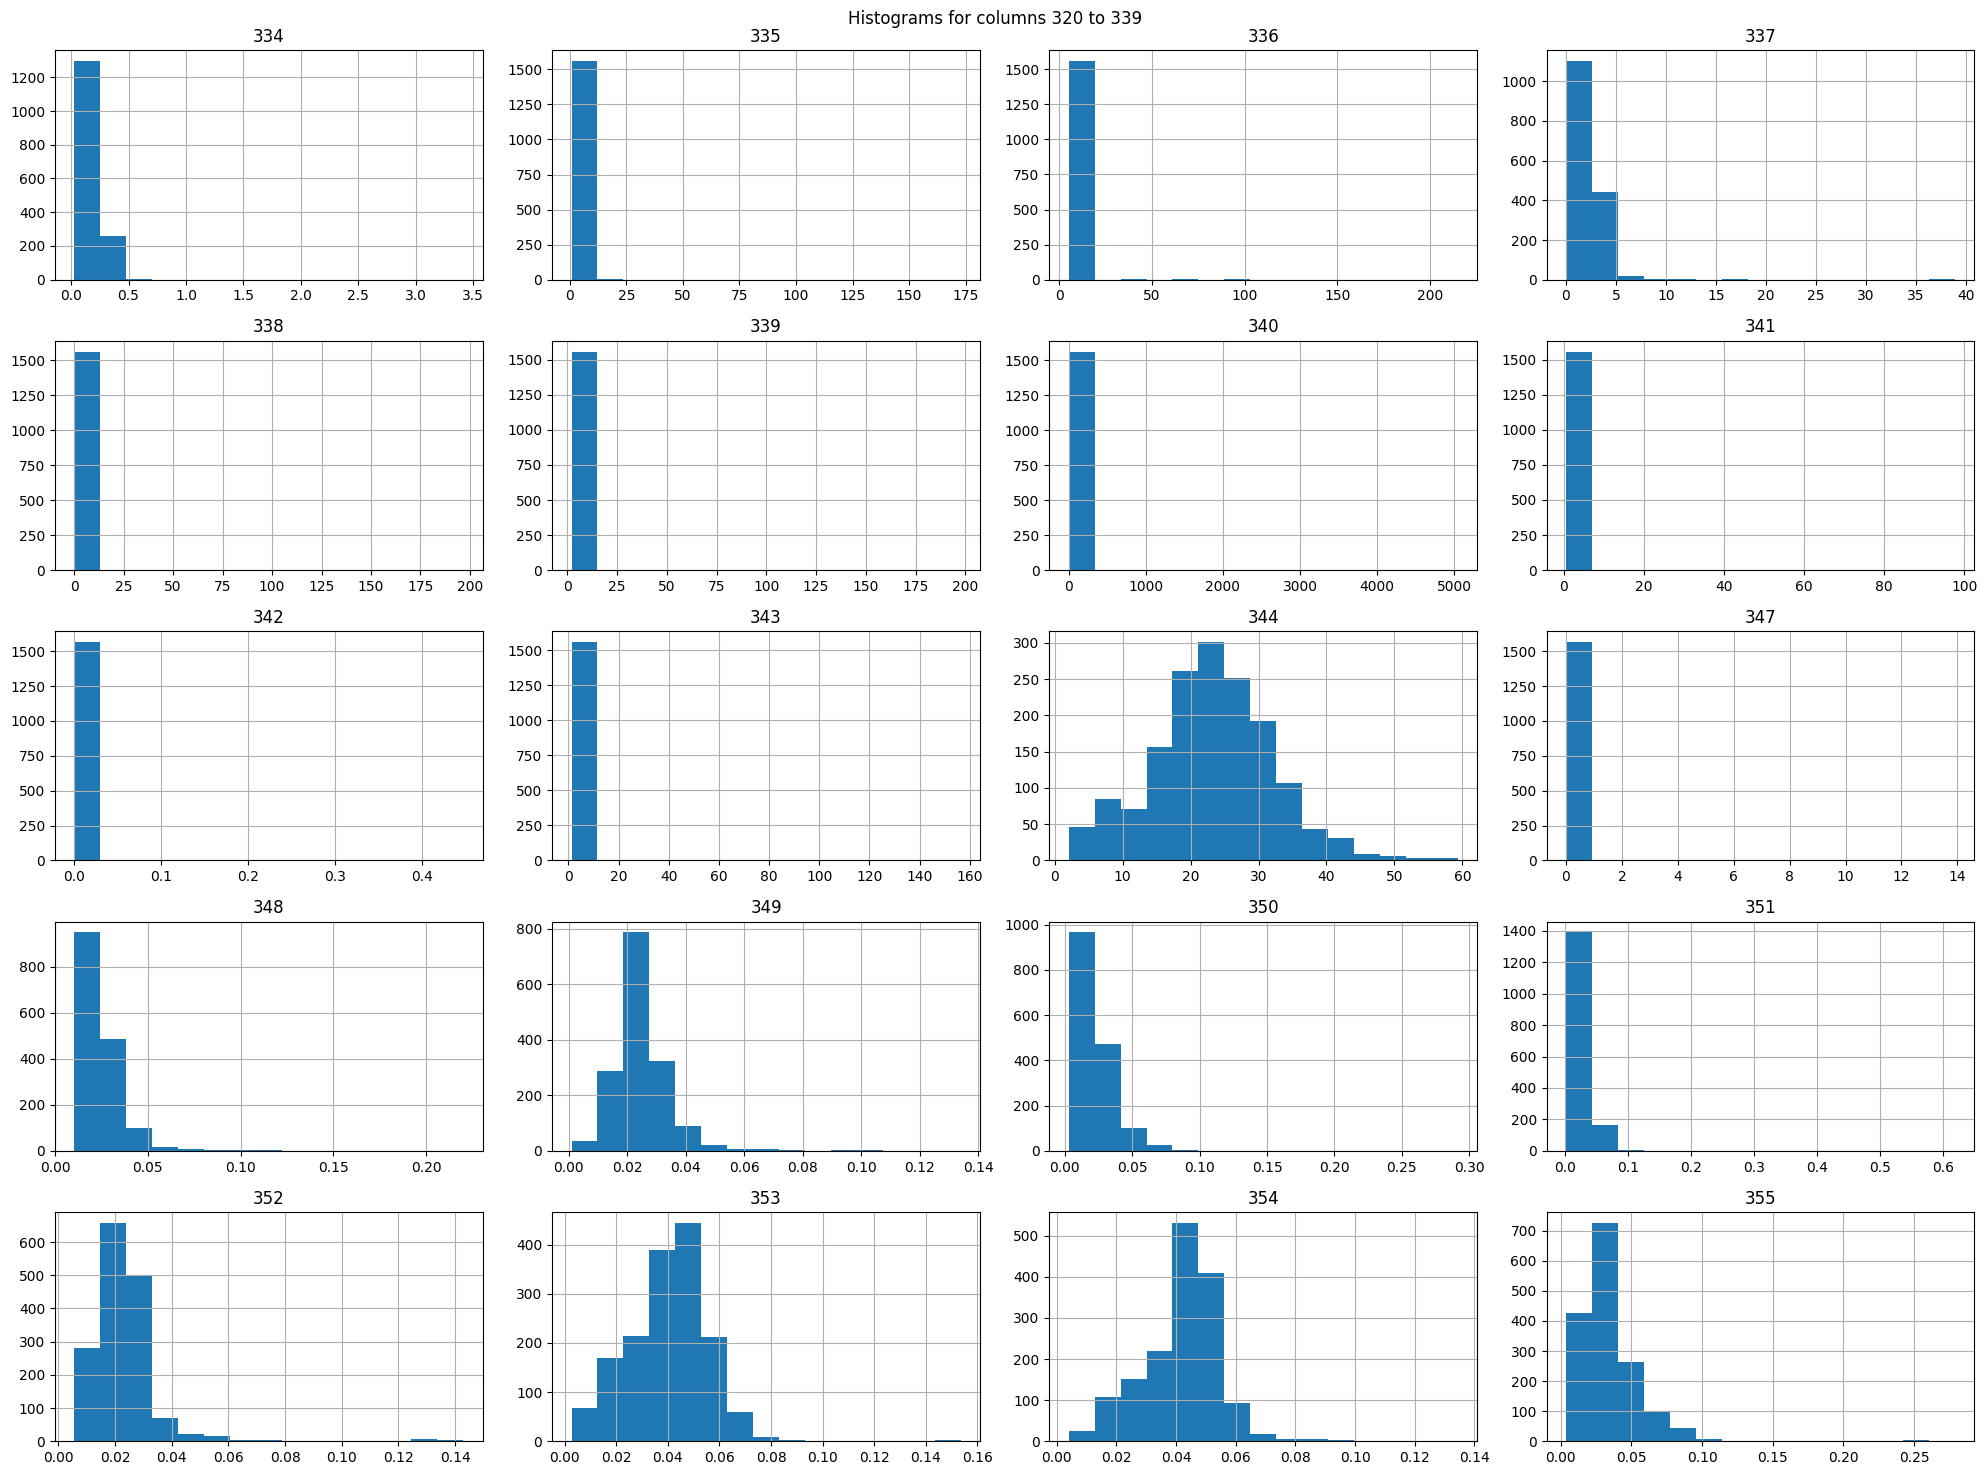

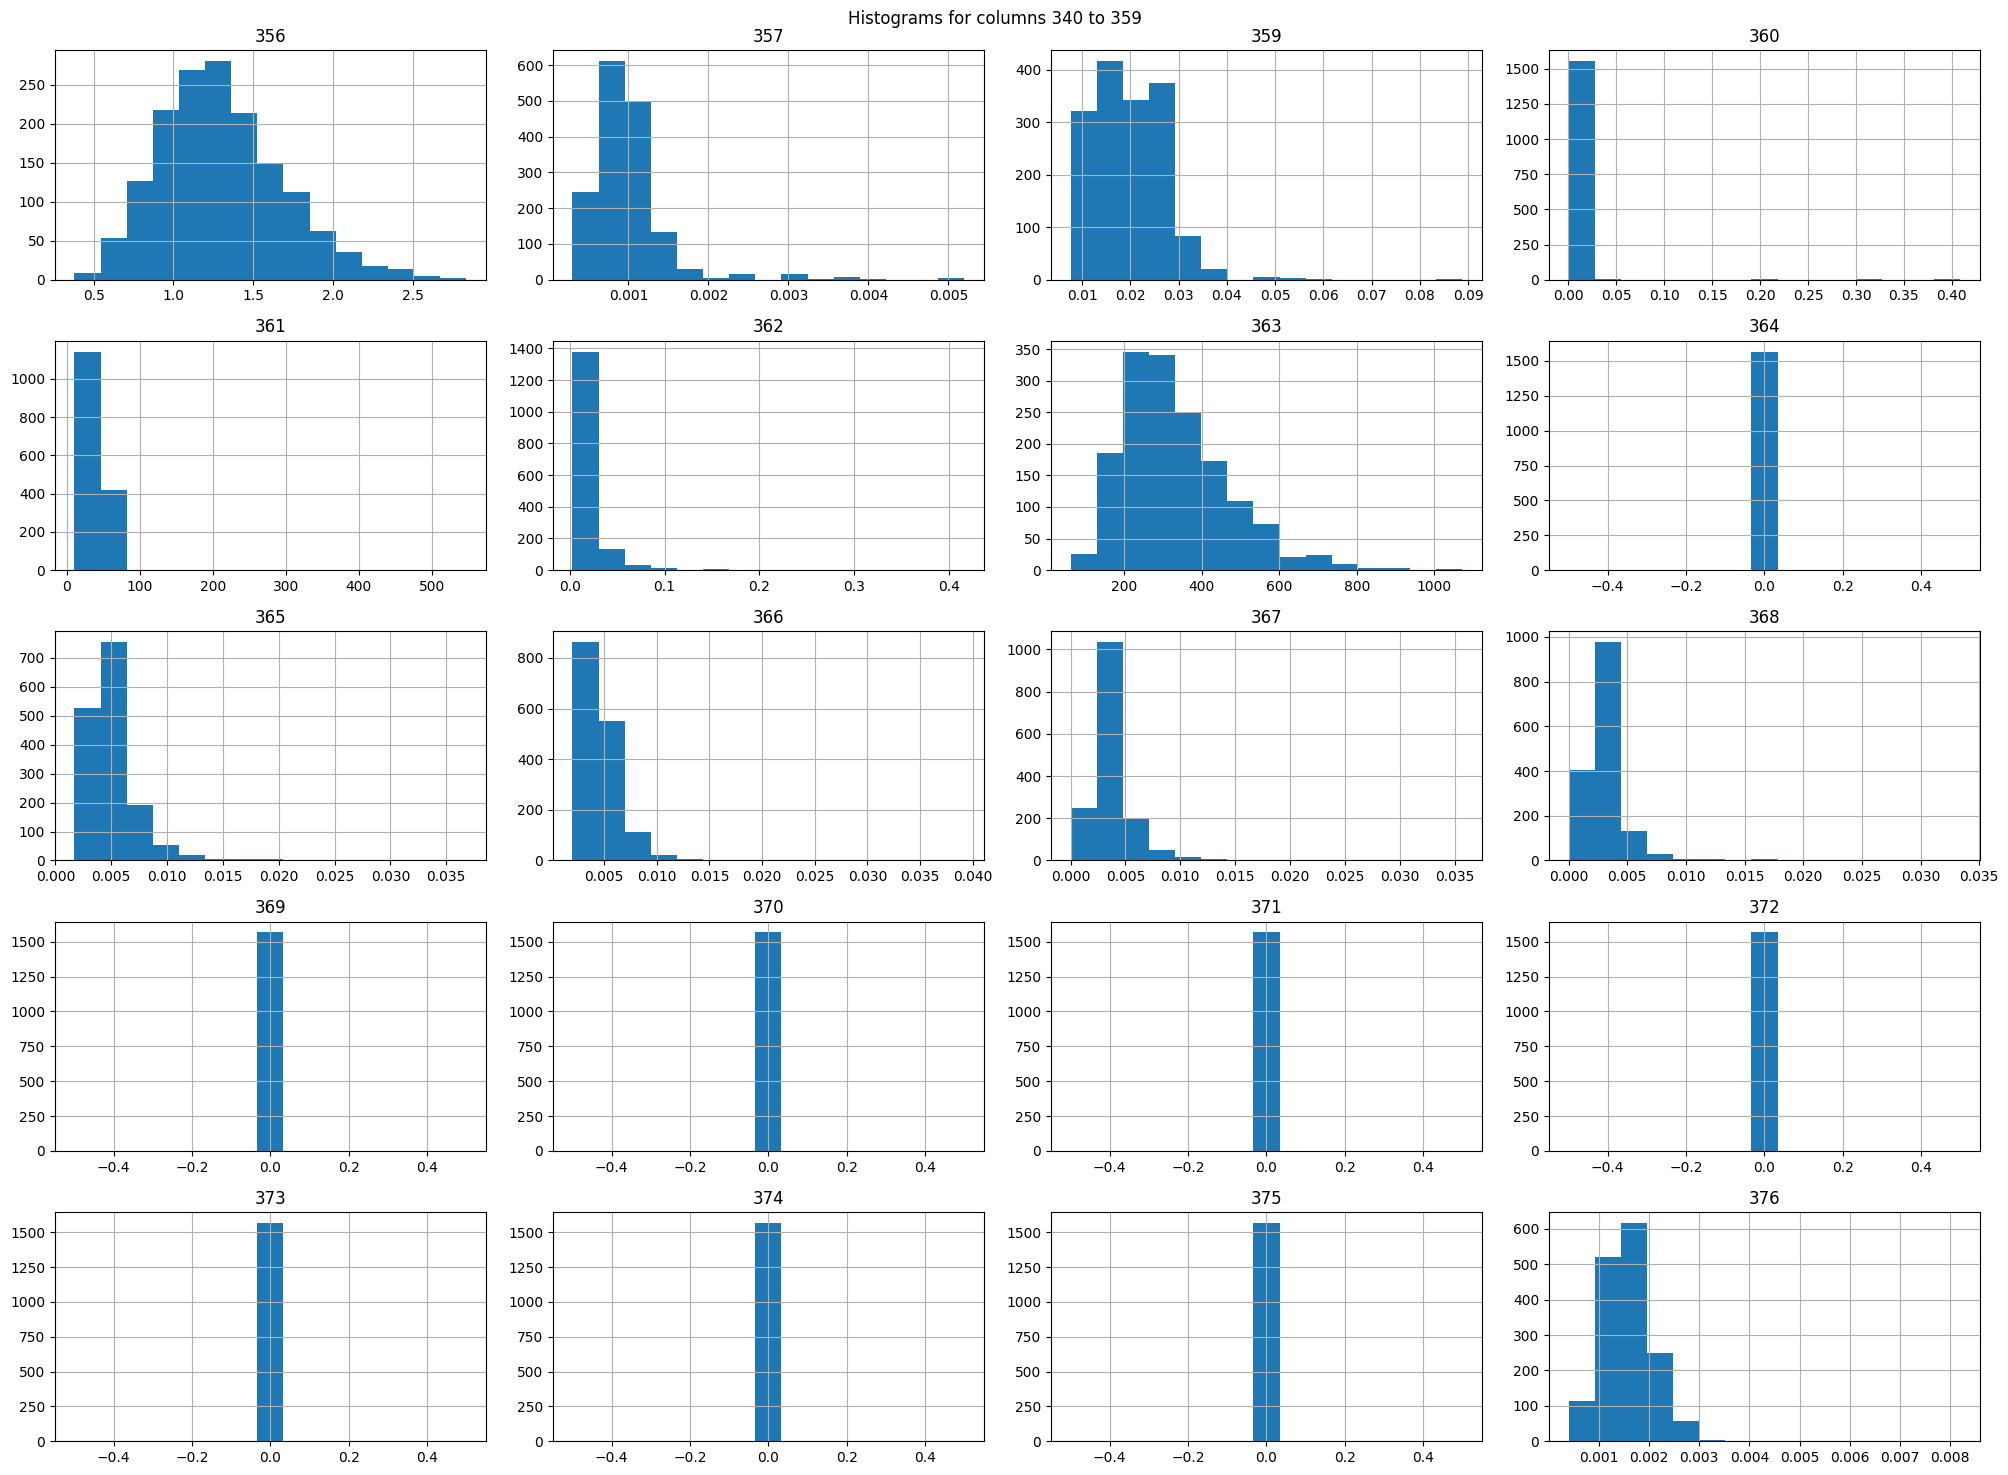

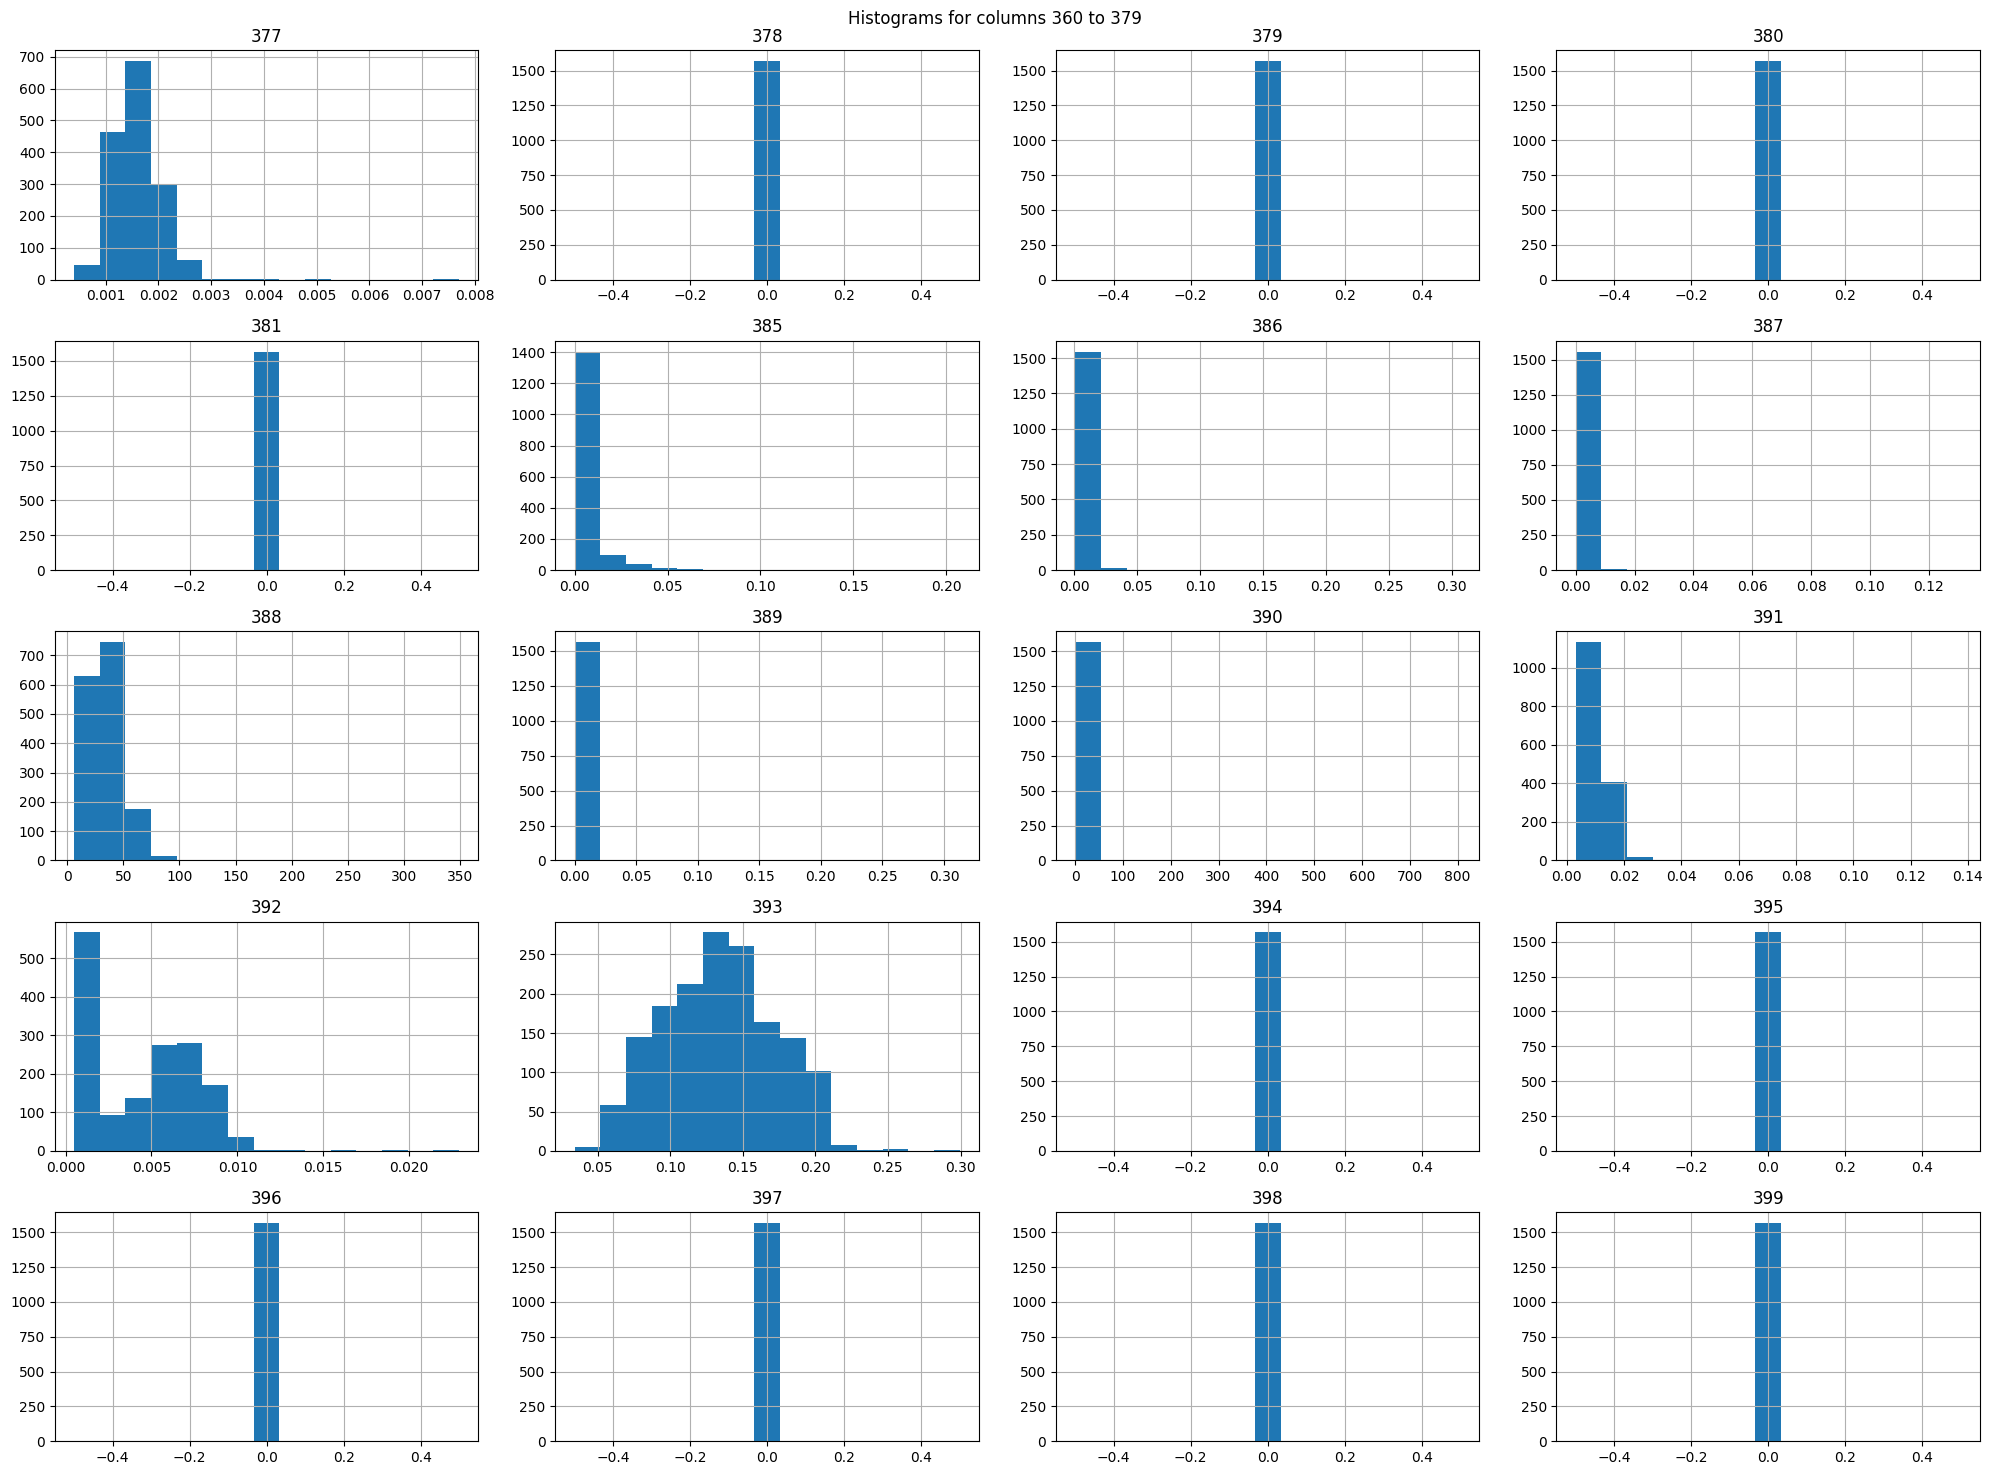

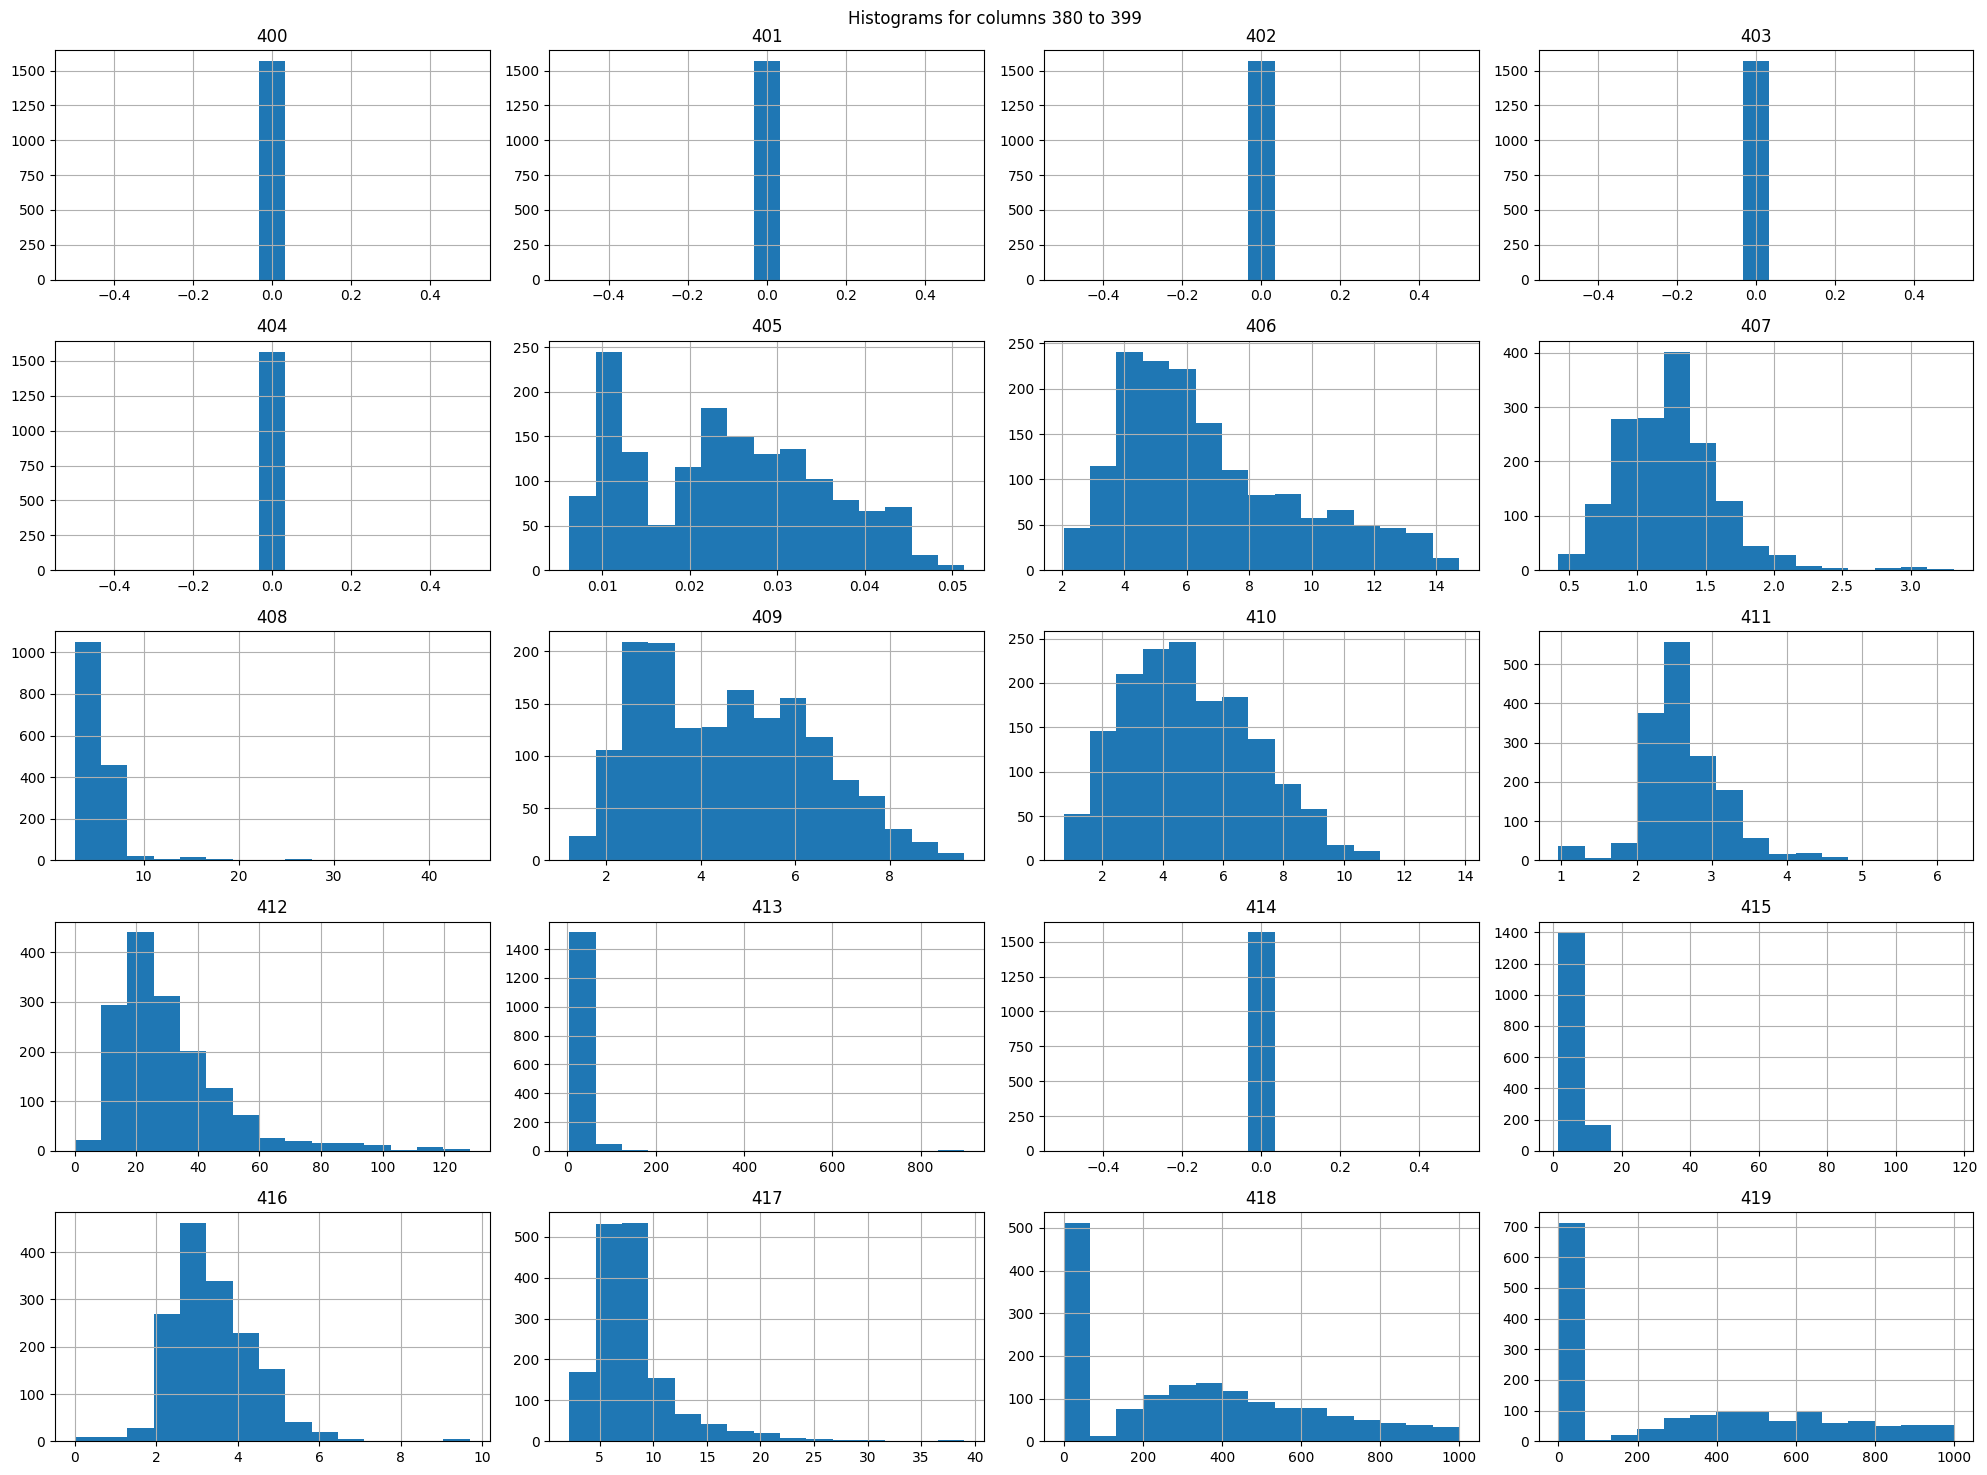

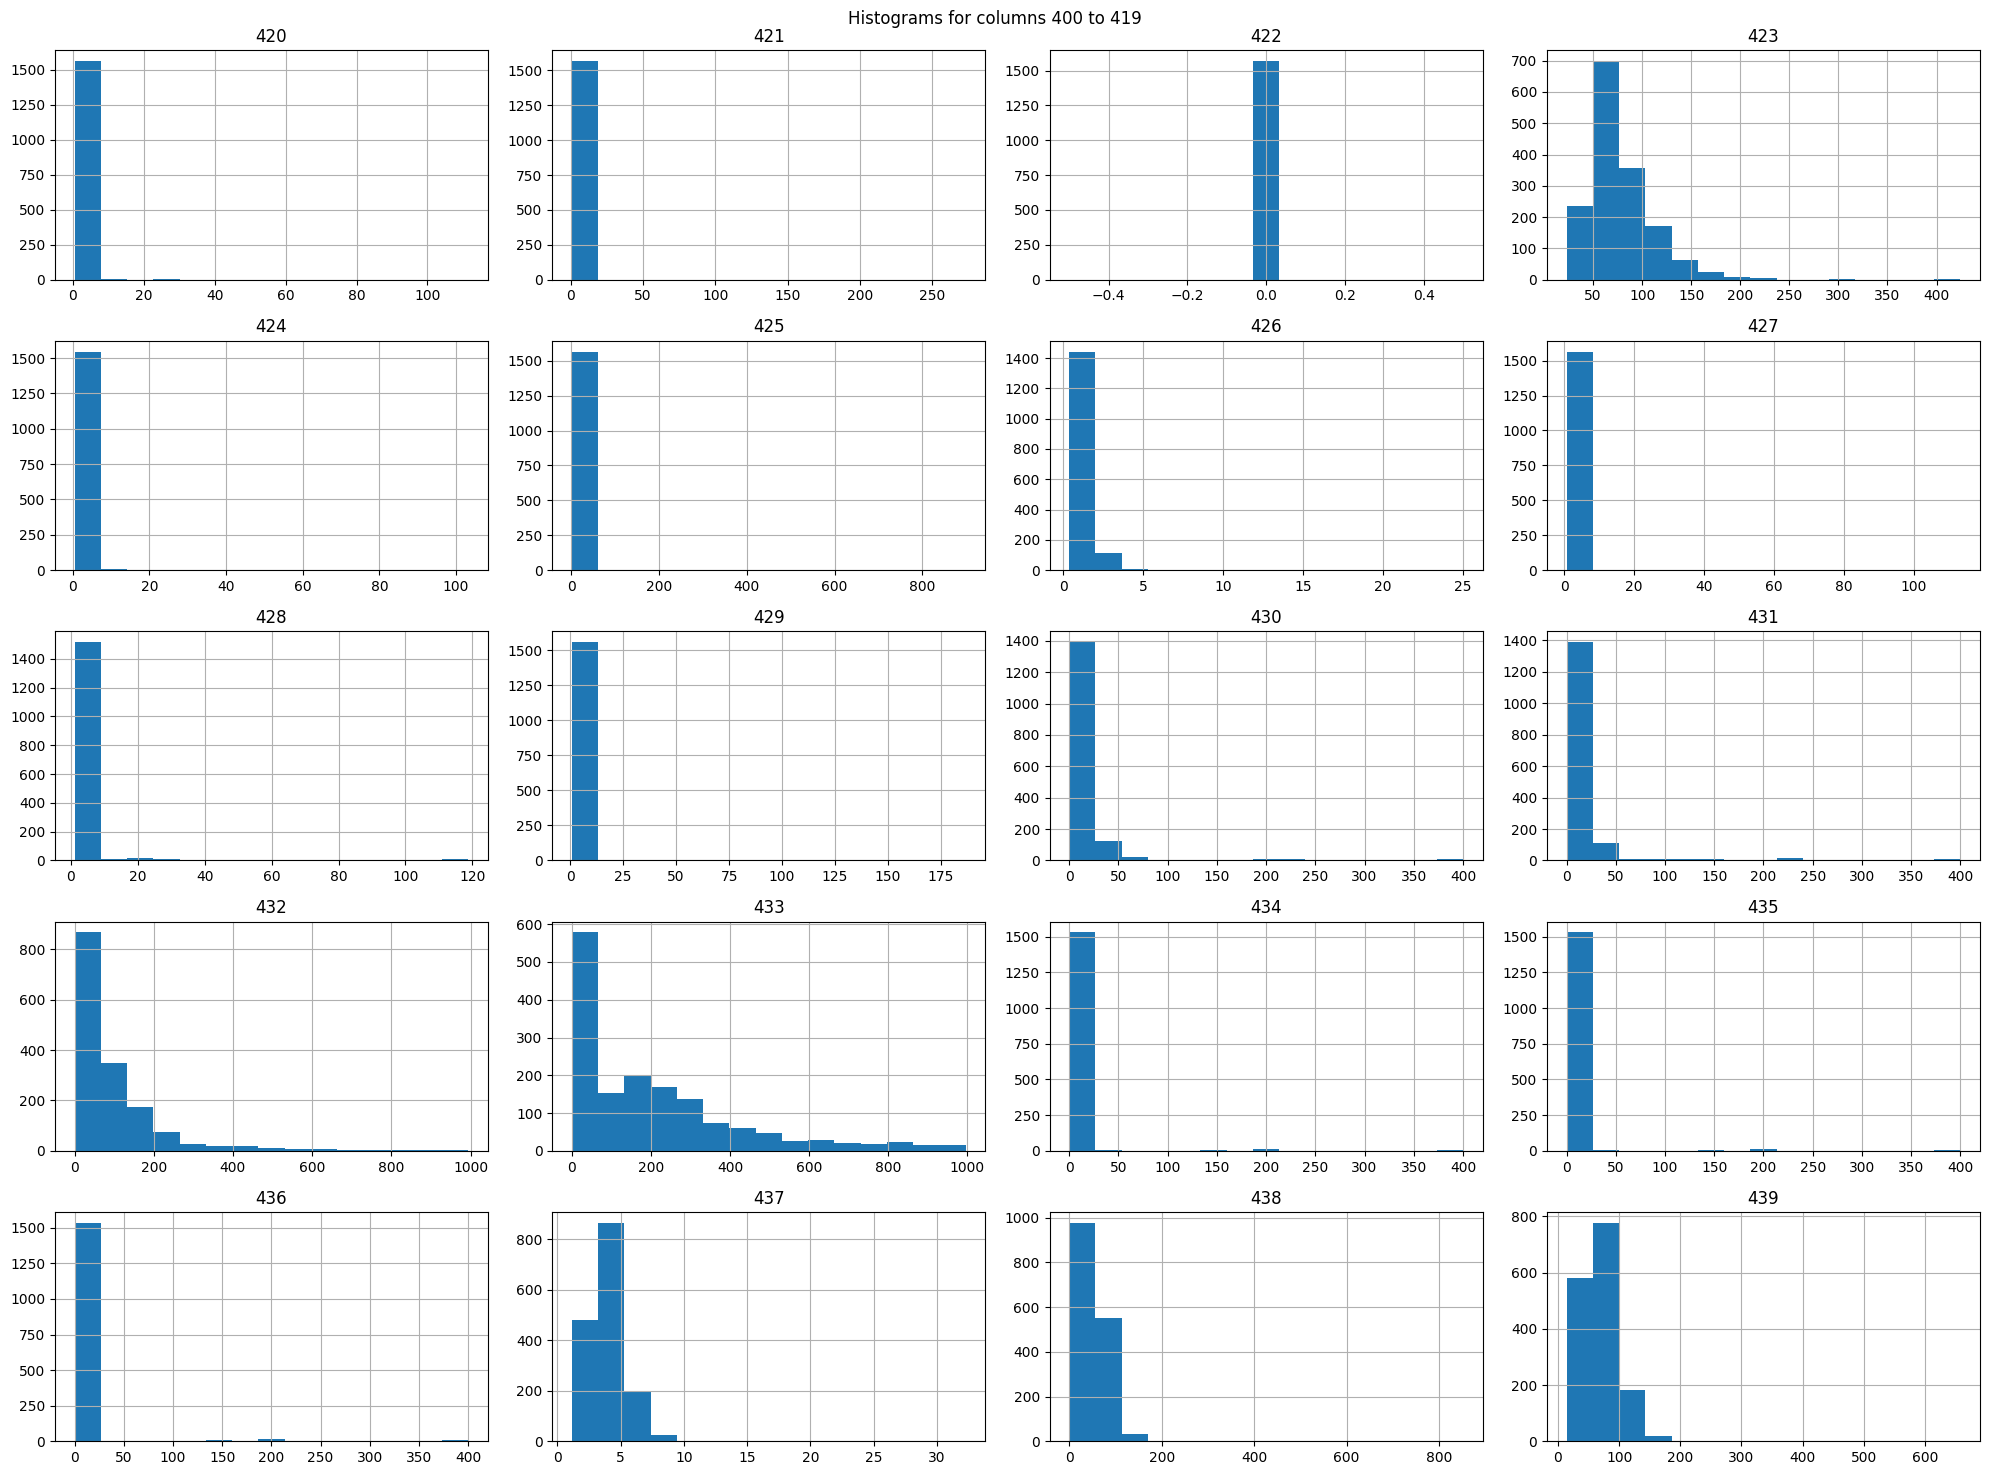

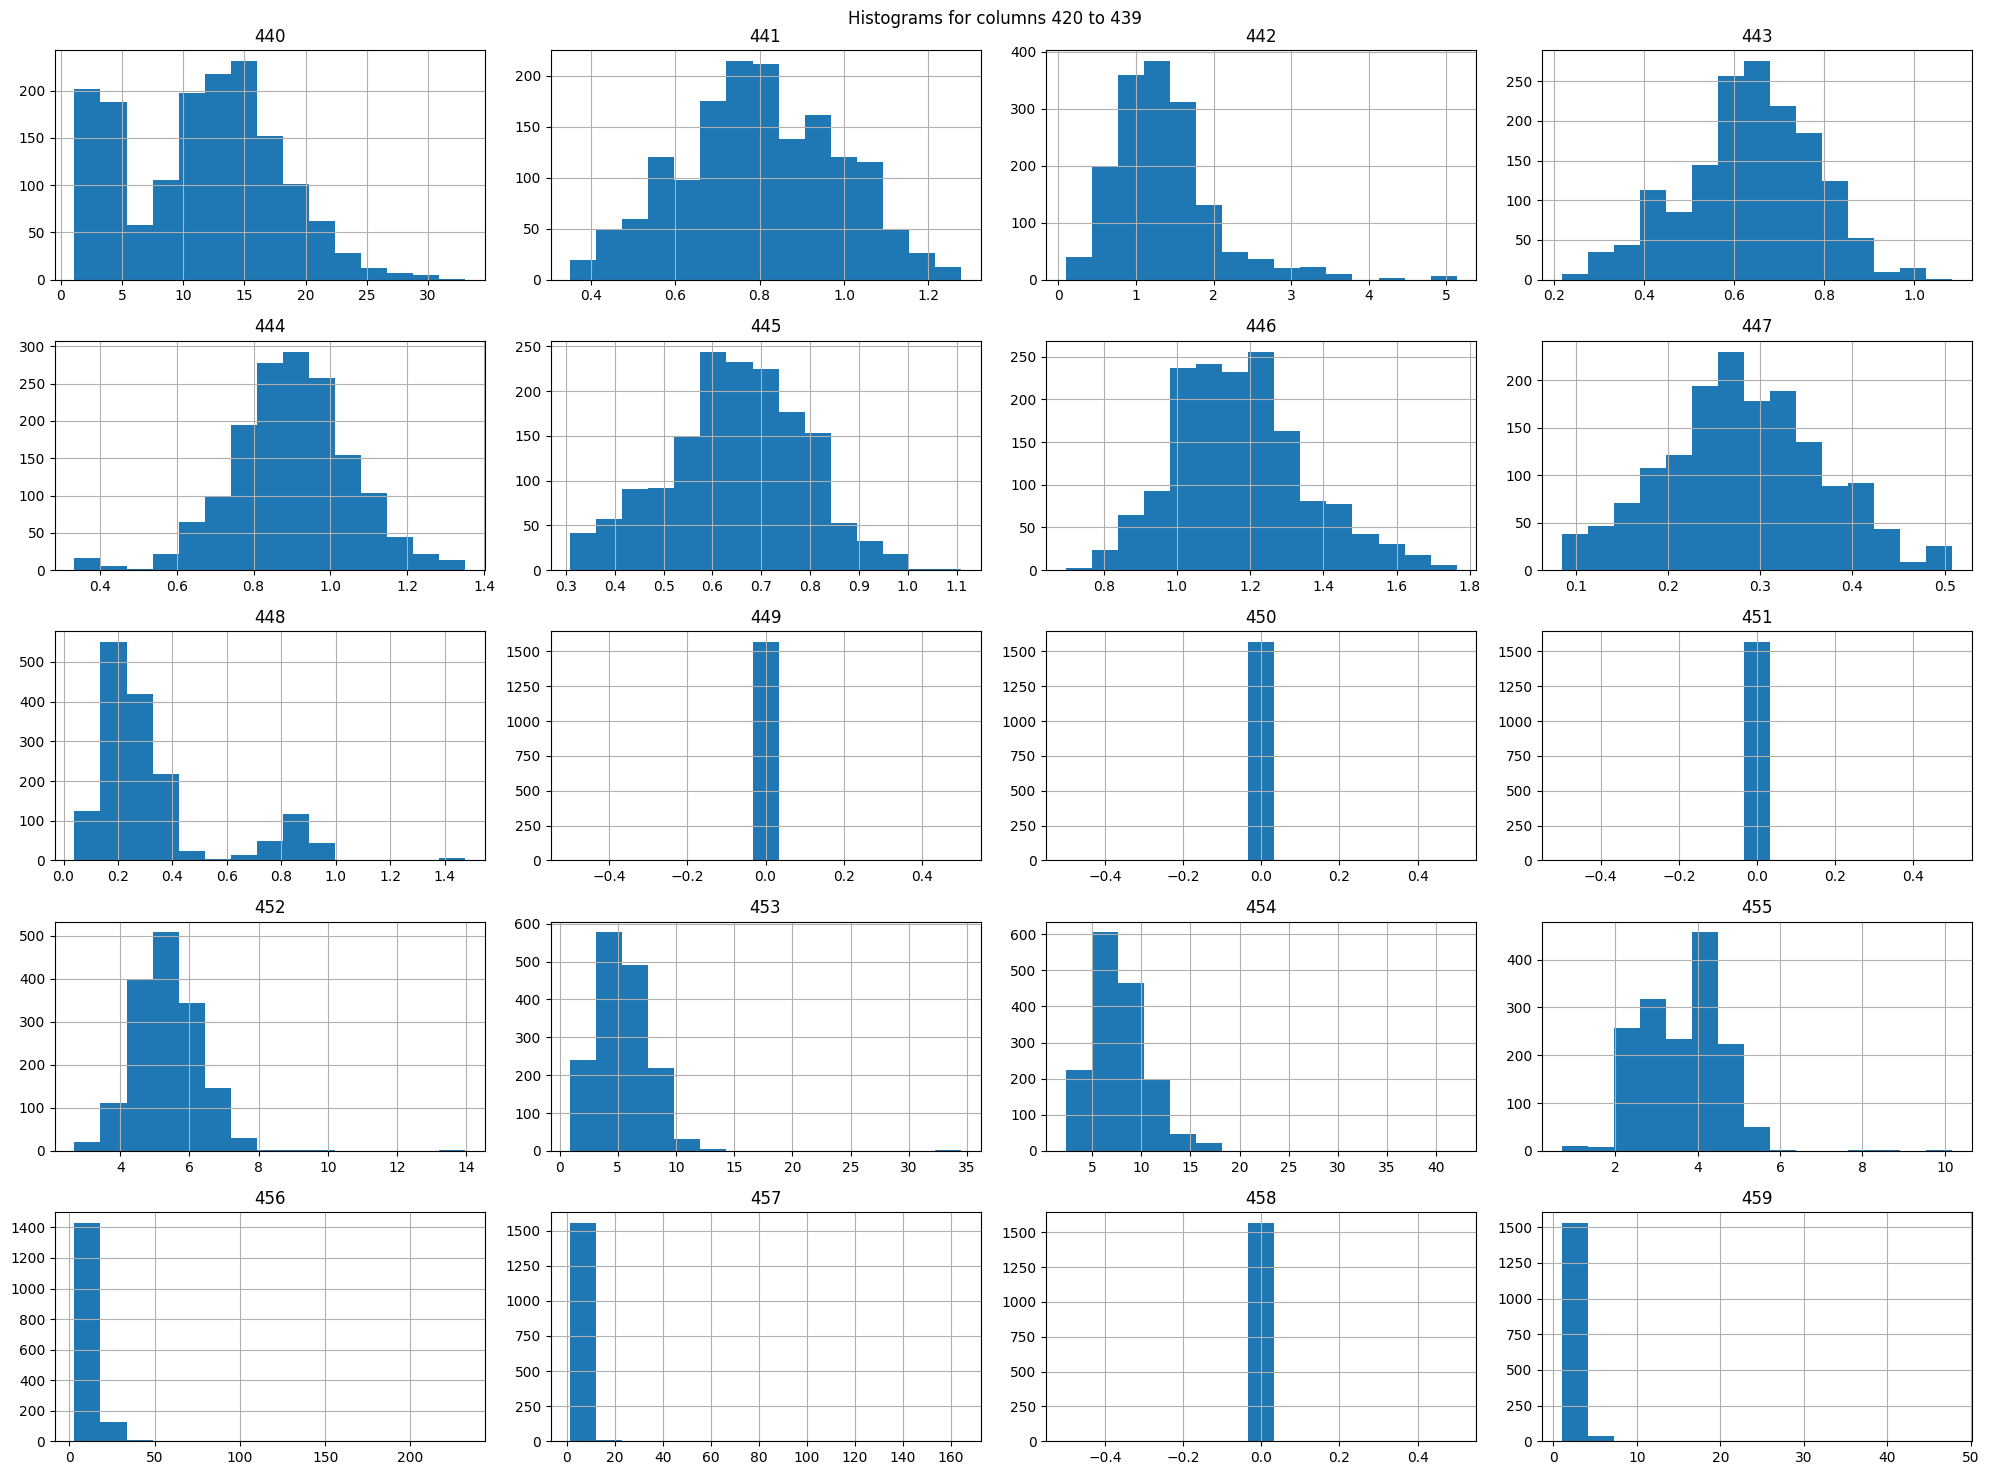

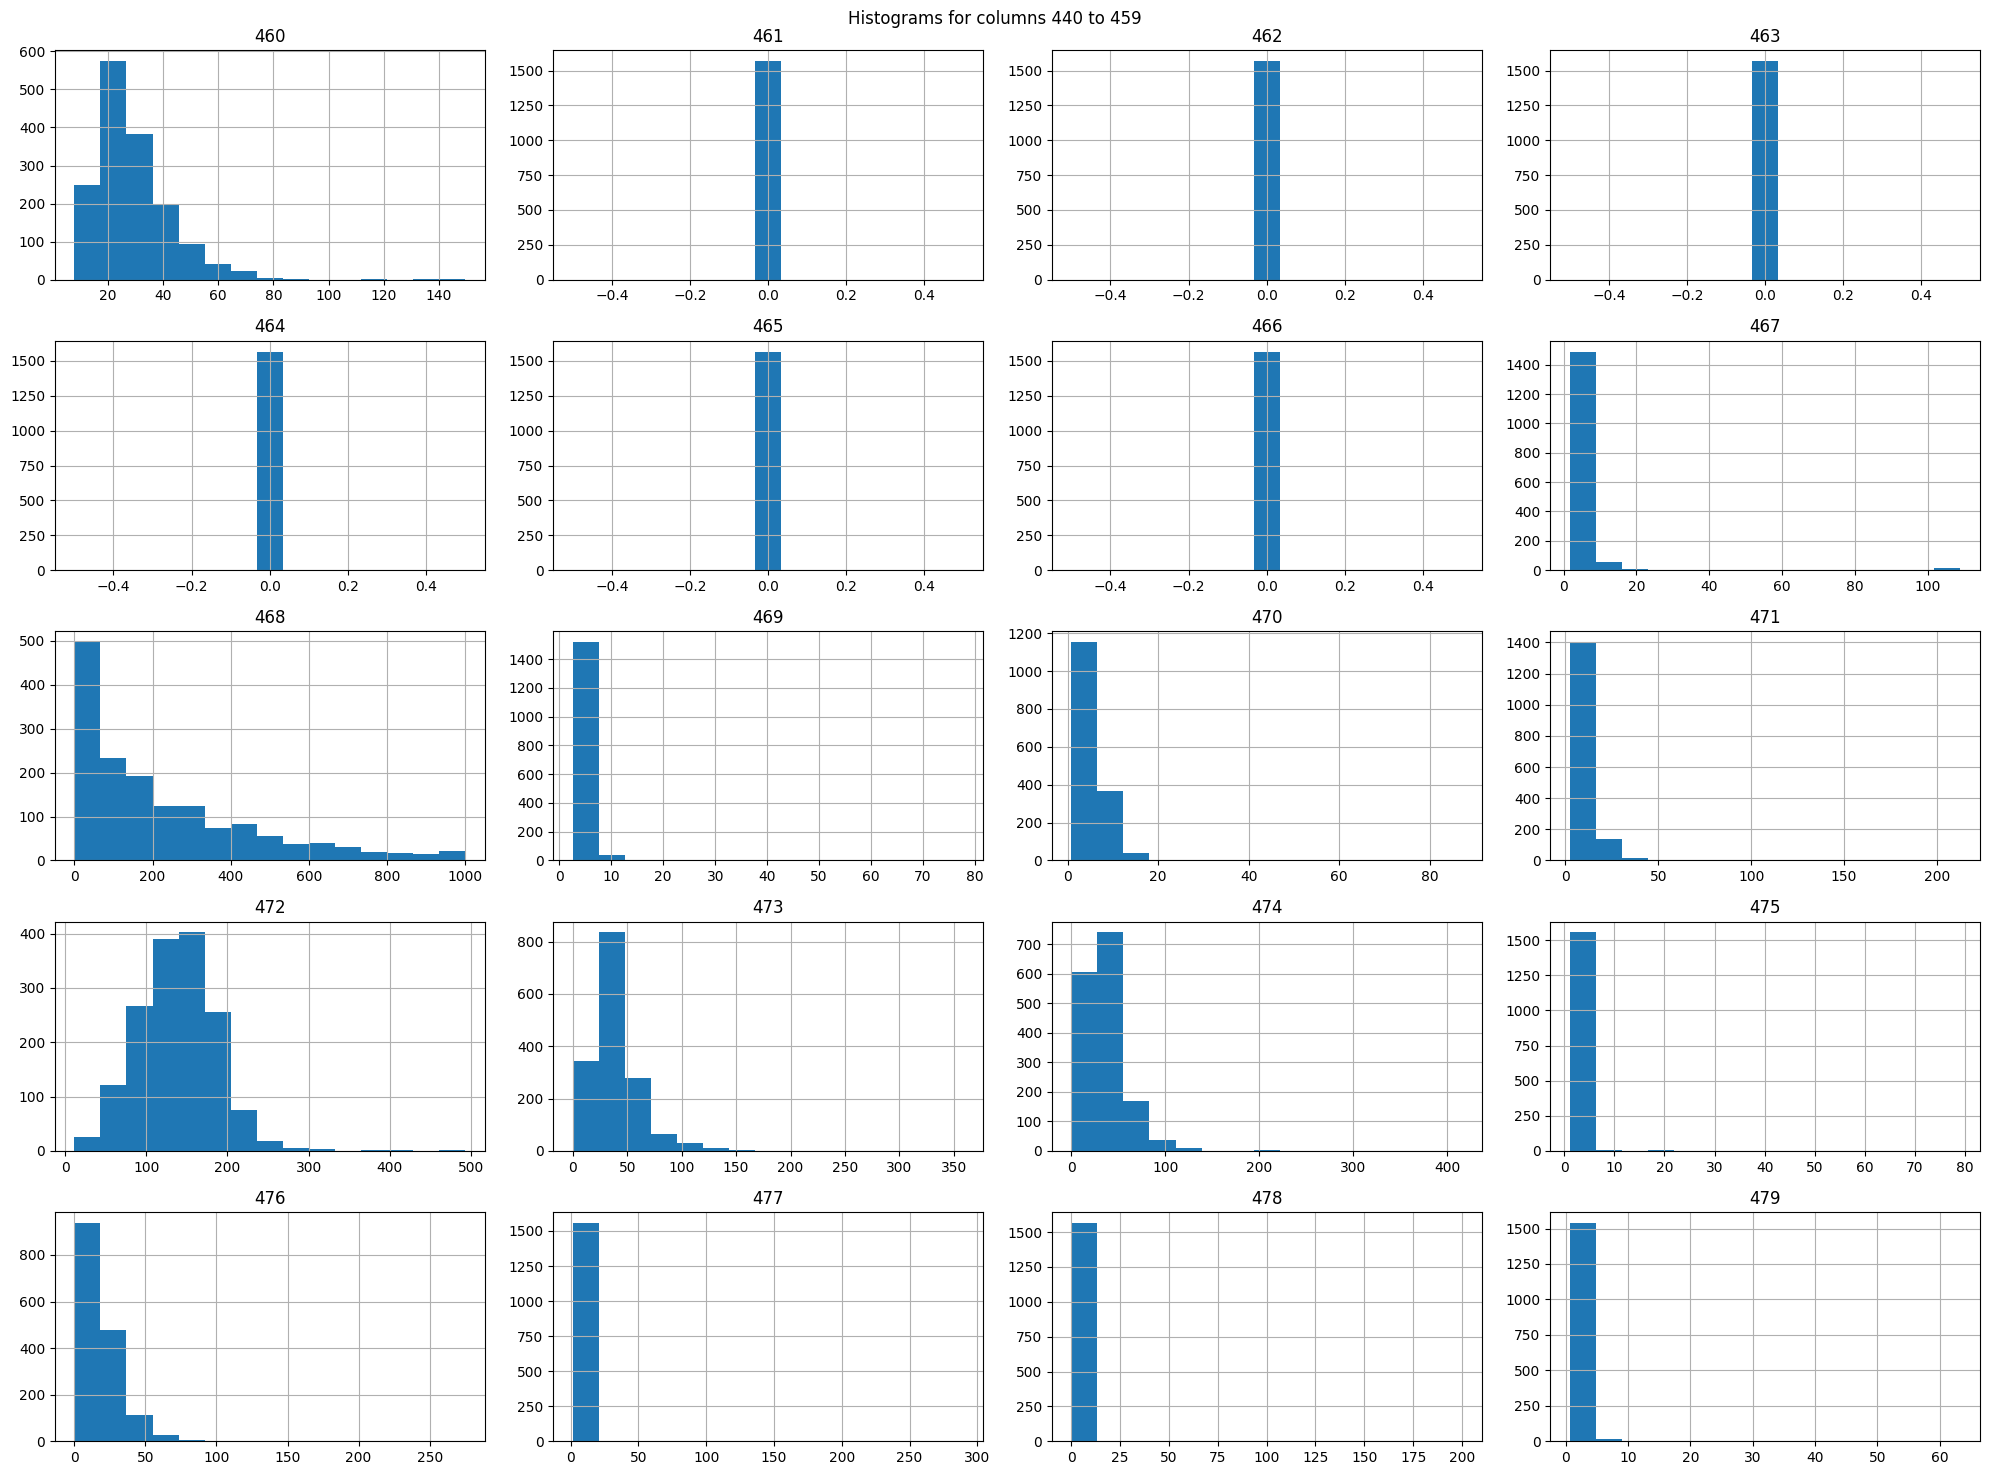

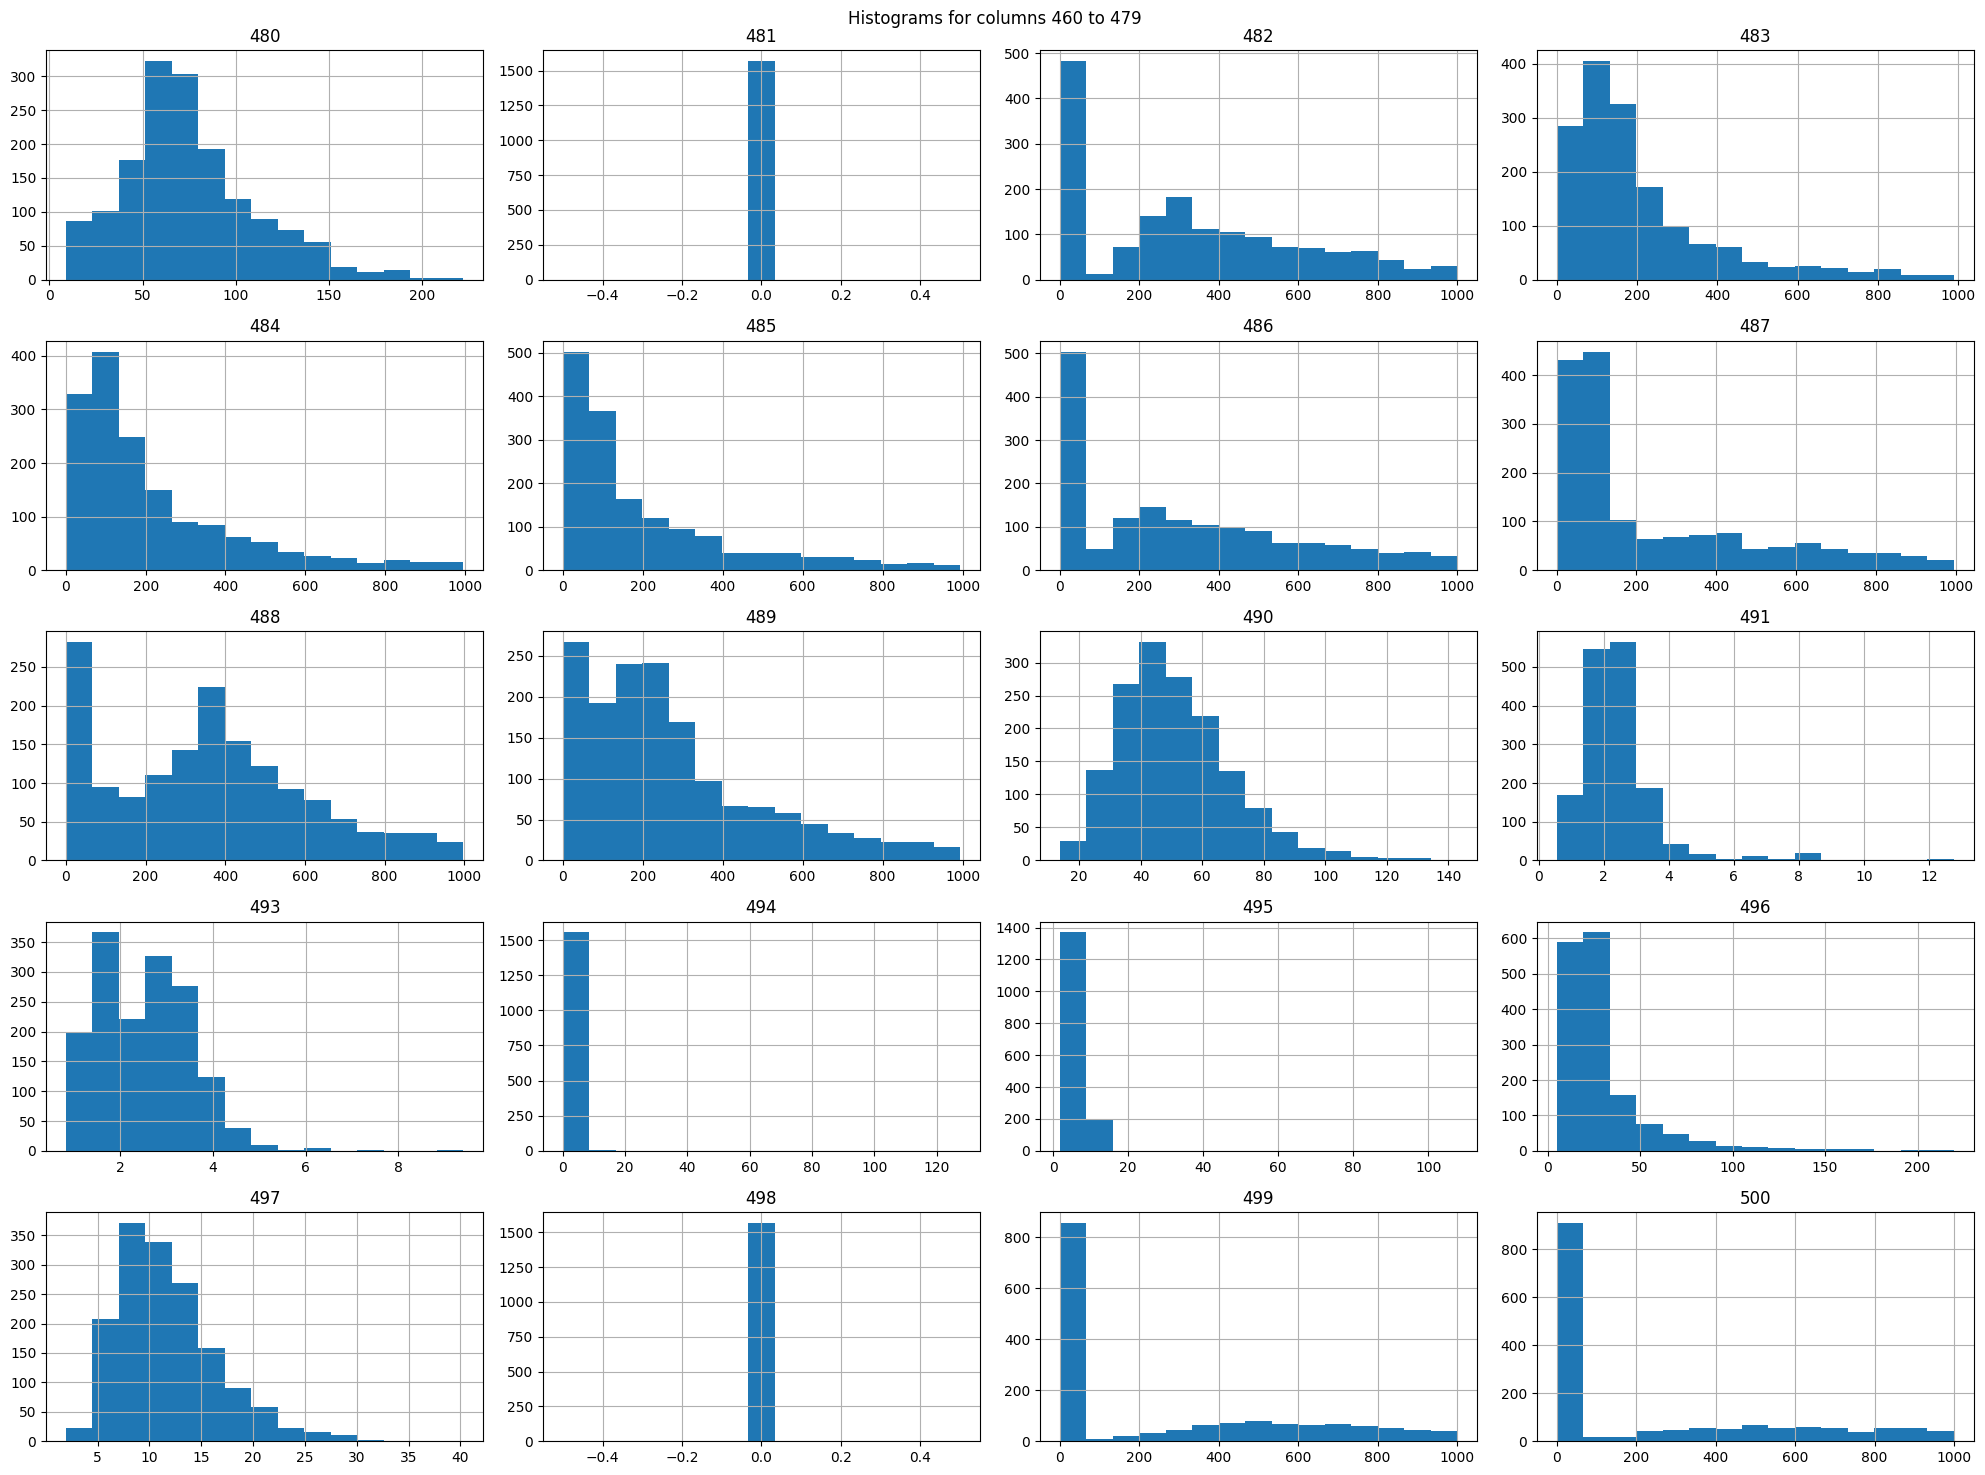

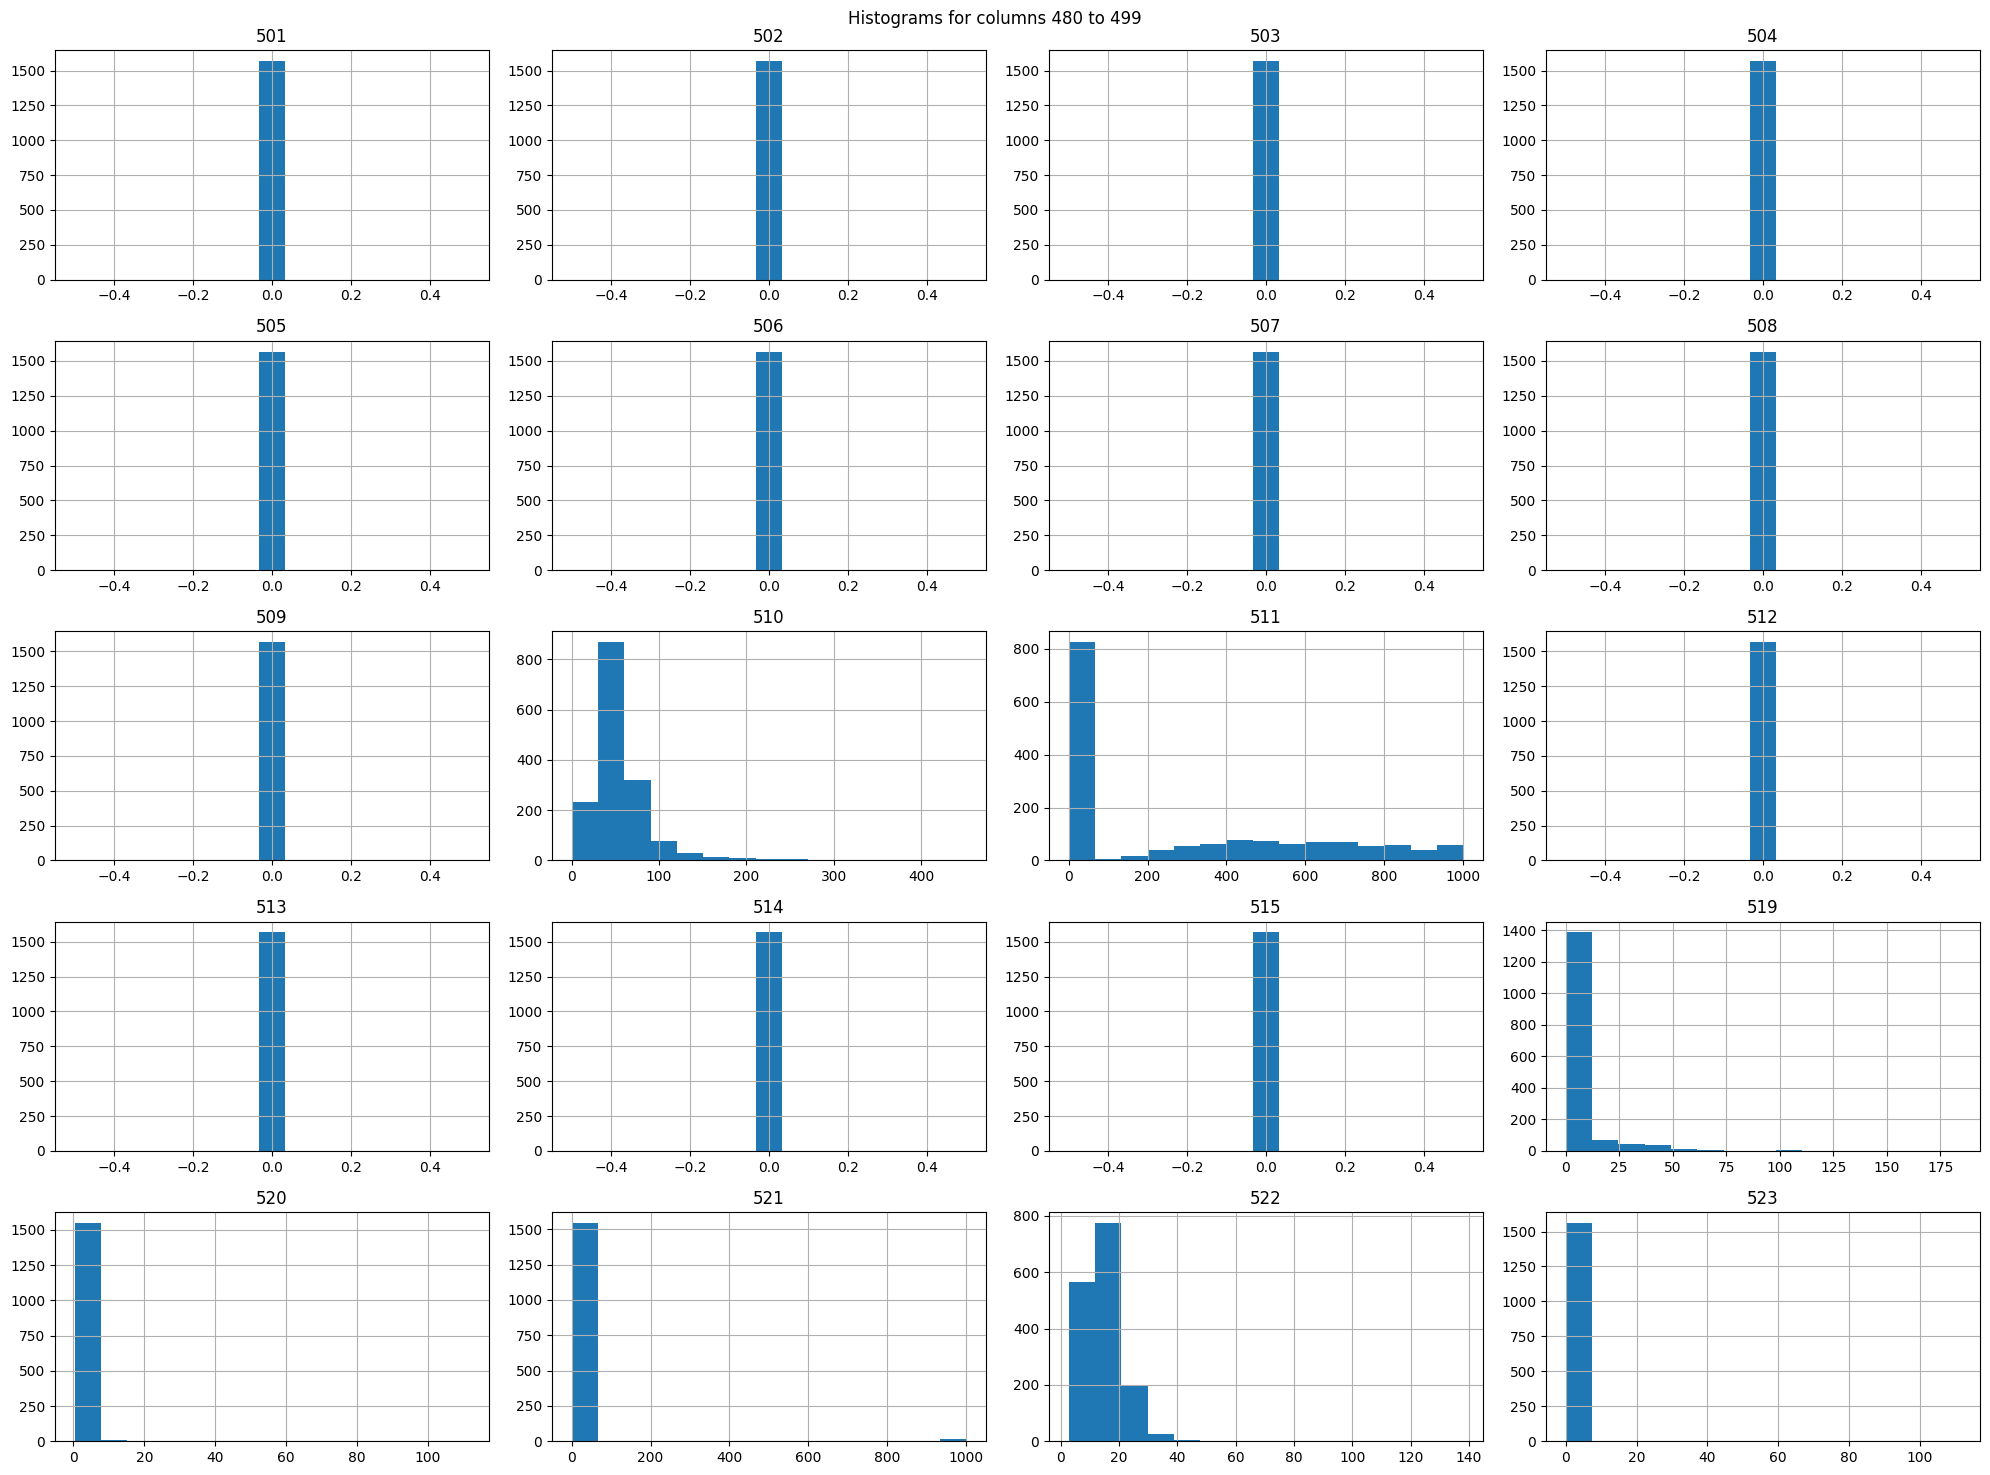

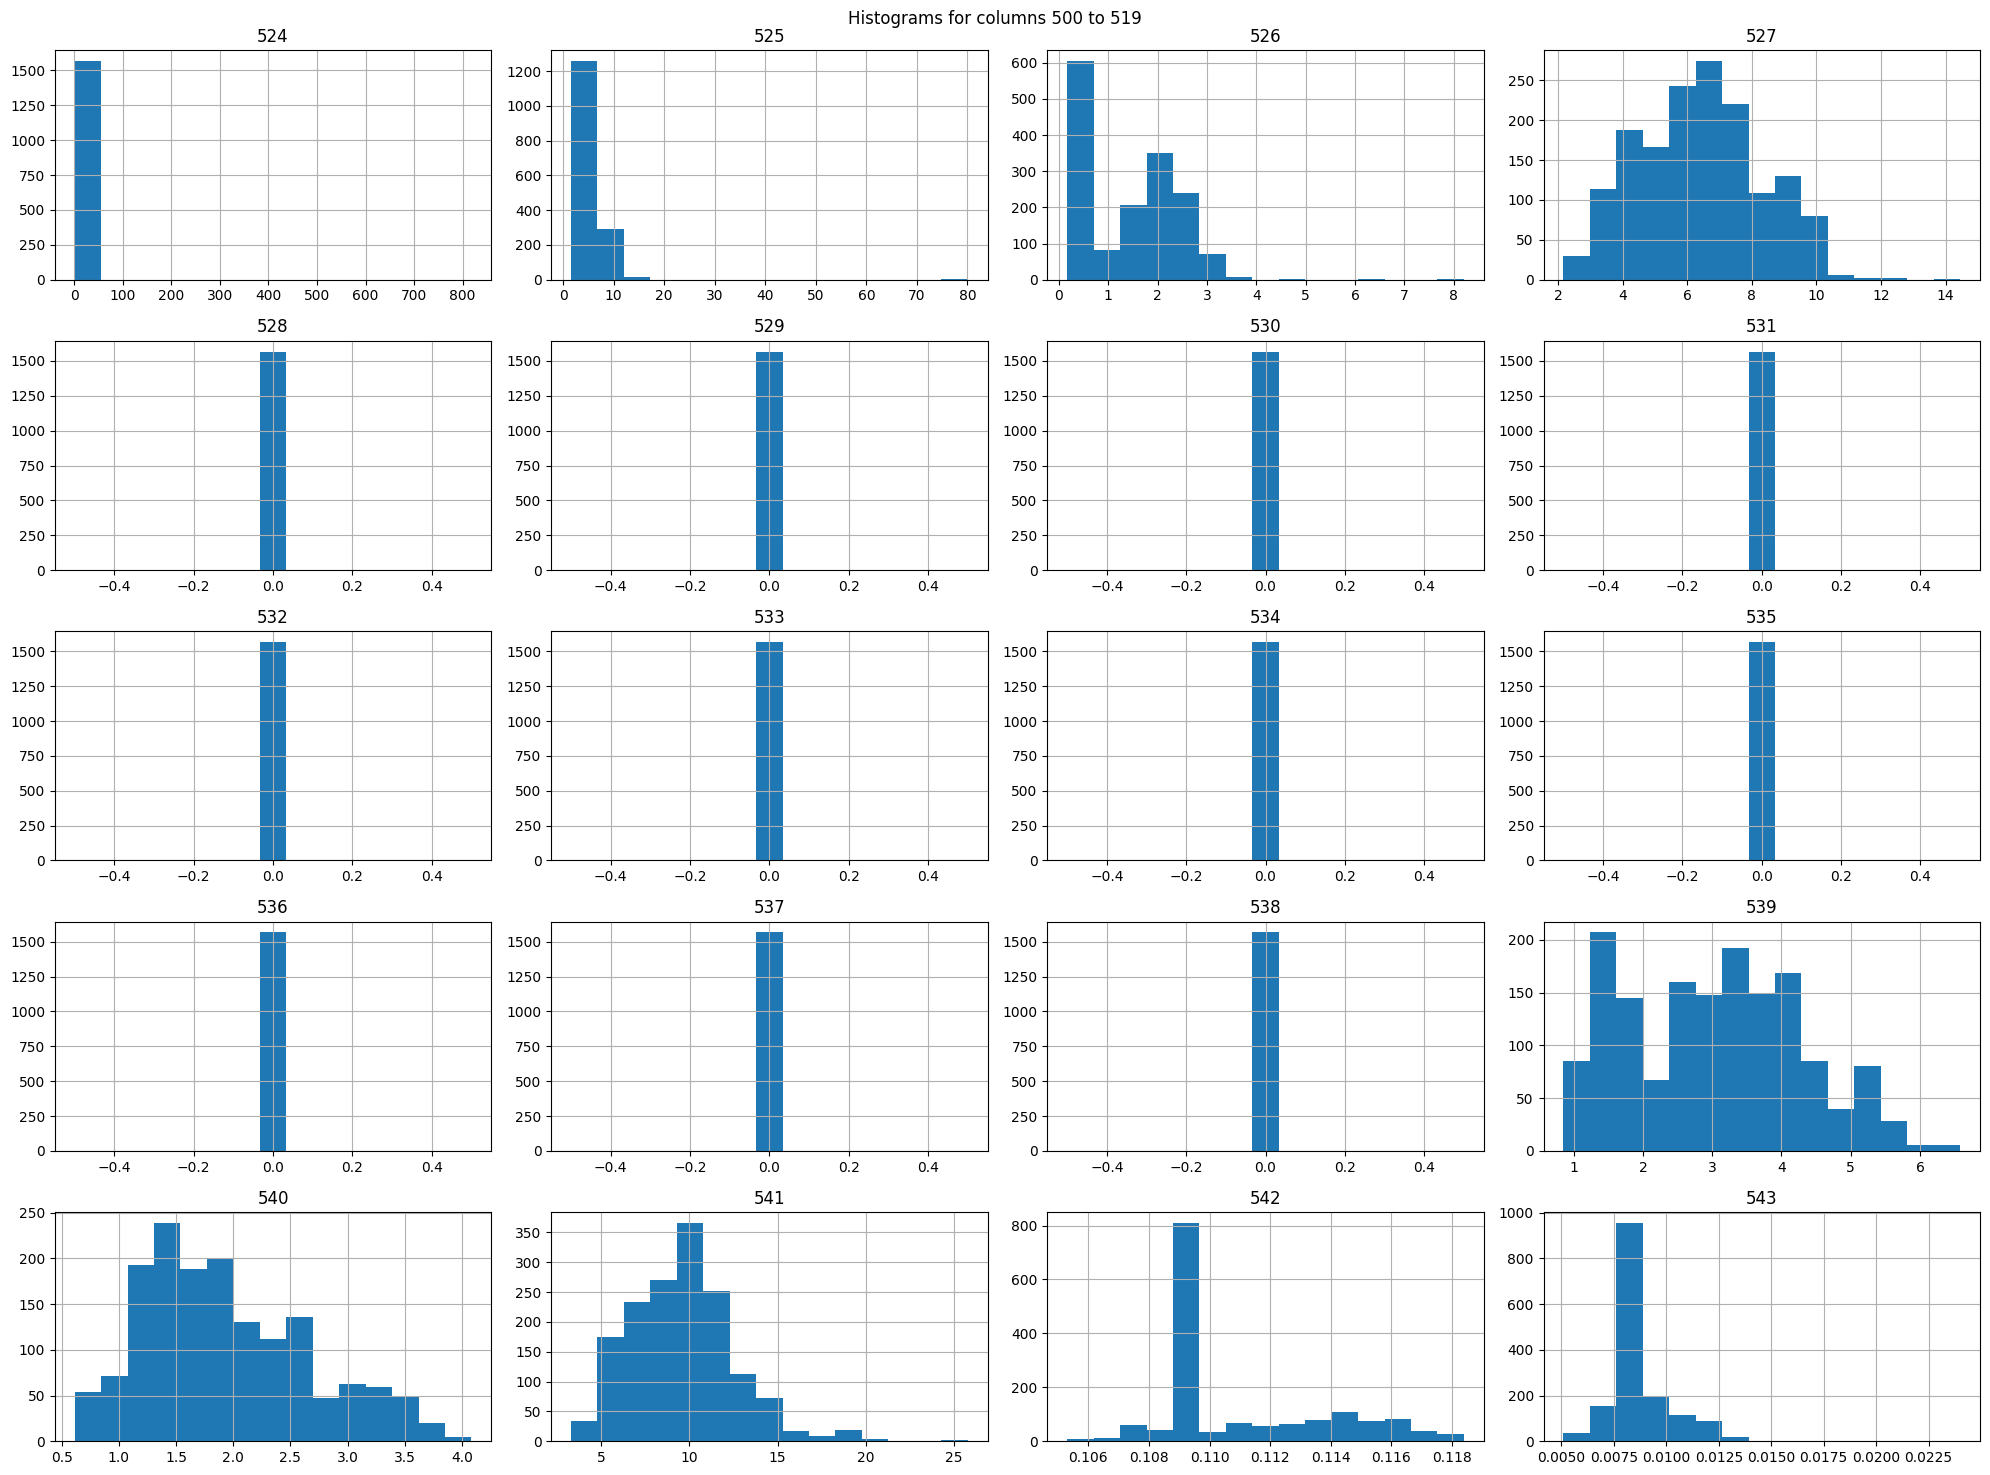

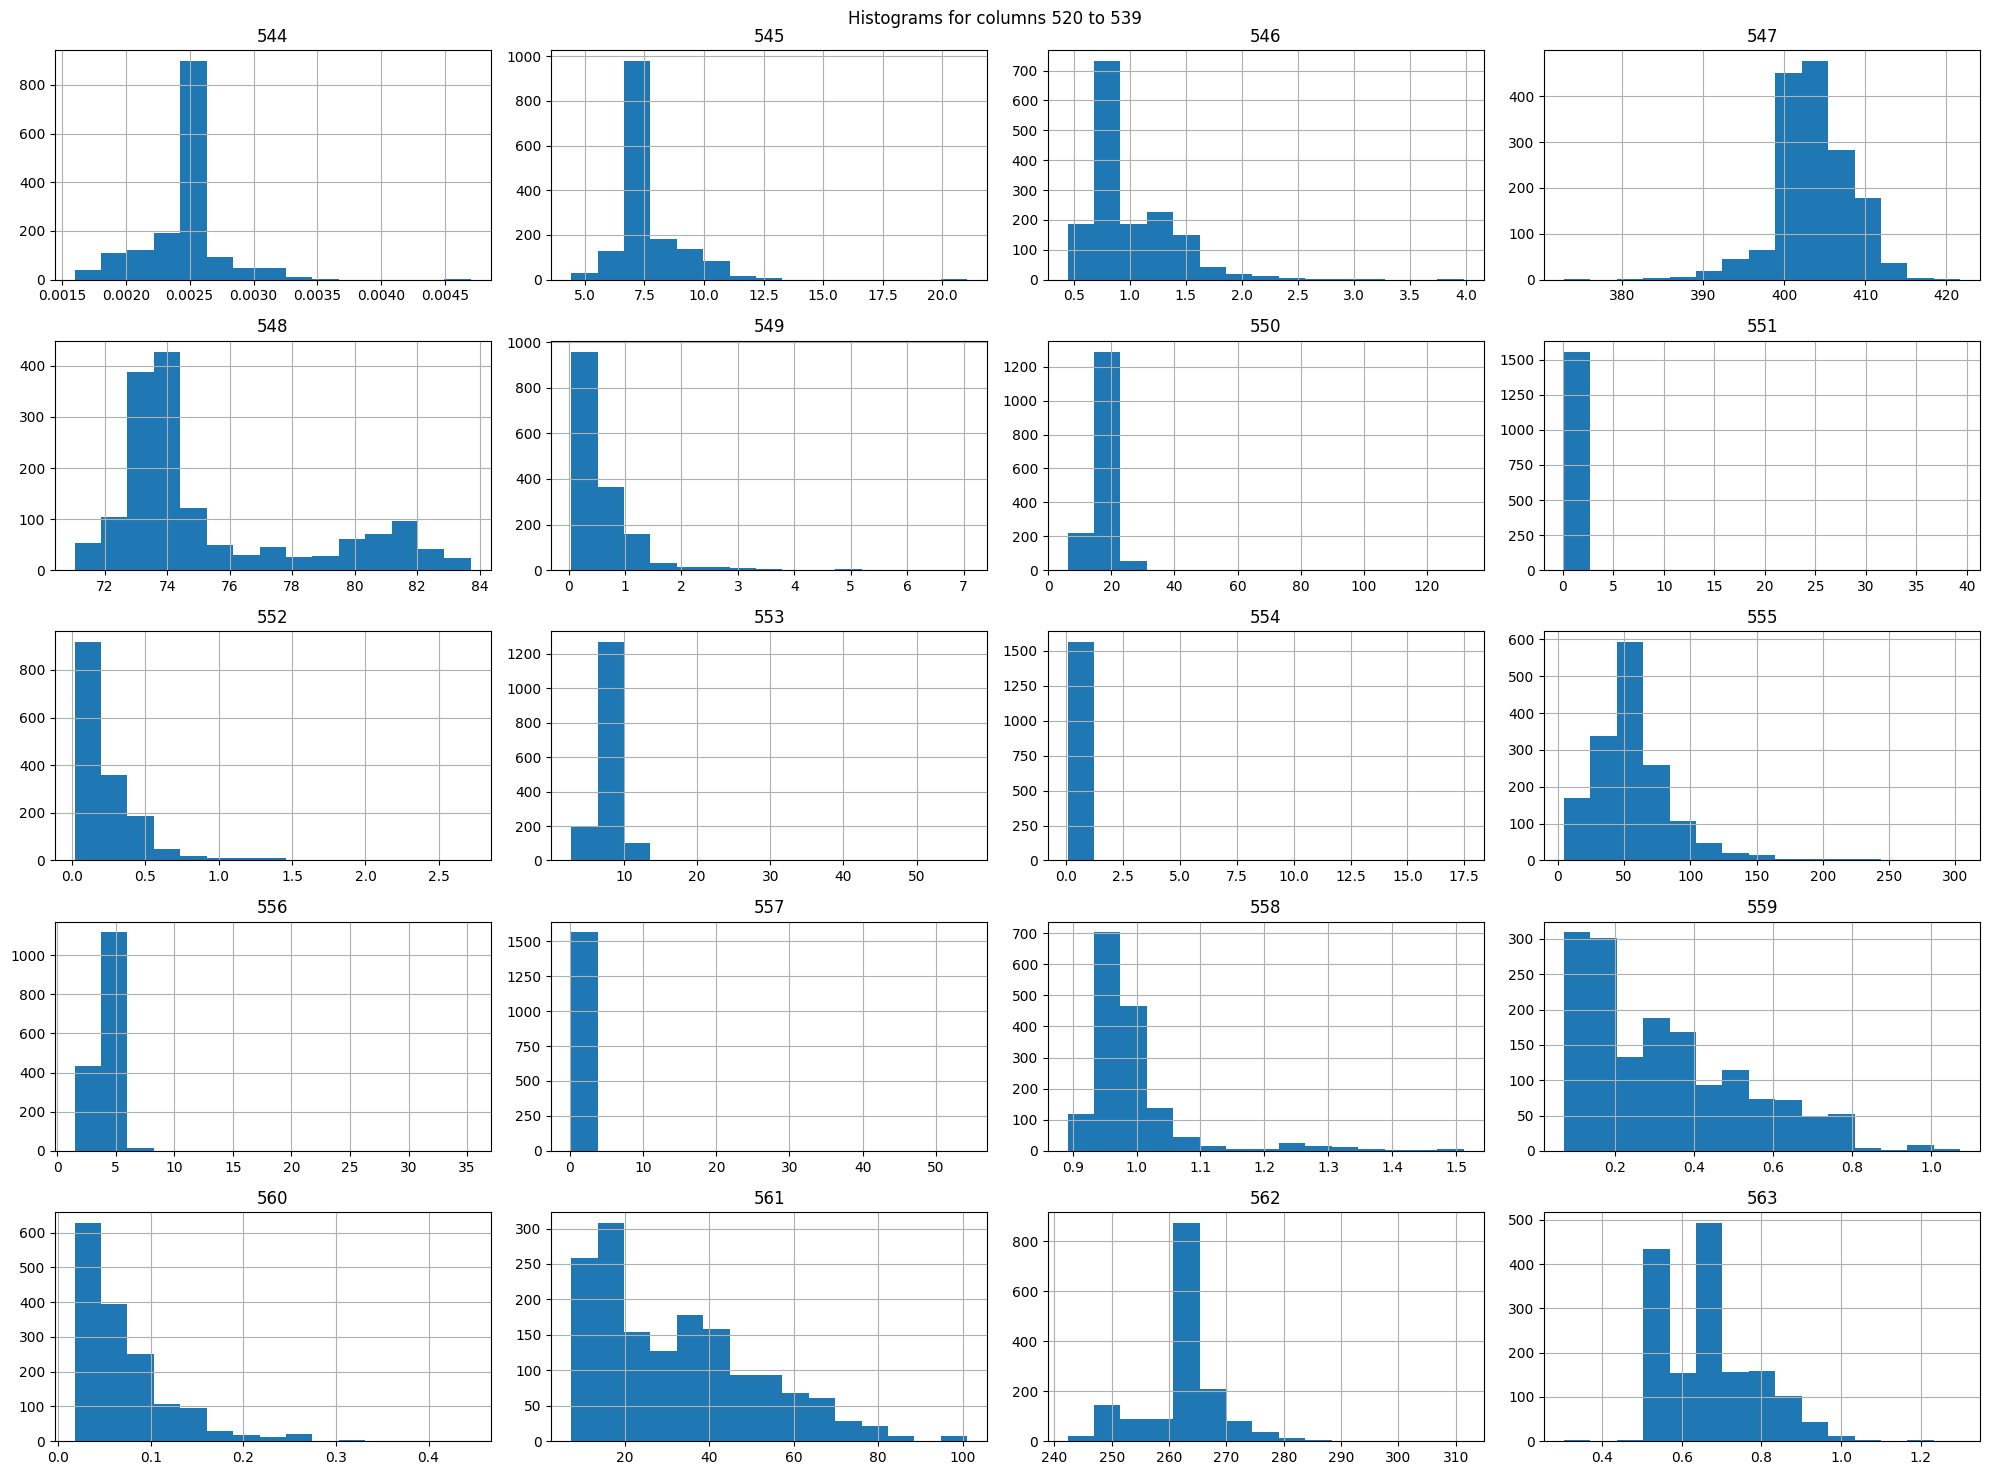

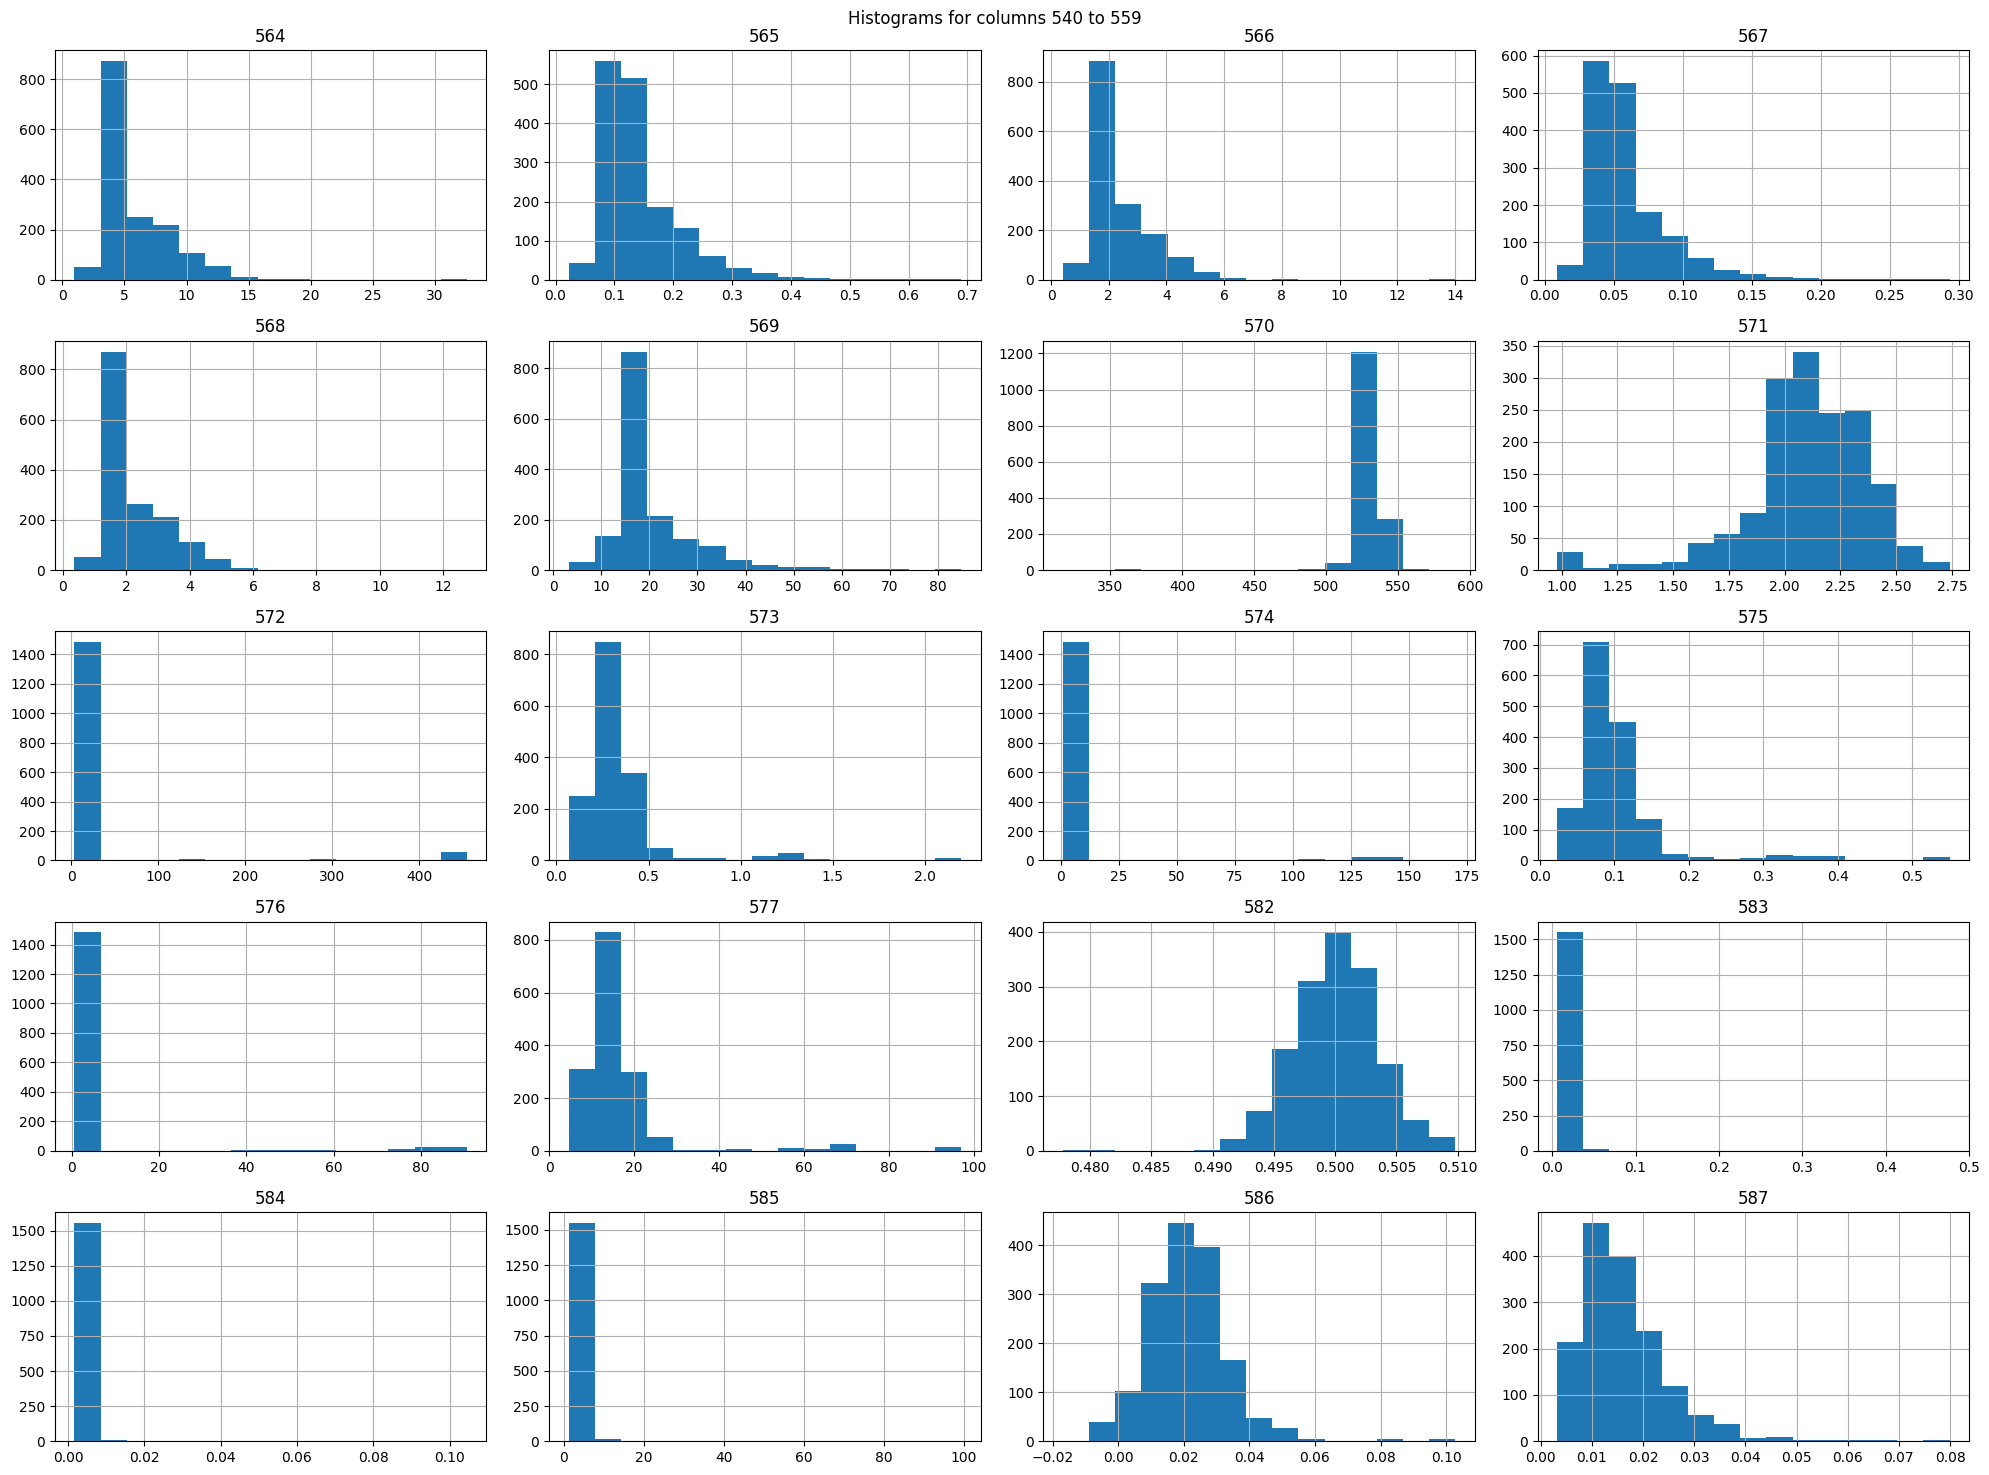

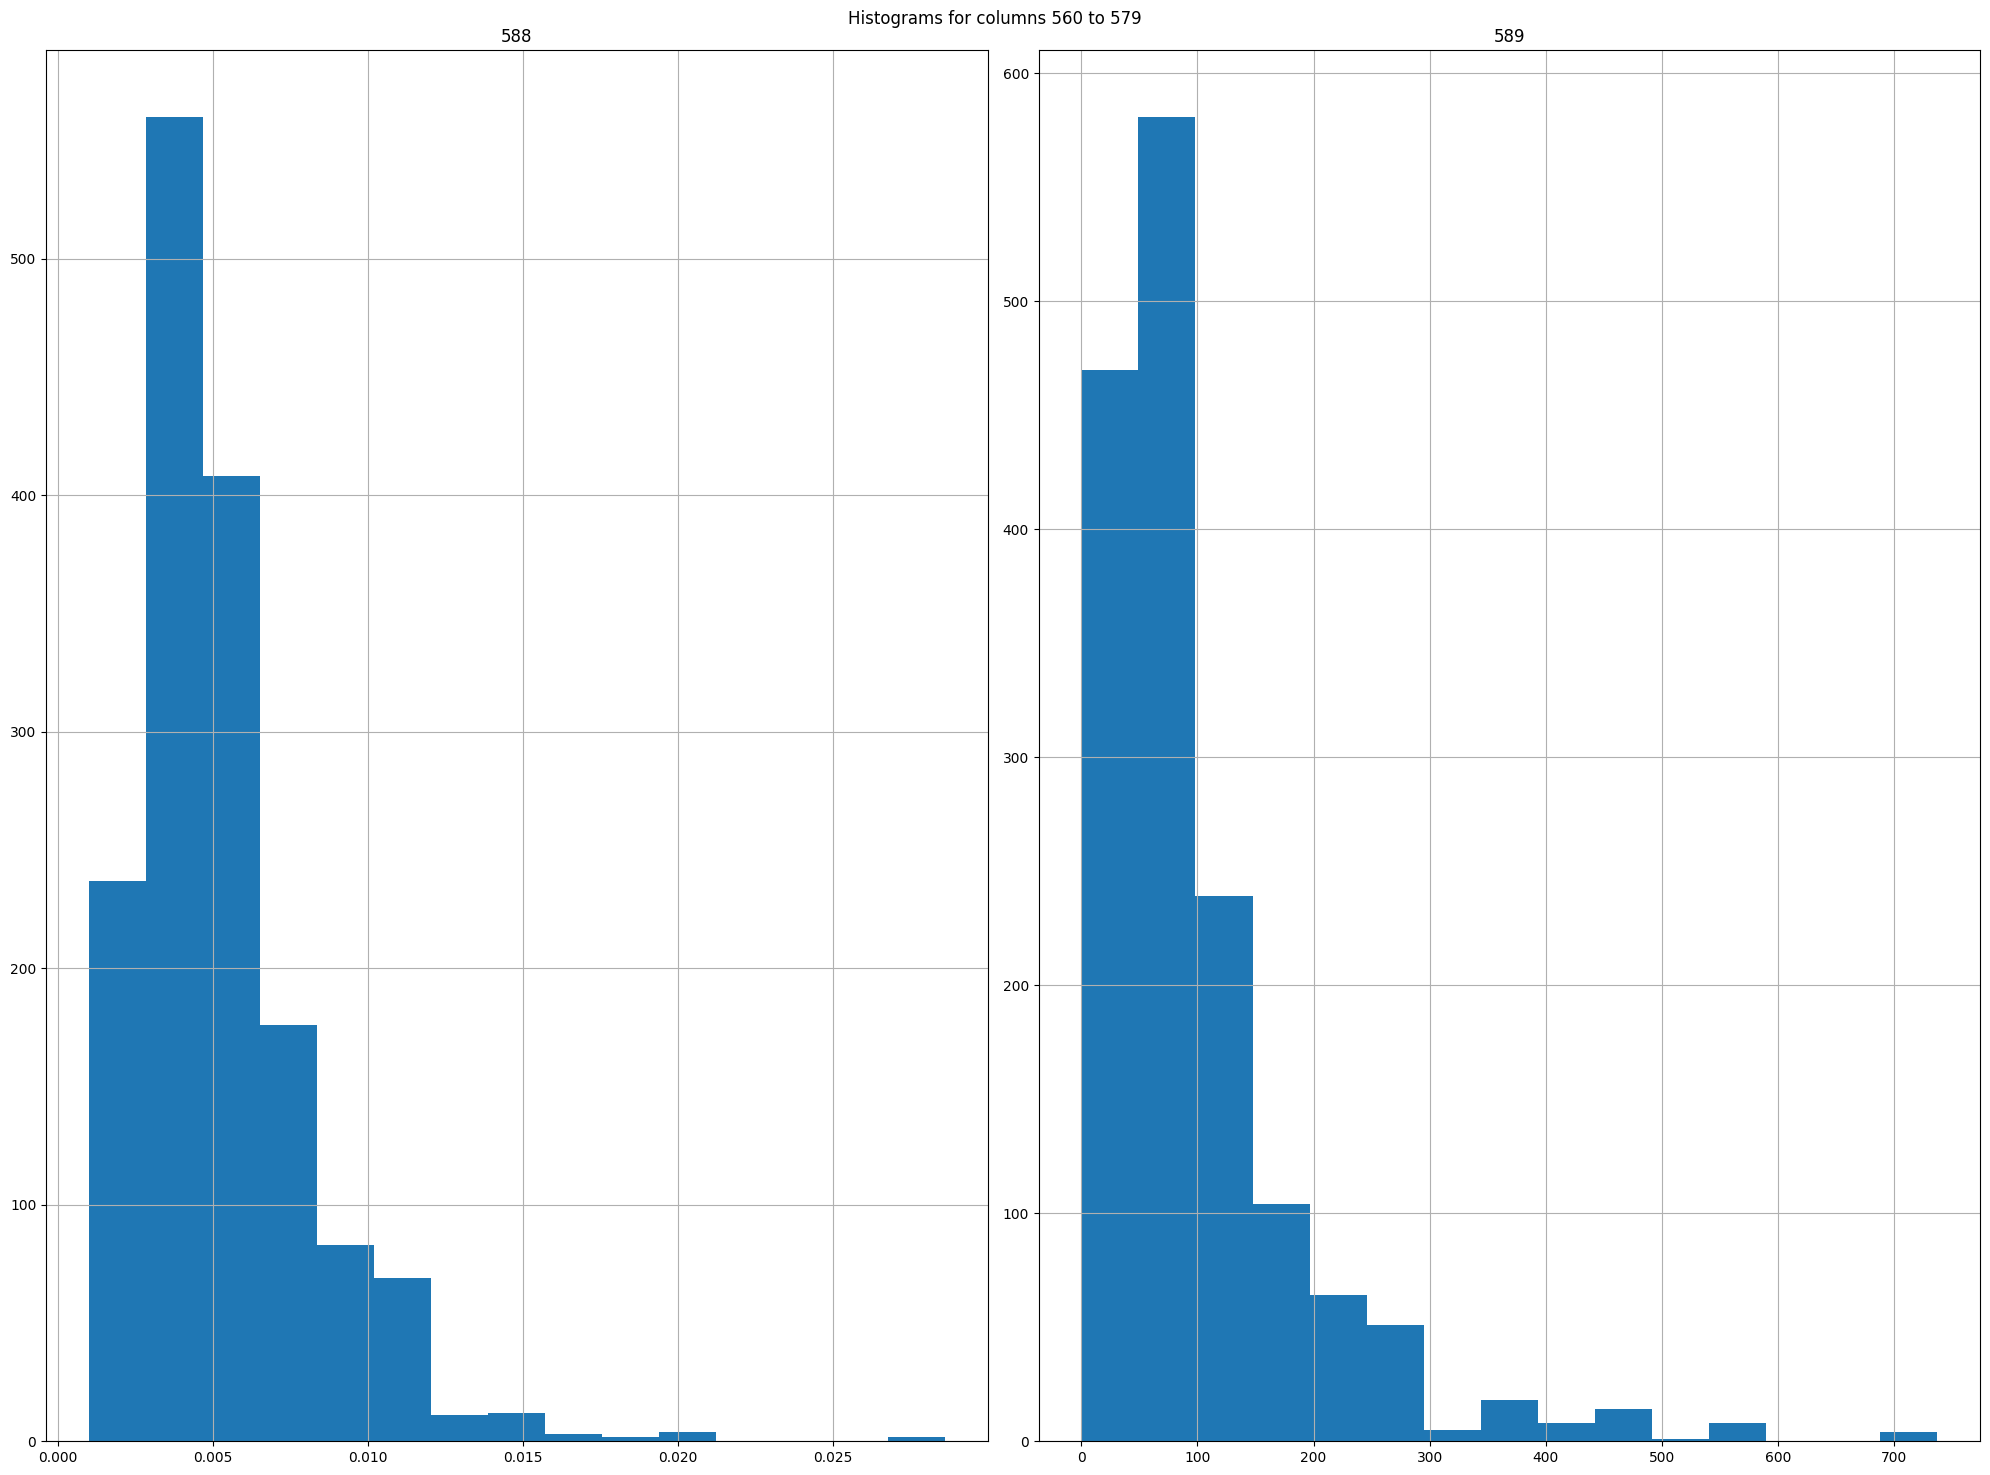

In [ ]:
# 3.2: Univariate analysis – histograms, boxplots
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms

# Divide the columns into smaller groups (chunks) to make the histograms clear and readable.
# Since there are over 500 columns, plotting all at once would look messy or crash the notebook.

def plot_histograms_in_chunks(df, chunk_size=20):
    # Select only numeric columns (skip text or labels)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Remove the target column 'Pass/Fail' if it exists
    numeric_cols = numeric_cols.drop('Pass/Fail', errors='ignore')

    # Loop through the numeric columns in small chunks of size 20
    for i in range(0, len(numeric_cols), chunk_size):
        chunk = numeric_cols[i:i + chunk_size]  # Get 20 columns at a time

        # Plot histograms for this chunk
        df[chunk].hist(figsize=(20, 15), bins=15)  # Large figure size and fewer bins for better visibility
        plt.suptitle(f'Histograms for columns {i} to {i + chunk_size - 1}')
        plt.tight_layout()
        plt.show()

# Start plotting in chunks
plot_histograms_in_chunks(df)


In [ ]:
#Shape:Normal curve, skewed, or flat
#Center:Where most values are concentrated
#Spread:How wide the values are
#Outliers:If some values are very far off

# Observations from Histograms (Columns 0 to 19)

# Columns 0, 1, 2, 8, 9, 10, 14, 18 show a bell-shaped or nearly normal distribution.
# These are good for modeling and don’t need much preprocessing.

# Column 3 is right-skewed with a few very high values (possible outliers).
# Might need log or square root transformation.

# Columns 4, 5, 13, 15, 17 have extremely low variation — most values are the same.
# These columns may not add useful information and can be dropped or ignored in modeling.

# Column 6 is roughly normal but slightly skewed. Still usable.

# Column 7 is highly right-skewed and compressed in a small range (0.1 to 0.13).
# May need scaling or transformation.

# Column 11 and 17 are tightly packed near 1.00 — low variance.
# Could be considered for removal if they don’t impact performance.

# Column 12 has low variation but not completely constant.

# Column 16 is sharply peaked near the left — low variation and possible skew.

# Column 19 has high concentration around 12.5 — not much spread.

#  Summary:
# - Keep: 0, 1, 2, 6, 8, 9, 10, 14, 18
# - Consider transforming: 3
# - Consider dropping (very low variance): 4, 5, 11, 13, 15, 17, 19

''' columns_to_drop = [
    4, 5, 7, 11, 13, 15, 16, 17, 19, 26, 27, 31, 32, 33, 34, 35, 36, 41, 42, 49, 52, 53, 54, 59,
    62, 63, 67, 69, 74, 87, 89, 97, 99, 101, 104, 112, 114, 116, 117, 135, 140, 141, 142, 147, 148,
    149, 151, 152, 153, 154, 155, 156, 164, 165, 167, 178, 179, 184, 185, 186, 187, 189, 190, 191,
    192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 213, 222,
    223, 224, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 248, 249,
    251, 252, 253, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 270, 275, 276, 277, 282,
    283, 284, 286, 287, 288, 289, 290, 291, 299, 300, 302, 313, 314, 315, 320, 321, 322, 323, 325,
    326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 347,
    351, 360, 361, 362, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 385, 386, 387,
    389, 390, 391, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 413, 414, 415, 420, 421,
    422, 424, 425, 426, 427, 428, 429, 430, 431, 434, 435, 436, 449, 450, 451, 456, 457, 458, 459,
    461, 462, 463, 464, 465, 466, 467, 469, 470, 471, 475, 477, 478, 479, 481, 494, 495, 498, 501,
    502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 519, 520, 521, 523, 524, 525, 528,
    529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 551, 554, 557, 572, 574, 576, 583, 584, 585
]
'''

# From the histograms find columns to transform/scale based on skewness

' columns_to_drop = [\n    4, 5, 7, 11, 13, 15, 16, 17, 19, 26, 27, 31, 32, 33, 34, 35, 36, 41, 42, 49, 52, 53, 54, 59,\n    62, 63, 67, 69, 74, 87, 89, 97, 99, 101, 104, 112, 114, 116, 117, 135, 140, 141, 142, 147, 148,\n    149, 151, 152, 153, 154, 155, 156, 164, 165, 167, 178, 179, 184, 185, 186, 187, 189, 190, 191,\n    192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 213, 222,\n    223, 224, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 248, 249,\n    251, 252, 253, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 270, 275, 276, 277, 282,\n    283, 284, 286, 287, 288, 289, 290, 291, 299, 300, 302, 313, 314, 315, 320, 321, 322, 323, 325,\n    326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 347,\n    351, 360, 361, 362, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 385, 386, 387,\n    389, 390, 391, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 413,

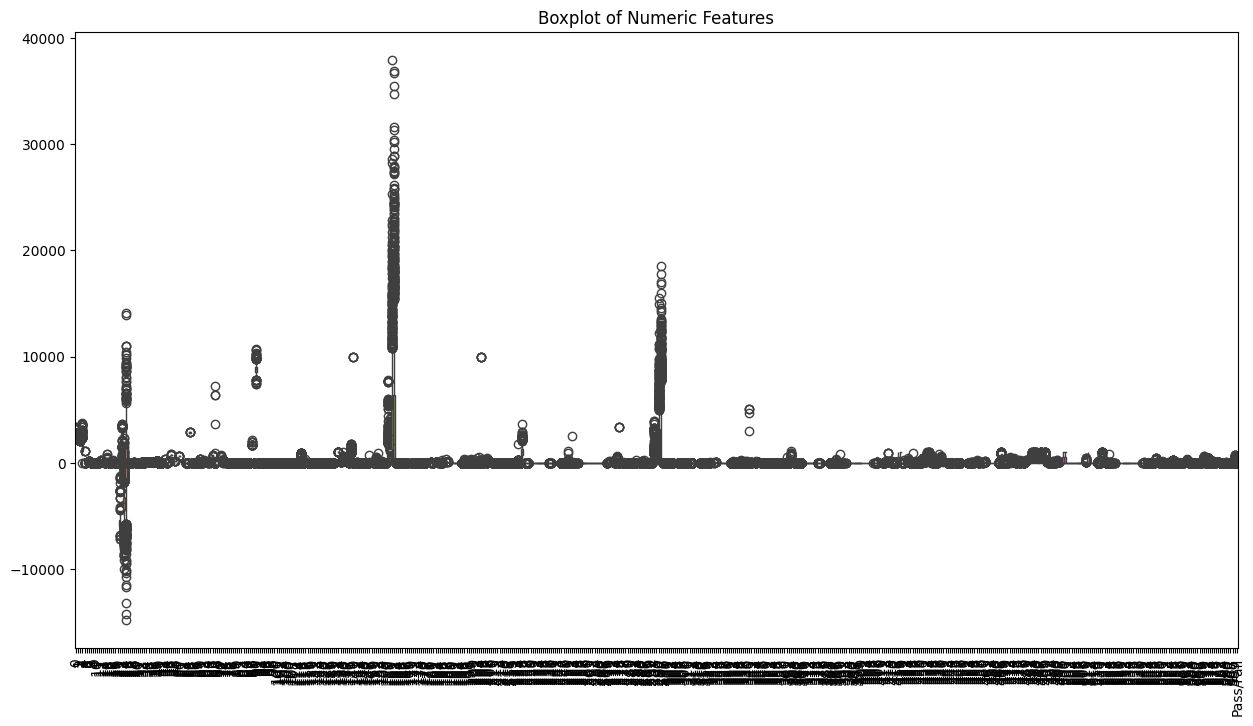

In [ ]:
# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()

In [ ]:
# Boxplot of Numeric Features

# Each vertical line here represents one numeric column in the dataset.

# The box shows the middle 50% of the data (called the interquartile range or IQR).
# The line inside the box is the median (middle value of the column).

# The "whiskers" (lines outside the box) show the range of values within 1.5 * IQR from the box.
# Any dots or circles outside the whiskers are outliers — these are values that are much higher or lower than the rest.

#   Observations:
# - Many columns have a large number of outliers (black circles), especially a few with values going over 30,000–40,000.
# - Some features are very spread out, while others are tightly packed (small boxes).
# - Some boxes are not centered, suggesting the data might be skewed (not symmetric).
# - Because the scale of values is very different across columns, scaling or normalization might be needed before modeling.

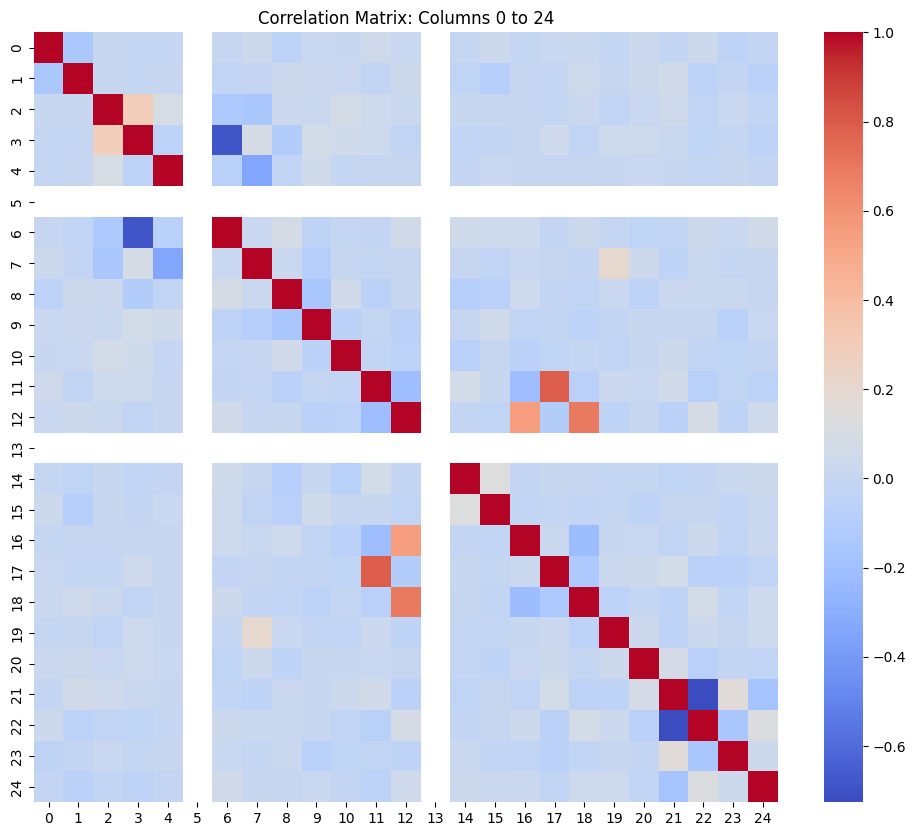

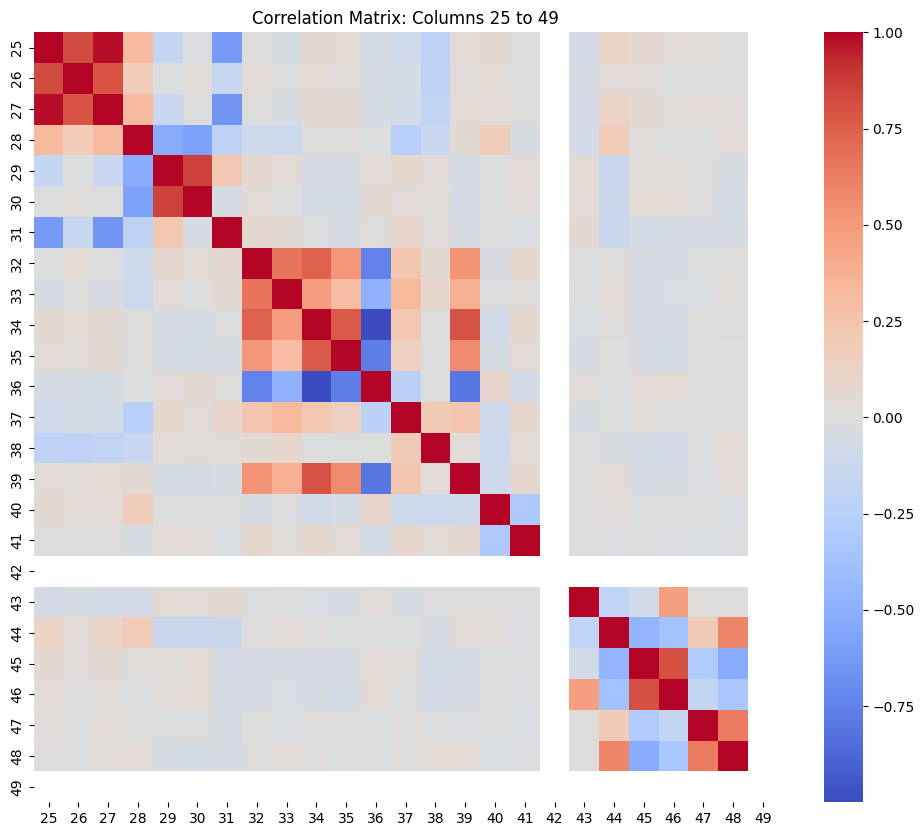

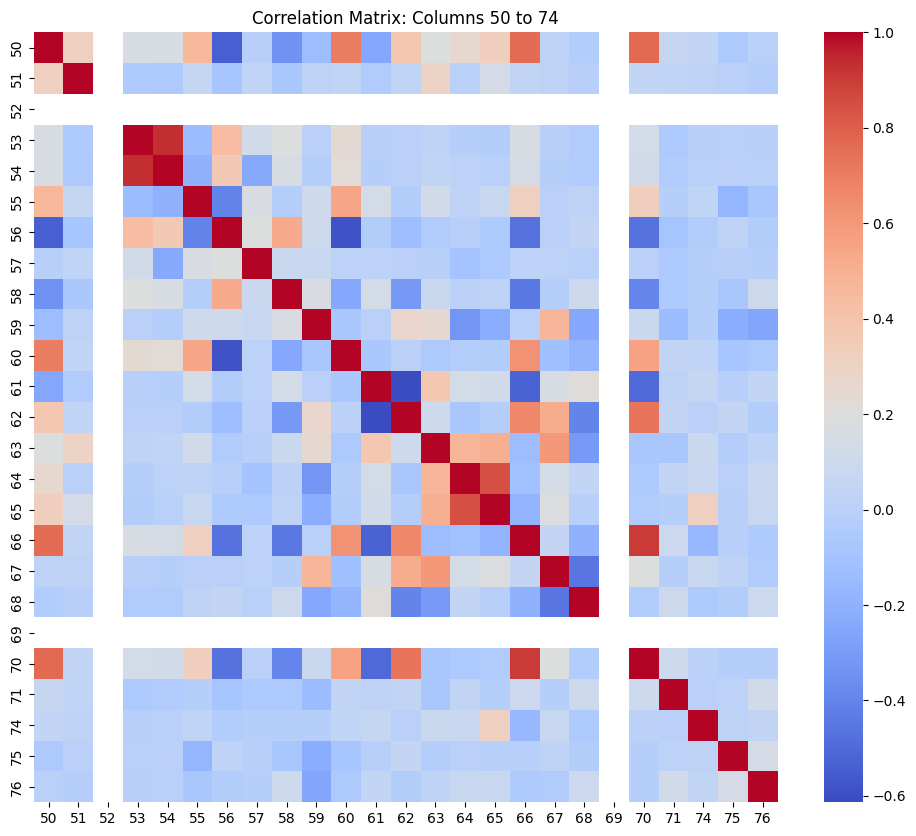

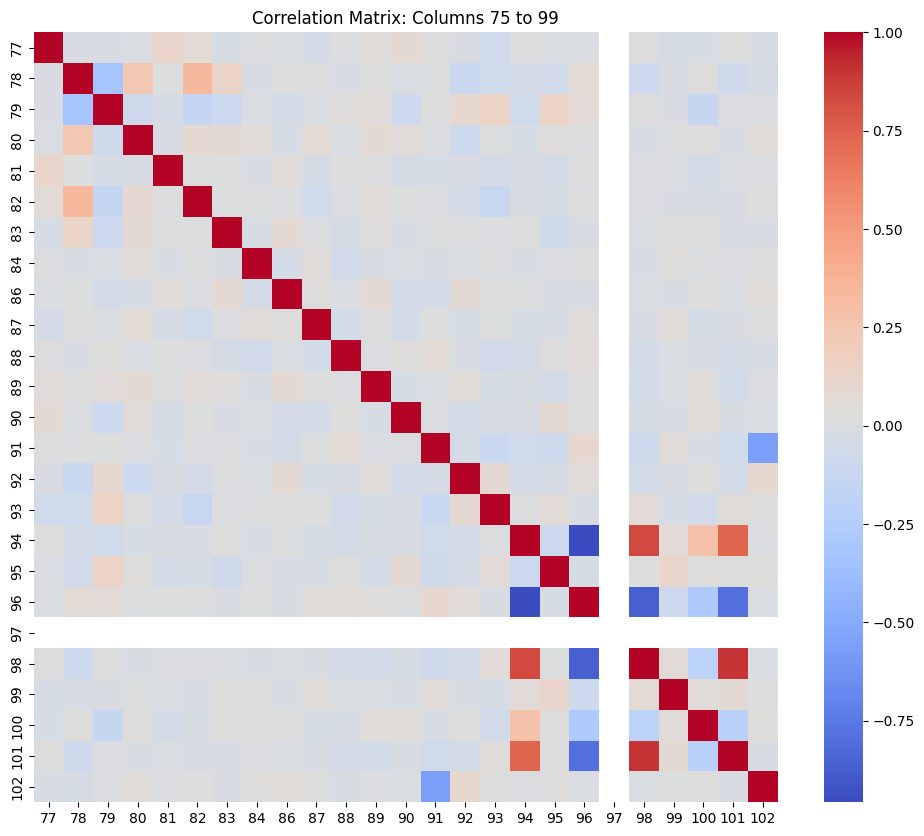

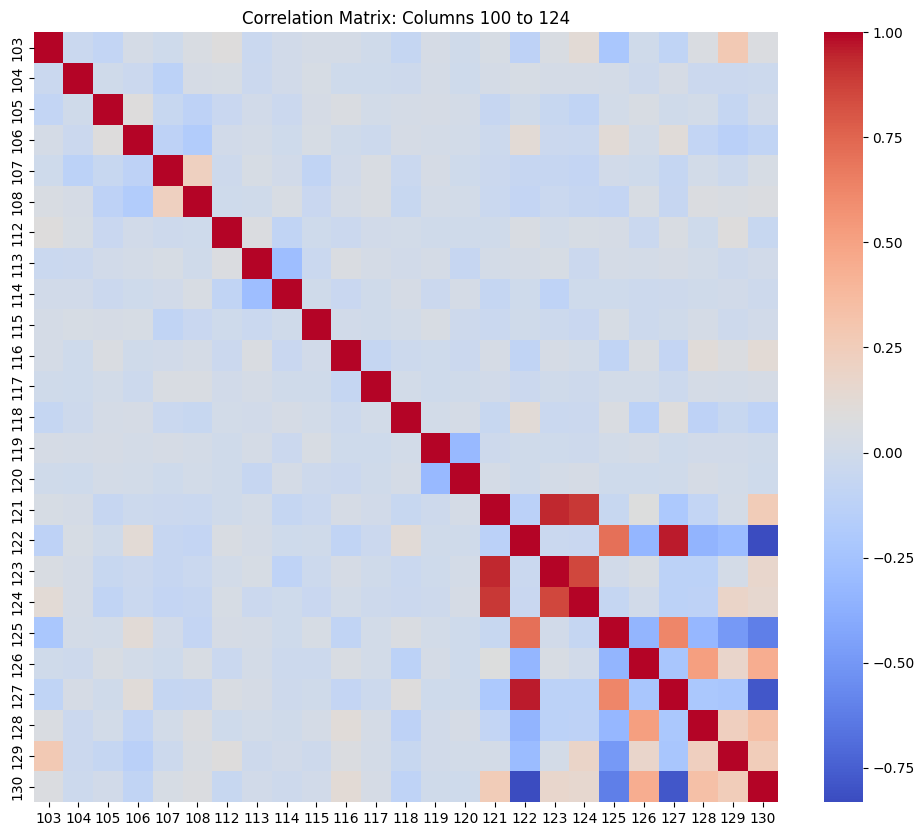

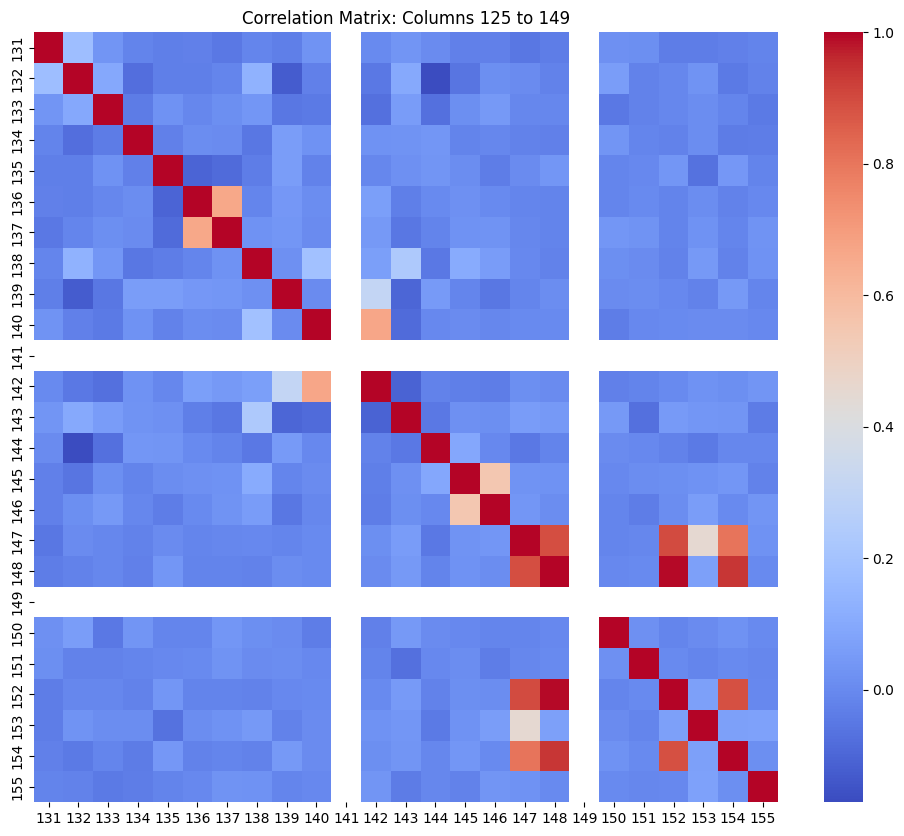

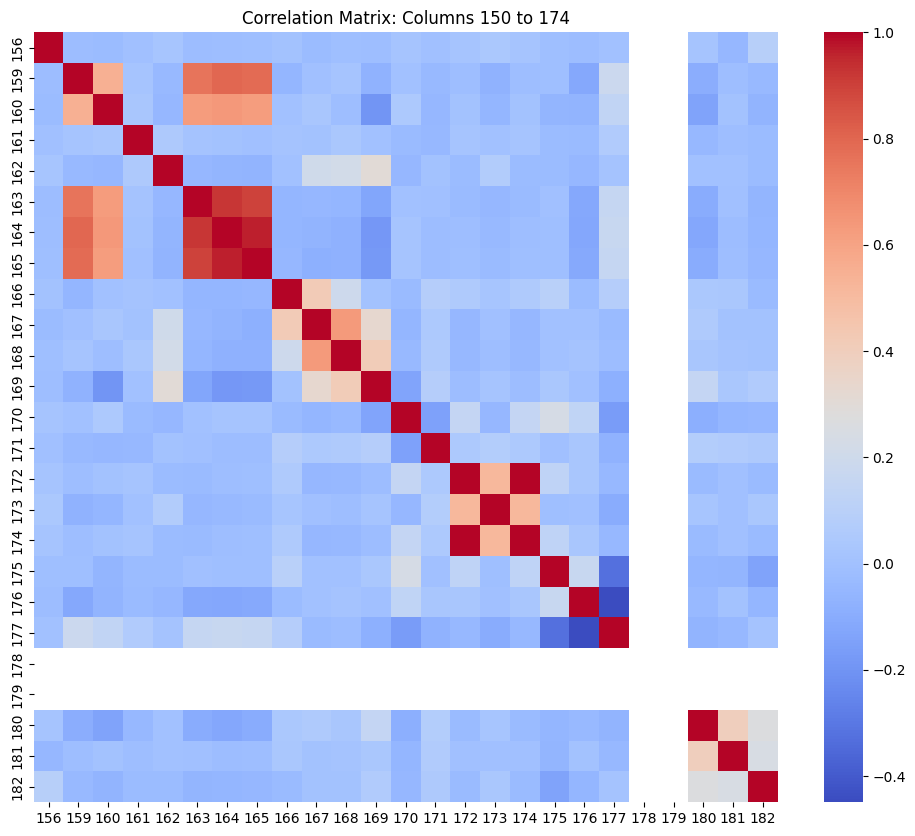

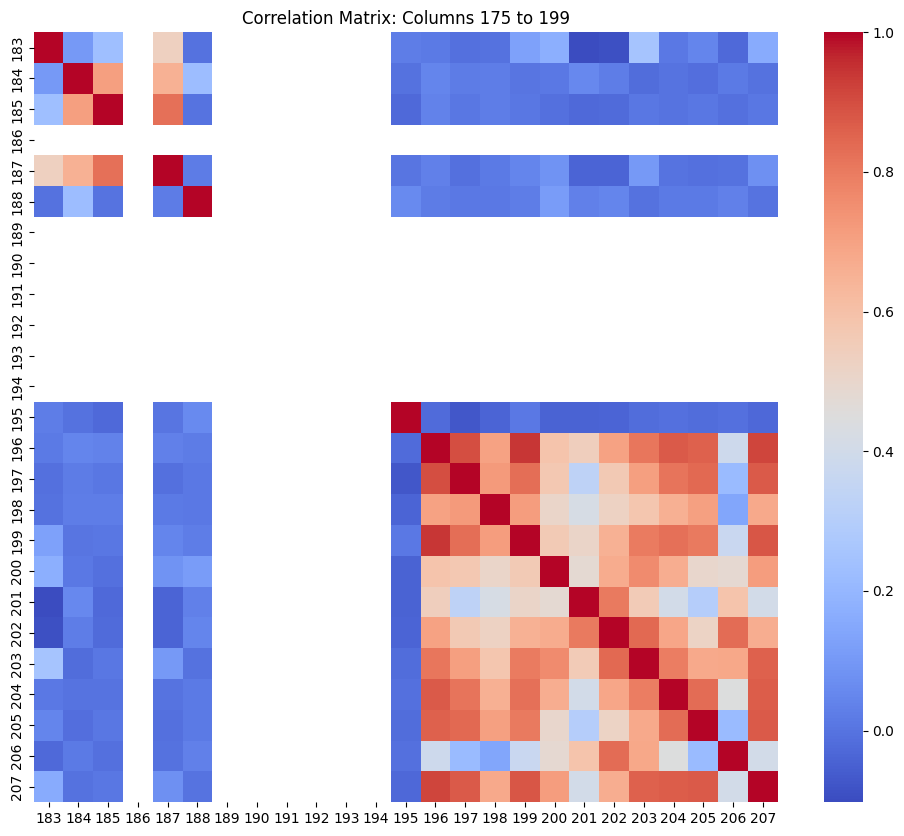

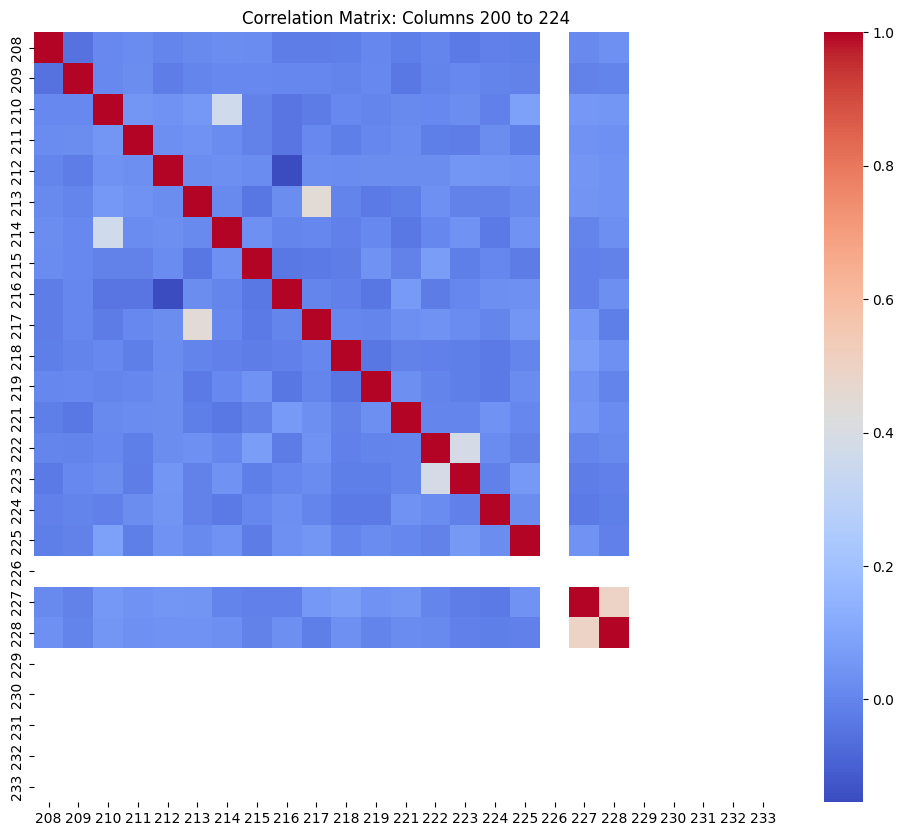

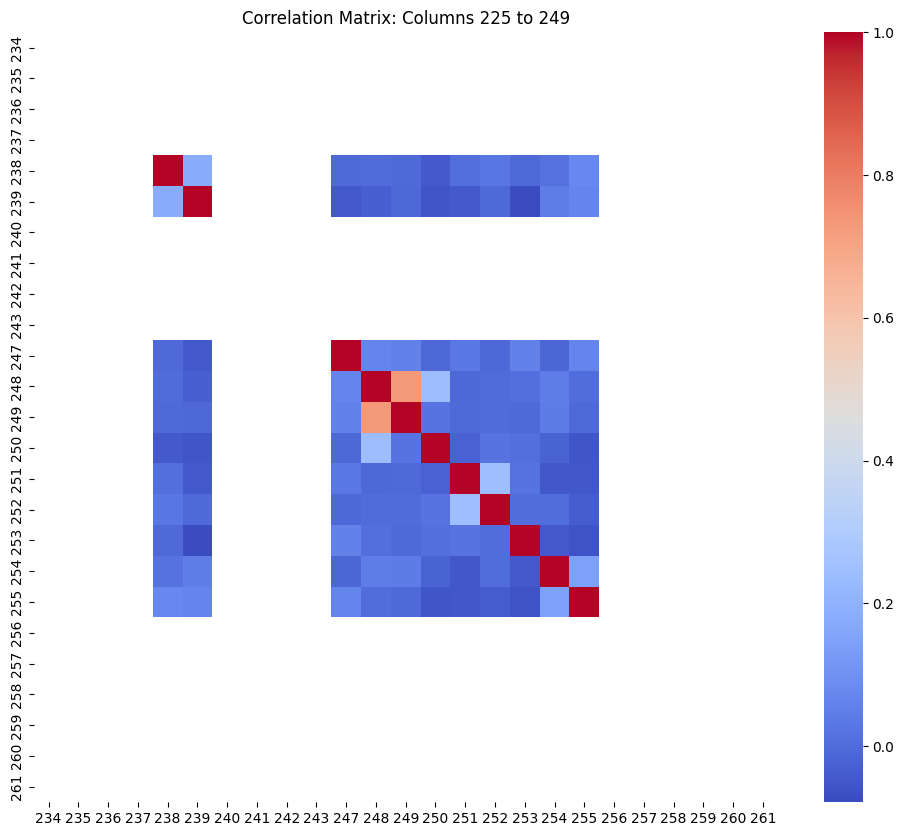

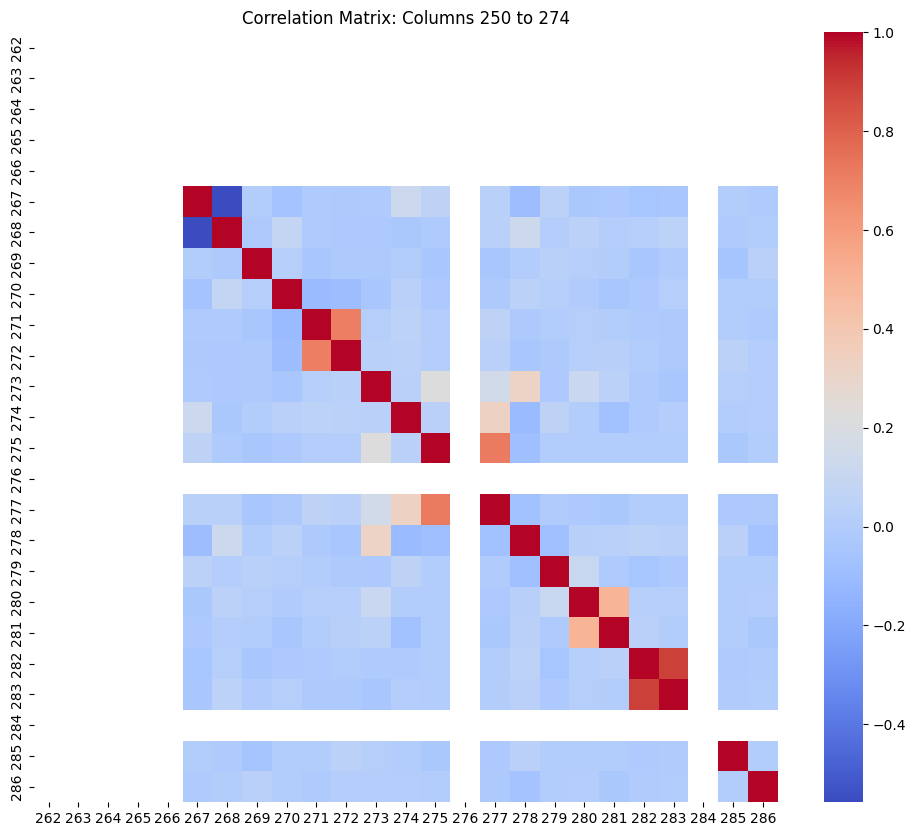

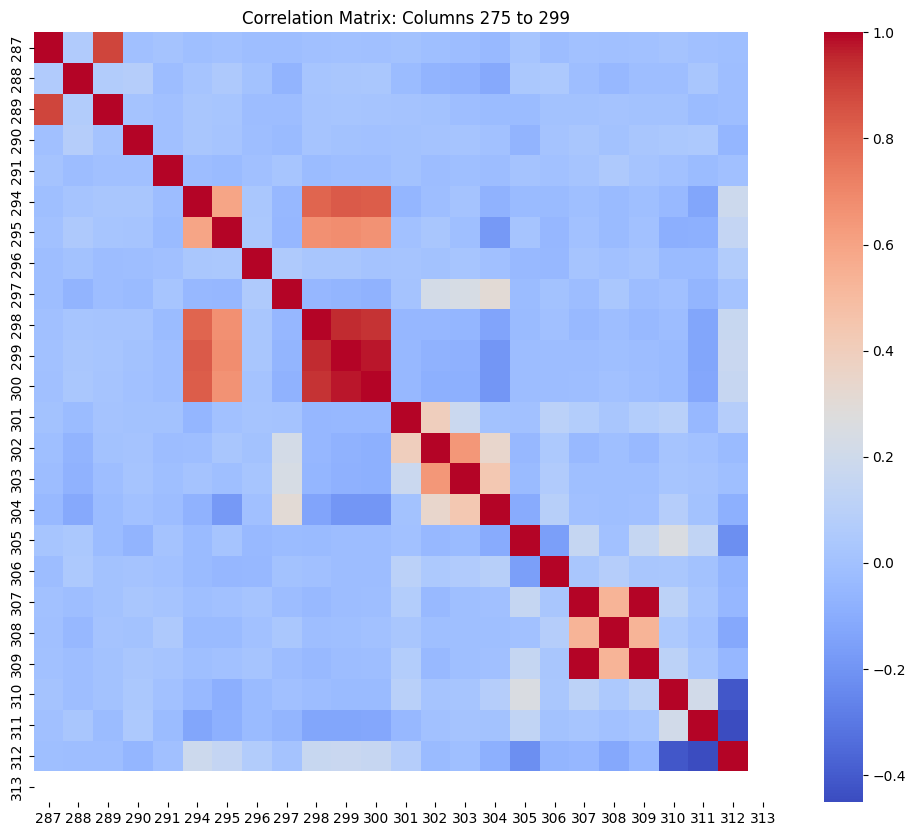

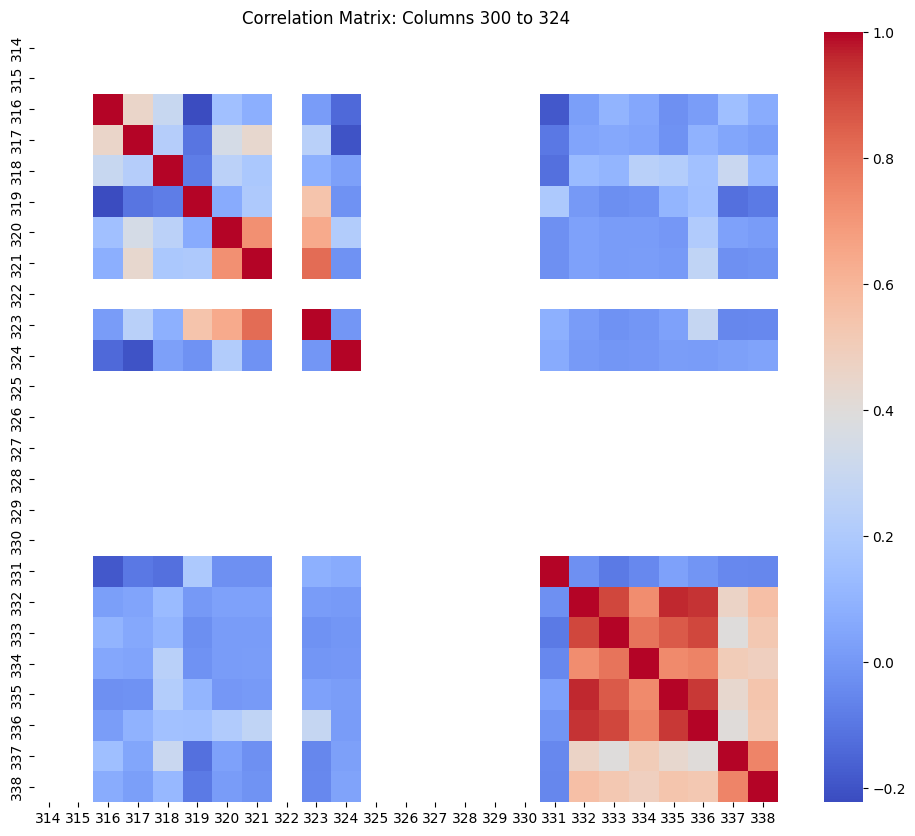

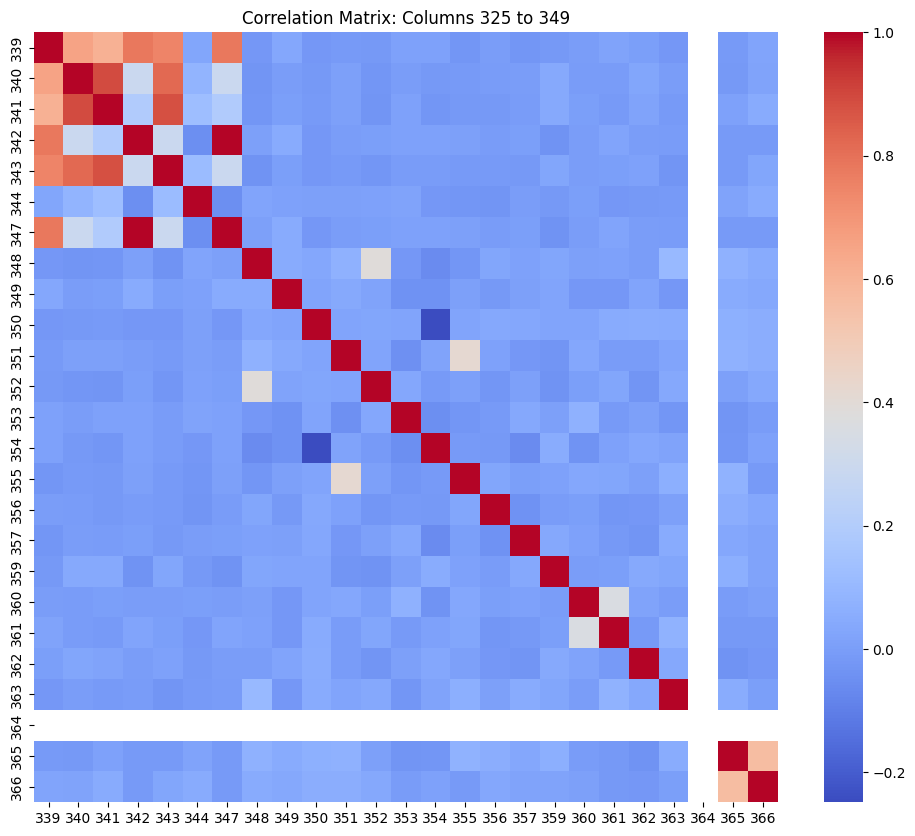

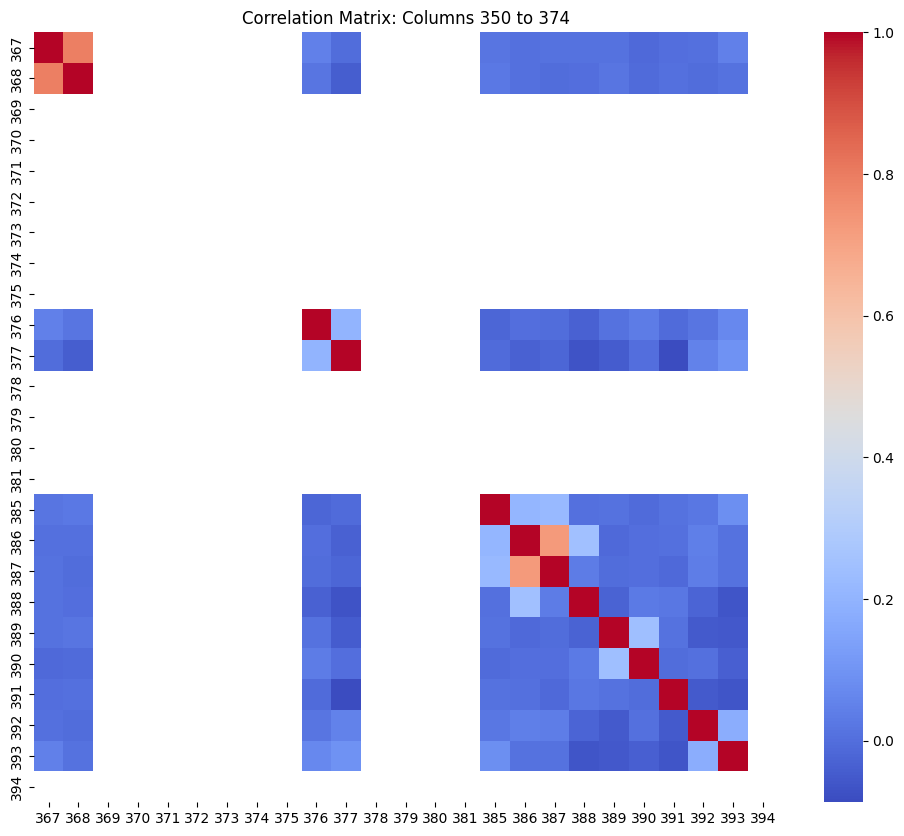

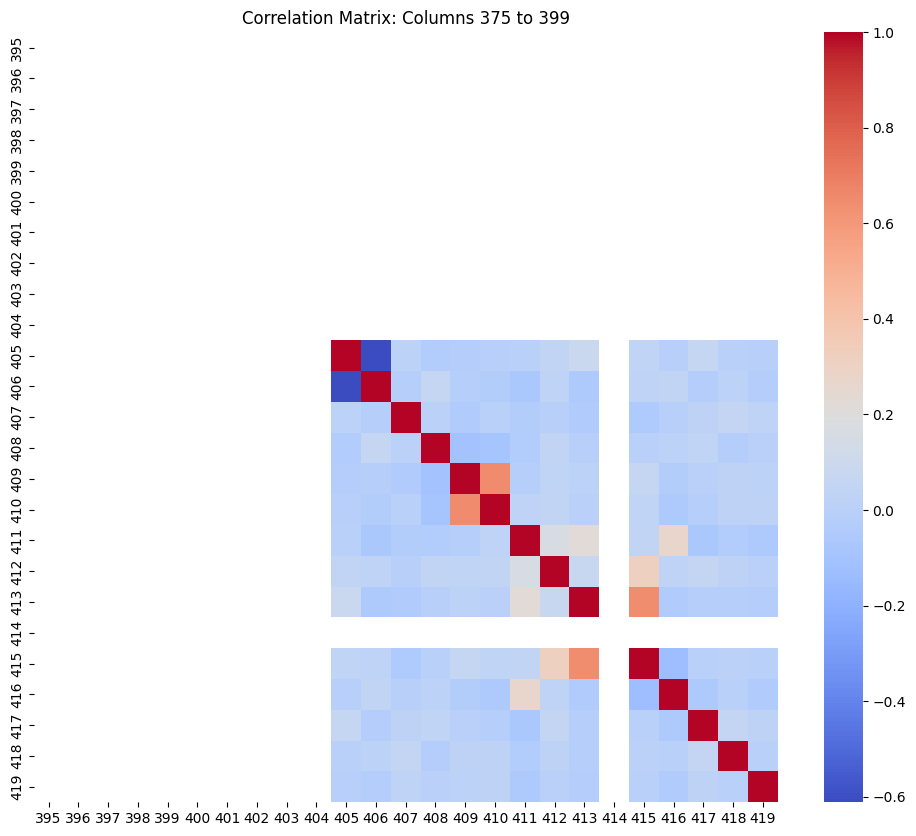

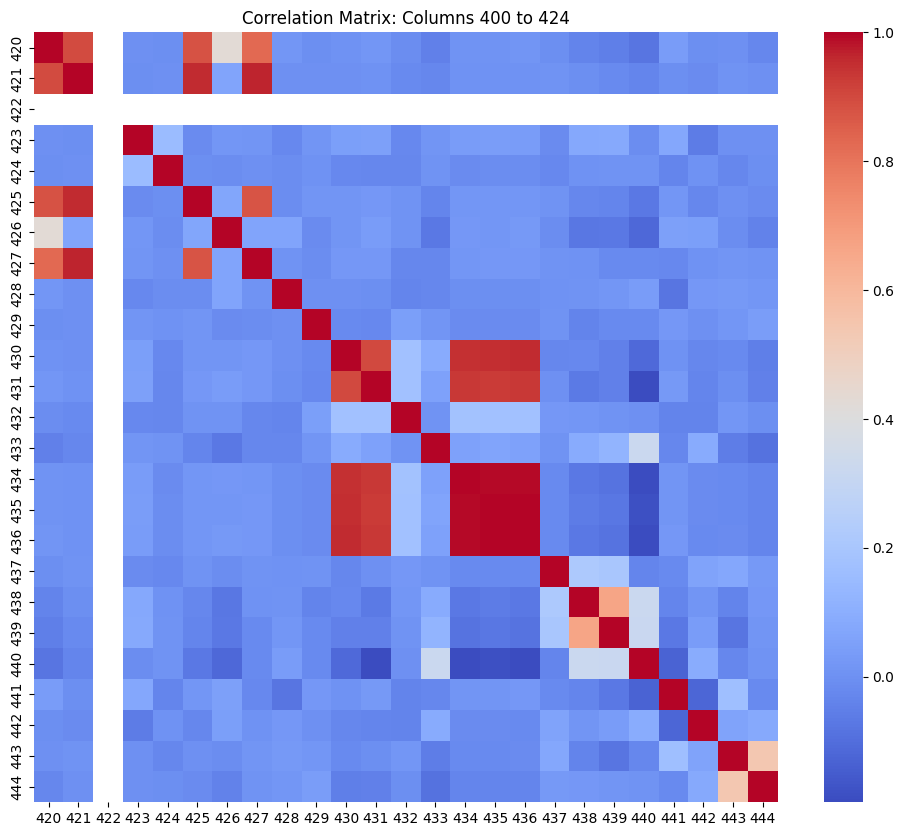

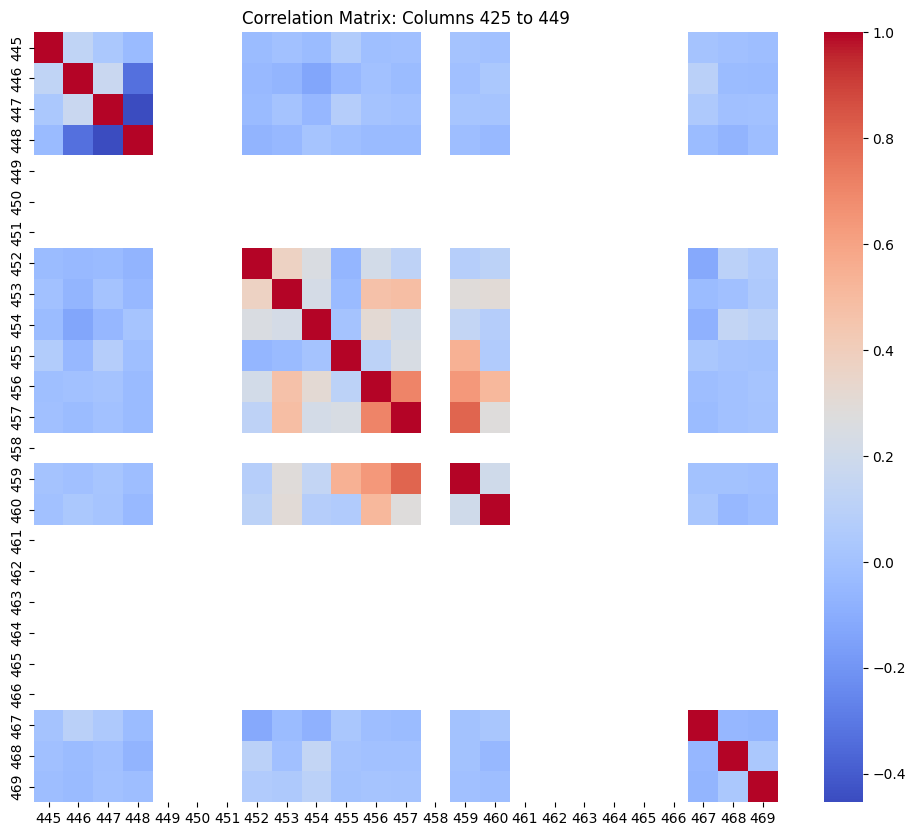

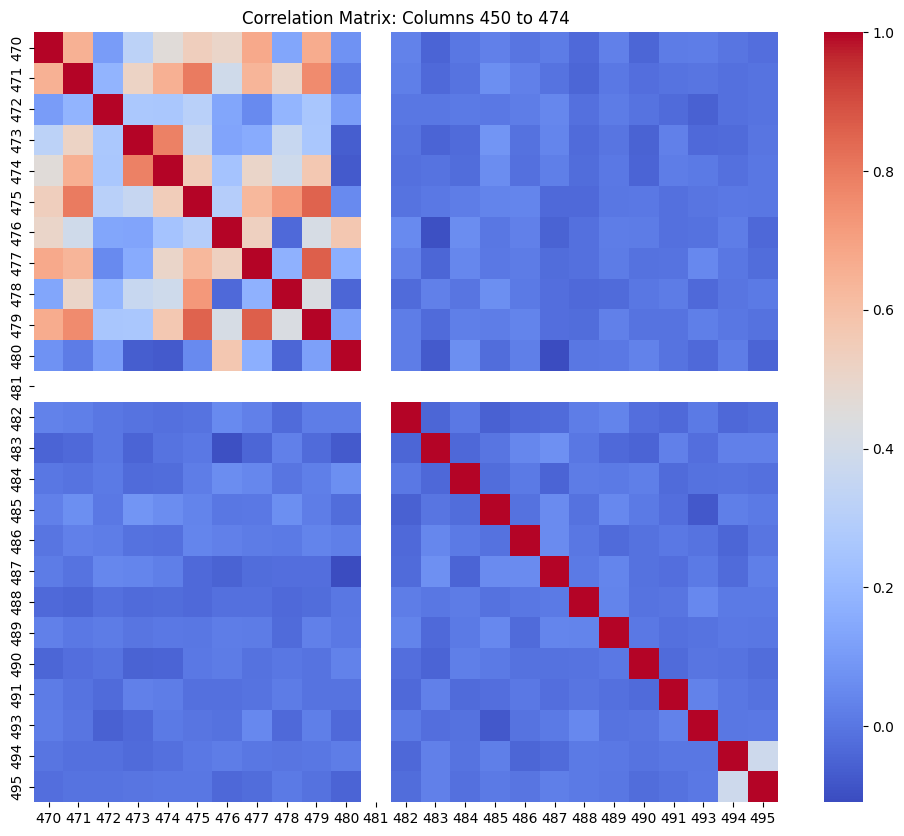

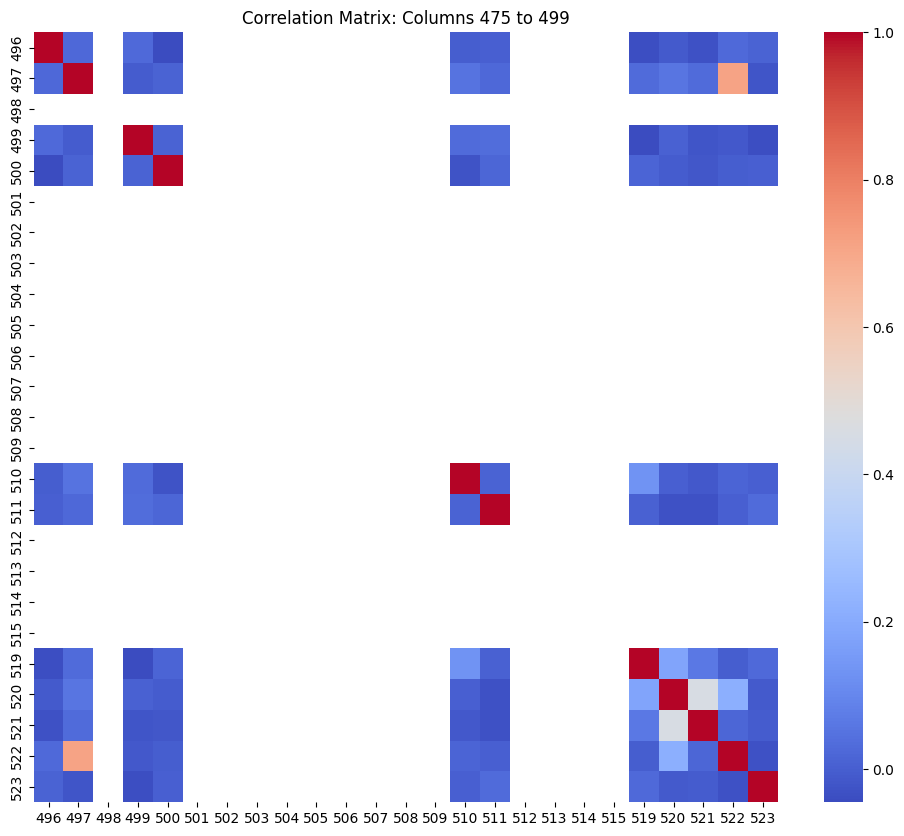

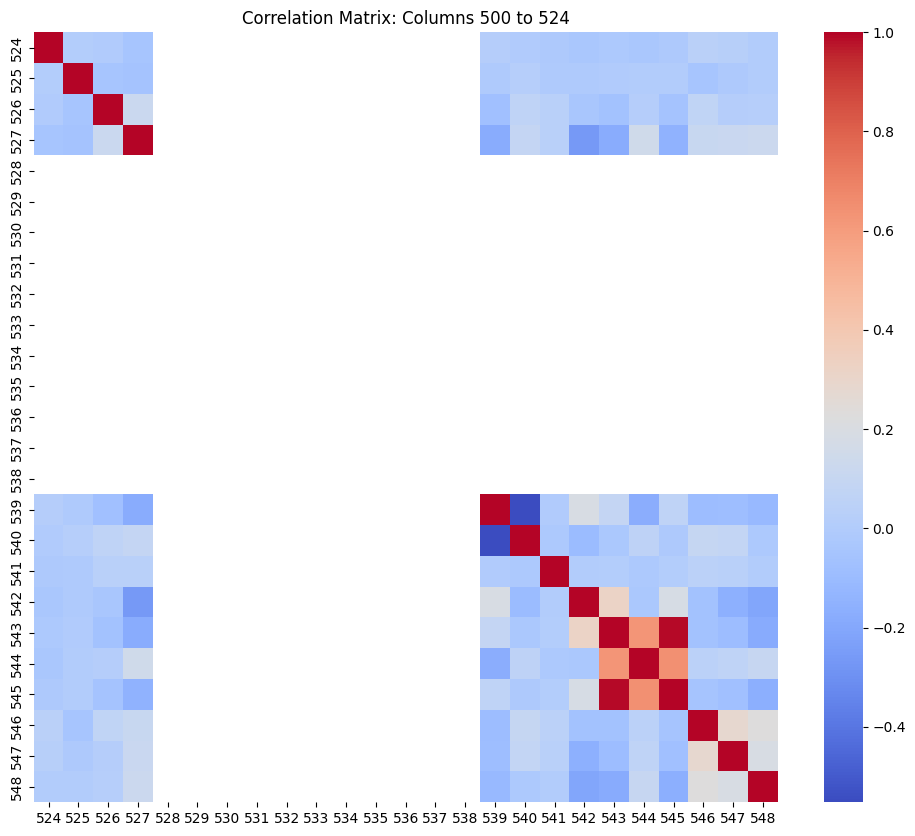

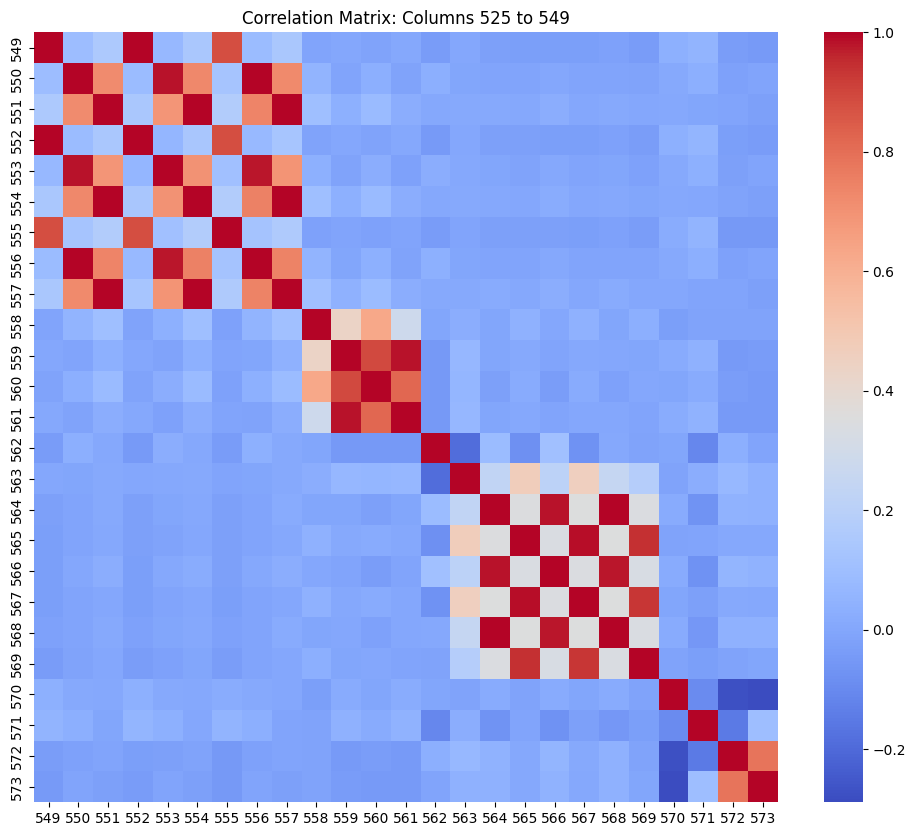

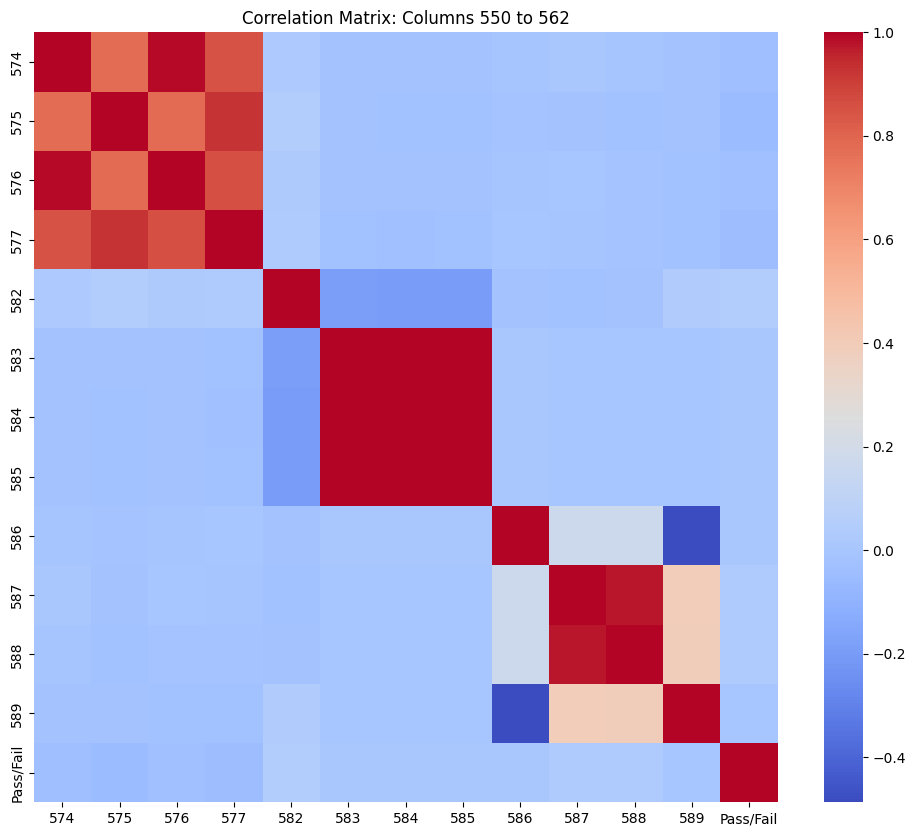

In [ ]:
# 3.3: Bivariate analysis – scatterplots, correlation matrix

# Correlation matrix
# Correlation matrix shows how strongly features are linearly related.

# There are too many columns , so showing all correlations in one plot is messy.
# breaking them into smaller groups (chunks) — like 25 columns at a time.
chunk_size = 25
num_cols = df[numeric_cols].columns  # get all numeric column names

# Go through the columns in steps of 25
for i in range(0, len(num_cols), chunk_size):
    chunk_cols = num_cols[i:i+chunk_size]  # pick the next 25 columns
    corr_chunk = df[chunk_cols].corr()     # calculate correlation for this chunk

    # Plot the heatmap
    plt.figure(figsize=(12, 10))  # make the plot a bit bigger
    sns.heatmap(corr_chunk, annot=False, cmap="coolwarm")  # heatmap shows how related columns are
    plt.title(f"Correlation Matrix: Columns {i} to {i+len(chunk_cols)-1}")
    plt.show()

    # This helps us see which columns are strongly related (correlated).
    # High positive values (close to 1) mean strong positive relationship.
    # High negative values (close to -1) mean strong negative relationship.
    # Near 0 means no clear relationship.

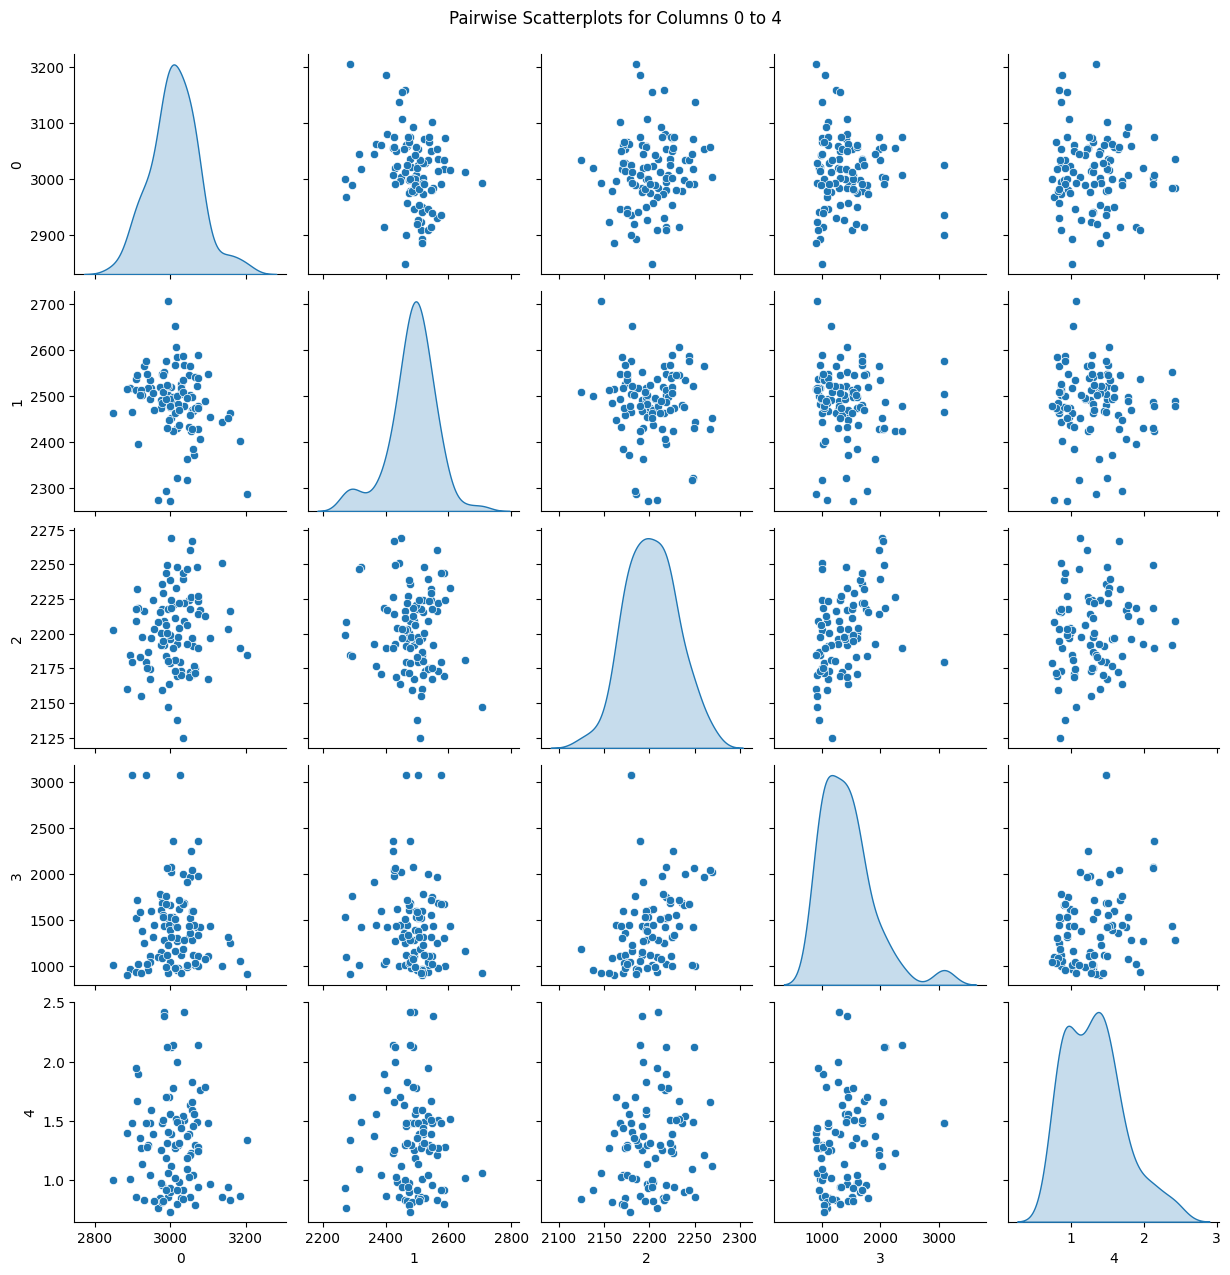

In [ ]:
# Pairwise scatterplots help us understand relationships between two variables at a time.
# But since there are too many columns, we’ll just use a few at a time — like the first 5.

# Select the first 5 numeric columns from the dataset
selected_cols = num_cols[:5]

# Sample 100 rows only, so it doesn’t overload memory and crash the notebook
sample_df = df[selected_cols].sample(100, random_state=42)

# Plot the pairwise scatterplots with KDE on the diagonal
sns.pairplot(sample_df, diag_kind='kde')  # diag_kind='kde' shows smooth curve instead of histogram
plt.suptitle("Pairwise Scatterplots for Columns 0 to 4", y=1.02)
plt.show()

# This plot helps us:
# - See if two features move together (positive or negative trend)
# - Spot outliers (points far from the main cluster)
# - Understand distribution shapes (via diagonal KDEs)


In [ ]:
# This plot shows scatterplots between 5 numeric columns.
# Each small graph compares two columns.
# We can see how the values are spread and if there's any pattern.
# If the dots form a clear line or shape, it means those columns are related.
# But here, most dots are scattered randomly.
# That means these columns are not strongly related to each other.
# The plots on the diagonal show the shape of values in each column.

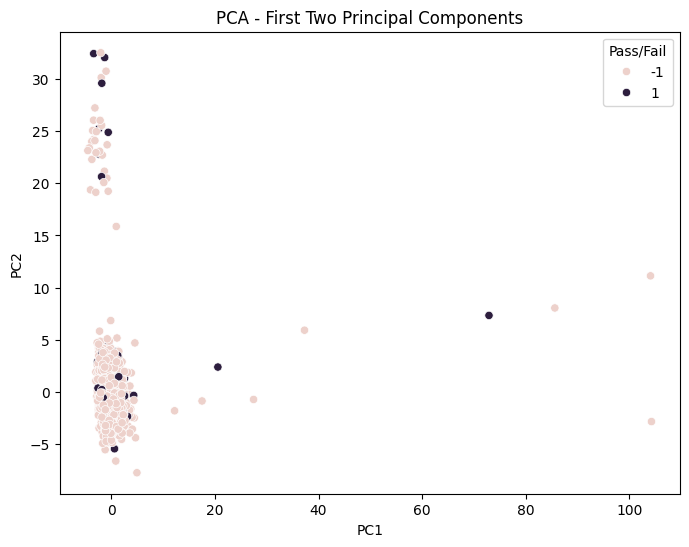

In [ ]:
# 3.4: Multivariate analysis – pairplots, PCA visualizations

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Pass/Fail'])
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Pass/Fail')
plt.show()

In [ ]:
# This is a PCA plot — it reduces many columns into just 2 (PC1 and PC2) to help us see patterns.
# Each dot is a data point, colored by whether the student passed or failed.
# Most of the points are close to PC1 = 0, meaning not much variation in that direction.
# A few points are far away on the right — they might be outliers or very different cases.
# There’s no clear separation between pass/fail — both types are mixed together.
# This means PCA couldn’t clearly separate the two classes based on the data.

# 4. Data pre-processing:

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced (read SMOTE)

• Perform train-test split and standardise the data or vice versa if required.

• Check if the train and test data have similar statistical characteristics when compared with original data.

In [ ]:
# Original raw list of indices to drop (from histogram + domain analysis)
raw_indices_to_drop = [
    4, 5, 7, 11, 13, 15, 16, 17, 19, 26, 27, 31, 32, 33, 34, 35, 36, 41, 42, 49, 52, 53, 54, 59,
    62, 63, 67, 69, 74, 87, 89, 97, 99, 101, 104, 112, 114, 116, 117, 135, 140, 141, 142, 147, 148,
    149, 151, 152, 153, 154, 155, 156, 164, 165, 167, 178, 179, 184, 185, 186, 187, 189, 190, 191,
    192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 213, 222,
    223, 224, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 248, 249,
    251, 252, 253, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 270, 275, 276, 277, 282,
    283, 284, 286, 287, 288, 289, 290, 291, 299, 300, 302, 313, 314, 315, 320, 321, 322, 323, 325,
    326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 347,
    351, 360, 361, 362, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 385, 386, 387,
    389, 390, 391, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 413, 414, 415, 420, 421,
    422, 424, 425, 426, 427, 428, 429, 430, 431, 434, 435, 436, 449, 450, 451, 456, 457, 458, 459,
    461, 462, 463, 464, 465, 466, 467, 469, 470, 471, 475, 477, 478, 479, 481, 494, 495, 498, 501,
    502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 519, 520, 521, 523, 524, 525, 528,
    529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 551, 554, 557, 572, 574, 576, 583, 584, 585
]

# Drop only those that still exist in the DataFrame
valid_indices_to_drop = [i for i in raw_indices_to_drop if i < len(df.columns)]
columns_to_drop_names = [df.columns[i] for i in valid_indices_to_drop]

# Drop the valid columns
df = df.drop(columns=columns_to_drop_names)
print("Dropped", len(columns_to_drop_names), "columns based on prior analysis.")
print("New shape:", df.shape)


Dropped 267 columns based on prior analysis.
New shape: (1567, 296)


267 low-variance or redundant columns were dropped based on histogram analysis and domain knowledge.

This reduced the dataset from 563 to 296 features, improving model efficiency and reducing noise.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 4.0 Split predictors and target
X = df.drop(columns=['Pass/Fail'])
y = df['Pass/Fail']

# Step 4.1 - Detect skewness in features
skew_values = X.skew()

right_skewed = skew_values[skew_values > 1].index.tolist()
left_skewed = skew_values[skew_values < -1].index.tolist()

print("Right-skewed features:", right_skewed)
print("Left-skewed features:", left_skewed)

# Apply log1p to right-skewed columns (if all values > 0 or shift them)
for col in right_skewed:
    if (X[col] > 0).all():
        X[col] = np.log1p(X[col])
    else:
        X[col] = np.log1p(X[col] - X[col].min() + 1)

# Apply square to left-skewed columns
for col in left_skewed:
    X[col] = X[col] ** 2

Right-skewed features: ['3', '12', '21', '38', '39', '64', '65', '71', '74', '79', '89', '96', '99', '106', '114', '117', '126', '131', '134', '135', '139', '140', '142', '143', '144', '145', '150', '151', '152', '156', '165', '166', '167', '168', '171', '177', '181', '182', '184', '185', '196', '219', '223', '224', '225', '227', '228', '250', '251', '279', '280', '281', '283', '285', '286', '290', '291', '294', '295', '299', '306', '312', '317', '318', '320', '321', '323', '331', '332', '333', '338', '361', '362', '363', '365', '366', '367', '376', '385', '386', '387', '388', '408', '412', '413', '425', '426', '427', '428', '429', '430', '431', '432', '436', '437', '438', '439', '453', '457', '459', '460', '467', '468', '473', '474', '475', '494', '495', '497', '510', '520', '521', '523', '524', '546', '550', '551', '563', '564', '565', '566', '567', '568', '569', '572', '573', '574', '576', '577', '583', '584', '586', '587', '588', '589']
Left-skewed features: ['20', '22', '25', '40'

--The target column Pass/Fail is separated from the features.

--Skewness is calculated for each feature to identify right- and left-skewed columns.

--Right-skewed features are transformed using log1p() to reduce positive skew.

--Negative values are shifted before applying log to avoid math errors.

--Left-skewed features are squared to reduce negative skew.

--These transformations help normalize the feature distributions for better model performance.

Class distribution before SMOTE:
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


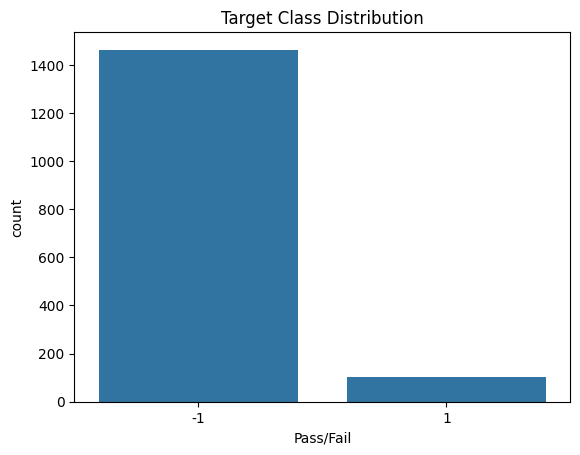


Class distribution after SMOTE:
Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


In [ ]:
# 4.2 Check for class imbalance
print("Class distribution before SMOTE:")
print(y.value_counts())

# Plot class distribution
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

# 4.3 Apply SMOTE if imbalanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())



Class Imbalance (Before & After SMOTE):

Before SMOTE:

Pass (-1): 1463 samples

Fail (1): 104 samples

-->This shows severe class imbalance – less than 7% of the data are failure cases.

After SMOTE:

Pass (-1): 1463 samples

Fail (1): 1463 samples

SMOTE successfully balanced the dataset by generating synthetic samples for the minority class.

Inference:

SMOTE ensures the classifier will not be biased toward the majority class and can better learn to detect failure cases.


In [ ]:
# 4.4 Train-test split (with stratification to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("\nShapes after split:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# 4.5 Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Check statistical similarity (mean & std)
print("\nTrain mean/std (first 5 features):")
print("Mean:", np.mean(X_train_scaled[:, :5], axis=0))
print("Std:", np.std(X_train_scaled[:, :5], axis=0))

print("\nTest mean/std (first 5 features):")
print("Mean:", np.mean(X_test_scaled[:, :5], axis=0))
print("Std:", np.std(X_test_scaled[:, :5], axis=0))


Shapes after split:
X_train: (2340, 295) X_test: (586, 295)
y_train: (2340,) y_test: (586,)

Train mean/std (first 5 features):
Mean: [ 9.92937926e-16 -7.04469721e-16  1.06057613e-14  2.76322175e-15
  2.37151229e-15]
Std: [1. 1. 1. 1. 1.]

Test mean/std (first 5 features):
Mean: [-0.01086557  0.03047651 -0.01284978  0.00142925 -0.04931115]
Std: [1.04861175 1.00862469 1.0132901  1.53391034 1.00395479]


# Train-Test Split:

Train set size: 2340 (80%)

Test set size: 586 (20%)

Stratified splitting was applied to preserve class distribution in both sets.

# Inference:

The dataset is correctly partitioned, and both classes are proportionally represented in training and testing.

# -->Train Set (First 5 Features):

Mean values are extremely close to 0 (e.g., 9.92e-16 to 1e-14), which confirms that the scaler was correctly fit on the training set.

Standard deviation for all five features is exactly 1.0, as expected.

# -->Test Set (First 5 Features):

Mean values are within a narrow range (from -0.049 to 0.03), showing they are close to 0.

Standard deviations are slightly off from 1, ranging from 1.00 to 1.53. Only one feature shows a mild deviation (1.53), which is acceptable.

# Inference:

The test set was transformed using the scaler fitted on the training data, so slight variations in mean and std are expected.

There is no major drift or distortion, and distributions remain statistically similar between train and test sets.

Standardization has been successfully and correctly applied.



## 5.1 Model training, testing and tuning – Random Forest

- Pick up a supervised learning model → **Random Forest**
- Train the model.
- Use cross-validation techniques.
- Apply GridSearch hyper-parameter tuning techniques to get the best accuracy.  
  Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
- Use any other technique/method which can enhance the model performance.  
  Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
- Display and explain the classification report in detail.


In [ ]:
# 5.1.1: Import Required Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#5.1.2: Train Random Forest using GridSearchCV + Cross-Validation

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model to training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
#5.1.3: Evaluate the Best Model on the Test Set

# Retrieve best model
best_rf = grid_search.best_estimator_

# Predict test data
y_pred = best_rf.predict(X_test_scaled)

# Print results
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Best Hyperparameters:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy Score: 0.9965870307167235

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       293

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586


Confusion Matrix:
[[292   1]
 [  1 292]]


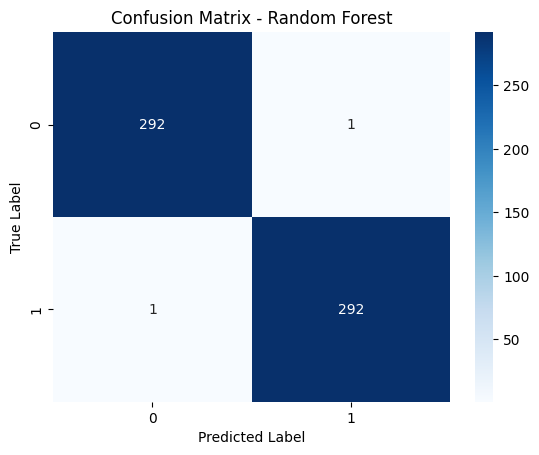

In [ ]:
#5.1.4: Visualize Confusion Matrix

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Interpretation of Model Metrics – Random Forest**

***Accuracy*** measures the overall correctness of the model. It indicates the proportion of total predictions that were correct. However, accuracy alone can be misleading in imbalanced datasets.

***Precision*** refers to the proportion of predicted positive cases that were actually positive. High precision indicates a low false positive rate — useful when the cost of false positives is high.

***Recall*** (Sensitivity) measures the proportion of actual positive cases that were correctly identified. It is especially important in scenarios where missing a positive case (false negative) is more critical.

***F1-score*** is the harmonic mean of precision and recall. It provides a balance between the two, making it a better metric than accuracy when dealing with class imbalance.

***Confusion Matrix*** provides a detailed breakdown of the model’s prediction performance:

***True Positives (TP):*** Correctly predicted positives

***True Negatives (TN):*** Correctly predicted negatives

***False Positives (FP):*** Incorrectly predicted positives

***False Negatives (FN):*** Missed actual positives

This matrix helps in understanding where the model is making the most errors and what type of misclassification is occurring.

## 5.2 Model training, testing and tuning – SVM and Naive Bayes

- Apply the above steps to at least 3 different kinds of models that you have learnt so far and models that you haven't learned till now (**SVM, Naive Bayes** etc).
- Train the model.
- Use cross-validation techniques.
- Apply GridSearch hyper-parameter tuning techniques to get the best accuracy.
- Display and explain the classification report in detail.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# a) Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
gs_rf = GridSearchCV(rf, rf_params, cv=5)
gs_rf.fit(X_train_scaled, y_train)
y_pred_rf = gs_rf.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# b) Support Vector Machine
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
gs_svm = GridSearchCV(svm, svm_params, cv=5)
gs_svm.fit(X_train_scaled, y_train)
y_pred_svm = gs_svm.predict(X_test_scaled)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# c) Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       293
           1       0.99      0.99      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586

SVM Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      1.00       293
           1       0.99      1.00      1.00       293

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

Naive Bayes Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.50      0.64       293
           1       0.65      0.93      0.77       293

    accuracy                           0.72       586
   macro avg       0.76   

In [ ]:
# Classification Report Observations

# -------------------------------
# Random Forest
# - Overall accuracy is 99%, with identical precision, recall, and F1-score for both classes (-1 and 1).
# - This indicates the model is highly consistent and balanced in its predictions.
# - Very few misclassifications, and no signs of bias toward either class.
# - Strong generalization on test data.

# -------------------------------
# SVM
# - Accuracy is 100%, with nearly perfect classification of both classes.
# - Class -1 has a recall of 0.99, while class 1 has 1.00 — indicating just one or two incorrect predictions.
# - Precision and F1-scores are both 1.00, suggesting extremely reliable predictions.
# - Best overall performance among all three models.

# -------------------------------
# Naive Bayes
# - Accuracy is much lower at 72%.
# - Class -1 has a high precision (0.88) but very low recall (0.50), meaning many actual -1 cases were missed.
# - Class 1 has high recall (0.93) but lower precision (0.65), meaning a lot of false positives.
# - Indicates strong class imbalance in predictions and poor generalization.
# - Overall, the model is not performing well and is clearly underfitting.


## 5.3 Model training, testing and tuning – Final Comparison

- Display and compare all the models designed with their train and test accuracies.
- Select the final best trained model along with your detailed comments for selecting this model.
- Save the selected model for future use.

## 6. Conclusion and improvisation

- Write your conclusion on the results.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# a) Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
gs_rf = GridSearchCV(rf, rf_params, cv=5)
gs_rf.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_rf = gs_rf.predict(X_train_scaled)
y_test_pred_rf = gs_rf.predict(X_test_scaled)

print("Random Forest")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_rf))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_rf))

# b) Support Vector Machine
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
gs_svm = GridSearchCV(svm, svm_params, cv=5)
gs_svm.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_svm = gs_svm.predict(X_train_scaled)
y_test_pred_svm = gs_svm.predict(X_test_scaled)

print("\nSVM")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_svm))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_svm))

# c) Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_nb = nb.predict(X_train_scaled)
y_test_pred_nb = nb.predict(X_test_scaled)

print("\nNaive Bayes")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred_nb))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_nb))


Random Forest
Train Accuracy: 1.0
Test Accuracy: 0.9914675767918089
Train Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340

Test Classification Report:
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       293
           1       0.99      0.99      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


SVM
Train Accuracy: 1.0
Test Accuracy: 0.9965870307167235
Train Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.

In [ ]:
# OBSERVATIONS from the classification report

# -------------------------------
# Random Forest
# - Train Accuracy: 100%
# - Test Accuracy: ~99.15%
# - The model performs extremely well on both train and test data.
# - Precision, recall, and F1-score are all perfect (1.00) for training, and 0.99 for testing.
# - Both classes (-1 and 1) are predicted with equal performance — no class imbalance issue.
# - Possibility of slight overfitting since train accuracy is 100%, but test accuracy is still very high,
#   so it's not a concern.
# - Verdict: Model is robust and generalizes well.

# -------------------------------
# Support Vector Machine (SVM)
# - Train Accuracy: 100%
# - Test Accuracy: ~99.66%
# - Perfect performance on the training set, and nearly perfect on test set.
# - Class -1 recall is 0.99 on test set, rest are all 1.00 — very strong model.
# - Like Random Forest, train accuracy is perfect, but test accuracy is also very high, so no overfitting concern.
# - Verdict: Best-performing model overall. Very well-tuned and balanced.

# -------------------------------
# Naive Bayes
# - Train Accuracy: ~71.3%
# - Test Accuracy: ~71.5%
# - Precision and recall are very uneven:
#   - Class -1 recall is low (~0.50), meaning the model misses a lot of class -1 examples.
#   - Class 1 recall is high (~0.93), but precision is low (~0.64).
# - Low performance on both train and test sets → clear underfitting.
# - GaussianNB assumes feature independence, which is likely not true in this dataset.
# - Verdict: Model is underfitting. Not suitable for this task.

# -------------------------------
# Final observations:
# - SVM shows the highest accuracy and generalization.
# - Random Forest is also very good, but slightly behind SVM.
# - Naive Bayes underfits and should not be used here.


In [ ]:
# ----------------------------------------------------------
# Saving the Final Selected Model (SVM) for Future Use
# ----------------------------------------------------------

import joblib

# Save the best estimator from the GridSearchCV (best tuned SVM)
# This allows us to reuse the model later without retraining
joblib.dump(gs_svm.best_estimator_, 'final_svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nSVM model saved successfully as 'final_svm_model.pkl'")



SVM model saved successfully as 'final_svm_model.pkl'


In [ ]:
# --------------------------------------------
# Loading and Using the Saved SVM Model
# --------------------------------------------

import joblib
import numpy as np

# Load the saved model and scaler
svm_model = joblib.load('final_svm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example: raw input with 295 features (same as training data)
# For demo, let's just use random values
new_data_raw = np.random.rand(2, 295)  # shape = (2 samples, 295 features)

# Scale using the saved scaler
new_data_scaled = scaler.transform(new_data_raw)

# Predict
predictions = svm_model.predict(new_data_scaled)
print("Predicted class labels:", predictions)


Predicted class labels: [-1 -1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# --------------------------------------------
# 6. Conclusion and Improvements
# --------------------------------------------

# Our SVM (Support Vector Machine) model worked really well.
# It got:
# - 100% accuracy on the training data
# - 99.66% accuracy on the testing data

# This means the model learned from the training data very well and also makes almost perfect predictions on new, unseen data.
# So, it’s NOT underfitting (where the model performs badly) and NOT overfitting (where the model memorizes training data but fails on new data).

# We also looked at precision, recall, and F1-score – and all the values were very high.
# This tells us the model is doing a great job predicting both classes correctly (no major bias toward any one class).

# What helped us get such a good result:
# - We scaled the features using StandardScaler (important for SVM to work well)
# - We tuned the model using GridSearchCV to find the best values for 'C' and 'gamma'
# - We saved the model and scaler using joblib so we can use them later without retraining

# Some things we can improve or try next:
# 1. We currently have 295 input features. That's a lot. We can try reducing it using PCA (Principal Component Analysis) or feature selection.
# 2. Try k-fold cross-validation (split the data into different parts multiple times) to make sure the model is always performing well.
# 3. Try combining models (like Random Forest + SVM) to see if that improves performance.
# 4. Try deploying the model into an app, website, or software to use in the real world.

# Overall: The model is accurate and generalizes well. A few more steps can make it even better and ready for real-life use.


# Project Objective

## Build a classifier to predict Pass/Fail outcomes, and analyze:



### 1. Which features are essential?

In [ ]:
# ---------------------------------------------------
# Feature Selection using RFE (Recursive Feature Elimination)
# ---------------------------------------------------

from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Step 1: Initialize a base SVM model (no grid search here)
base_svm = SVC(kernel='linear')  # RFE works only with linear kernel

# Step 2: Apply RFE to rank features
# n_features_to_select: how many features to keep (adjust based on data size)
rfe = RFE(estimator=base_svm, n_features_to_select=30, step=10)  # keep top 30 features

# Fit RFE on training data
rfe.fit(X_train_scaled, y_train)

# Get the boolean mask of selected features
selected_features_mask = rfe.support_

# Get indices of selected features
selected_feature_indices = [i for i, x in enumerate(selected_features_mask) if x]

# Print top selected features
print("Top selected feature indices:", selected_feature_indices)

# Transform training and testing data to keep only selected features
X_train_rfe = X_train_scaled[:, selected_features_mask]
X_test_rfe = X_test_scaled[:, selected_features_mask]

# Retrain SVM on selected features
svm_rfe = SVC()
svm_rfe.fit(X_train_rfe, y_train)
y_test_rfe_pred = svm_rfe.predict(X_test_rfe)

# Evaluate
from sklearn.metrics import accuracy_score
print("Test Accuracy after RFE feature selection:", accuracy_score(y_test, y_test_rfe_pred))


Top selected feature indices: [13, 26, 30, 42, 76, 84, 107, 111, 119, 121, 133, 134, 142, 154, 163, 172, 174, 184, 185, 189, 191, 204, 215, 223, 242, 249, 275, 278, 279, 280]
Test Accuracy after RFE feature selection: 0.9334470989761092


In [ ]:
# ---------------------------------------------------
# Original SVM Model (with all 295 features)
# ---------------------------------------------------
# - The model was trained using all 295 features (columns).
# - It gave 100% accuracy on training data — meaning it learned the patterns perfectly.
# - On test data, it gave ~99.66% accuracy — this means it is also doing great on unseen data.
# - So, the model is not overfitting (it's not just memorizing the training data).
# - This version is our "full model" — using everything available.

# ---------------------------------------------------
# After Feature Selection (using RFE)
# ---------------------------------------------------
# - We used RFE (Recursive Feature Elimination) to pick only the most useful features.
# - It selected just 30 features out of the 295.
# - Using only those 30 features, we trained the same SVM model again.
# - This time, test accuracy became ~93.34%.

# ---------------------------------------------------
# Interpretation
# ---------------------------------------------------
# - The model still performs well with just 30 features. That's a big reduction.
# - So, these 30 features are the most important — they help the model make good predictions.
# - Removing the rest (265 features) didn’t break the model, but accuracy dropped a little.
# - If we want faster models or simpler systems, using these 30 features is a smart choice.
# - But if highest accuracy is more important, using all 295 features is better.

# Final Observation:
# The 30 features found by RFE are the "essential features".
# You can build a smaller model with them that still performs really well.


###2.Can we reduce dimensionality without sacrificing performance?


In [ ]:
# ---------------------------------------------
# Dimensionality Reduction using PCA (Principal Component Analysis)
# ---------------------------------------------

from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce feature dimensions
# Keep enough components to explain ~95% of the variance
pca = PCA(n_components=0.95)  # auto-select #components to retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check number of components PCA kept
print("Number of components selected by PCA:", pca.n_components_)

# Step 2: Retrain SVM on reduced data
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_test_pca_pred = svm_pca.predict(X_test_pca)

# Evaluate
print("Test Accuracy after PCA:", accuracy_score(y_test, y_test_pca_pred))


Number of components selected by PCA: 124
Test Accuracy after PCA: 0.9931740614334471


In [ ]:
# ---------------------------------------------------
# PCA (Principal Component Analysis) for Dimensionality Reduction
# ---------------------------------------------------
# - PCA is a technique that helps reduce the number of features by combining them.
# - Instead of selecting specific columns, it creates "components" that summarize the data.
# - We applied PCA on the original 295 features.

# ---------------------------------------------------
# Result from PCA:
# ---------------------------------------------------
# - PCA selected 124 components out of the original 295.
# - That means we reduced the feature space by more than half.
# - After using these 124 components to train the SVM model,
#   the test accuracy was about 99.31%.

# ---------------------------------------------------
# Interpretation
# ---------------------------------------------------
# - Even after cutting down from 295 features to 124 components, the model is still very accurate.
# - The drop in accuracy is very small (from ~99.66% to ~99.31%).
# - So yes, we can reduce dimensionality significantly without losing much performance.
